In [12]:
###IMPORTING THE REQUIRED LIBARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')


#feature engineering
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import SplineTransformer, OneHotEncoder, PowerTransformer, RobustScaler, FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [6]:
###LOADING THE DATASETS 
df = pd.read_csv('train.csv')

In [7]:
df=df[['latitude','longitude','year','week_no','SulphurDioxide_SO2_column_number_density_amf','SulphurDioxide_SO2_slant_column_number_density','Cloud_cloud_top_height','Formaldehyde_cloud_fraction','Ozone_cloud_fraction','emission']]

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


data = df
data.dropna(subset=['emission'], inplace=True)
data.fillna(0,inplace=True)
# Split the data into features and target
X = data.drop(columns=['emission'])
y = data['emission']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Initialize the XGBoost model
model =  LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 16175.089641168646


In [16]:
import pickle

# Save the trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [3]:
df.drop(columns=['ID_LAT_LON_YEAR_WEEK'], inplace =True)
test.drop(columns=['ID_LAT_LON_YEAR_WEEK'], inplace =True)

In [4]:
df

latitude  longitude  year  week_no  \
0        -0.510     29.290  2019        0   
1        -0.510     29.290  2019        1   
2        -0.510     29.290  2019        2   
3        -0.510     29.290  2019        3   
4        -0.510     29.290  2019        4   
...         ...        ...   ...      ...   
79018    -3.299     30.301  2021       48   
79019    -3.299     30.301  2021       49   
79020    -3.299     30.301  2021       50   
79021    -3.299     30.301  2021       51   
79022    -3.299     30.301  2021       52   

       SulphurDioxide_SO2_column_number_density  \
0                                     -0.000108   
1                                      0.000021   
2                                      0.000514   
3                                           NaN   
4                                     -0.000079   
...                                         ...   
79018                                  0.000284   
79019                                  0.000083   
79020                                       NaN   
79021                                 -0.000034   
79022                                 -0.000091   

       SulphurDioxide_SO2_column_number_density_amf  \
0                                          0.603019   
1                                          0.728214   
2                                          0.748199   
3                                               NaN   
4                                          0.676296   
...                                             ...   
79018                                      1.195643   
79019                                      1.130868   
79020                                           NaN   
79021                                      0.879397   
79022                                      0.871951   

       SulphurDioxide_SO2_slant_column_number_density  \
0                                           -0.000065   
1                                            0.000014   
2                                            0.000385   
3                                                 NaN   
4                                           -0.000048   
...                                               ...   
79018                                        0.000340   
79019                                        0.000063   
79020                                             NaN   
79021                                       -0.000028   
79022                                       -0.000079   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                           0.255668                           -98.593887   
1                           0.130988                            16.592861   
2                           0.110018                            72.795837   
3                                NaN                                  NaN   
4                           0.121164                             4.121269   
...                              ...                                  ...   
79018                       0.191313                            72.820518   
79019                       0.177222                           -12.856753   
79020                            NaN                                  NaN   
79021                       0.184209                          -100.344827   
79022                       0.000000                            76.825638   

       SulphurDioxide_sensor_zenith_angle  SulphurDioxide_solar_azimuth_angle  \
0                               50.843559                         -130.050797   
1                               39.137194                         -140.874435   
2                               52.868816                         -150.191757   
3                                     NaN                                 NaN   
4                               35.515587                         -137.409159   
...                                   ...                                 ...   
79018          

In [5]:
#### cheking for data types
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Columns: 75 entries, latitude to emission
dtypes: float64(73), int64(2)
memory usage: 45.2 MB


In [6]:
#### cheking for data types
test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Columns: 74 entries, latitude to Cloud_solar_zenith_angle
dtypes: float64(72), int64(2)
memory usage: 13.7 MB


In [7]:
print(f'We have {df.shape[0]} rows and {df.shape[1]} columns in the train dataset')
print(f'We have {test.shape[0]} rows and {test.shape[1]} columns in the test dataset')

We have 79023 rows and 75 columns in the train dataset
We have 24353 rows and 74 columns in the test dataset


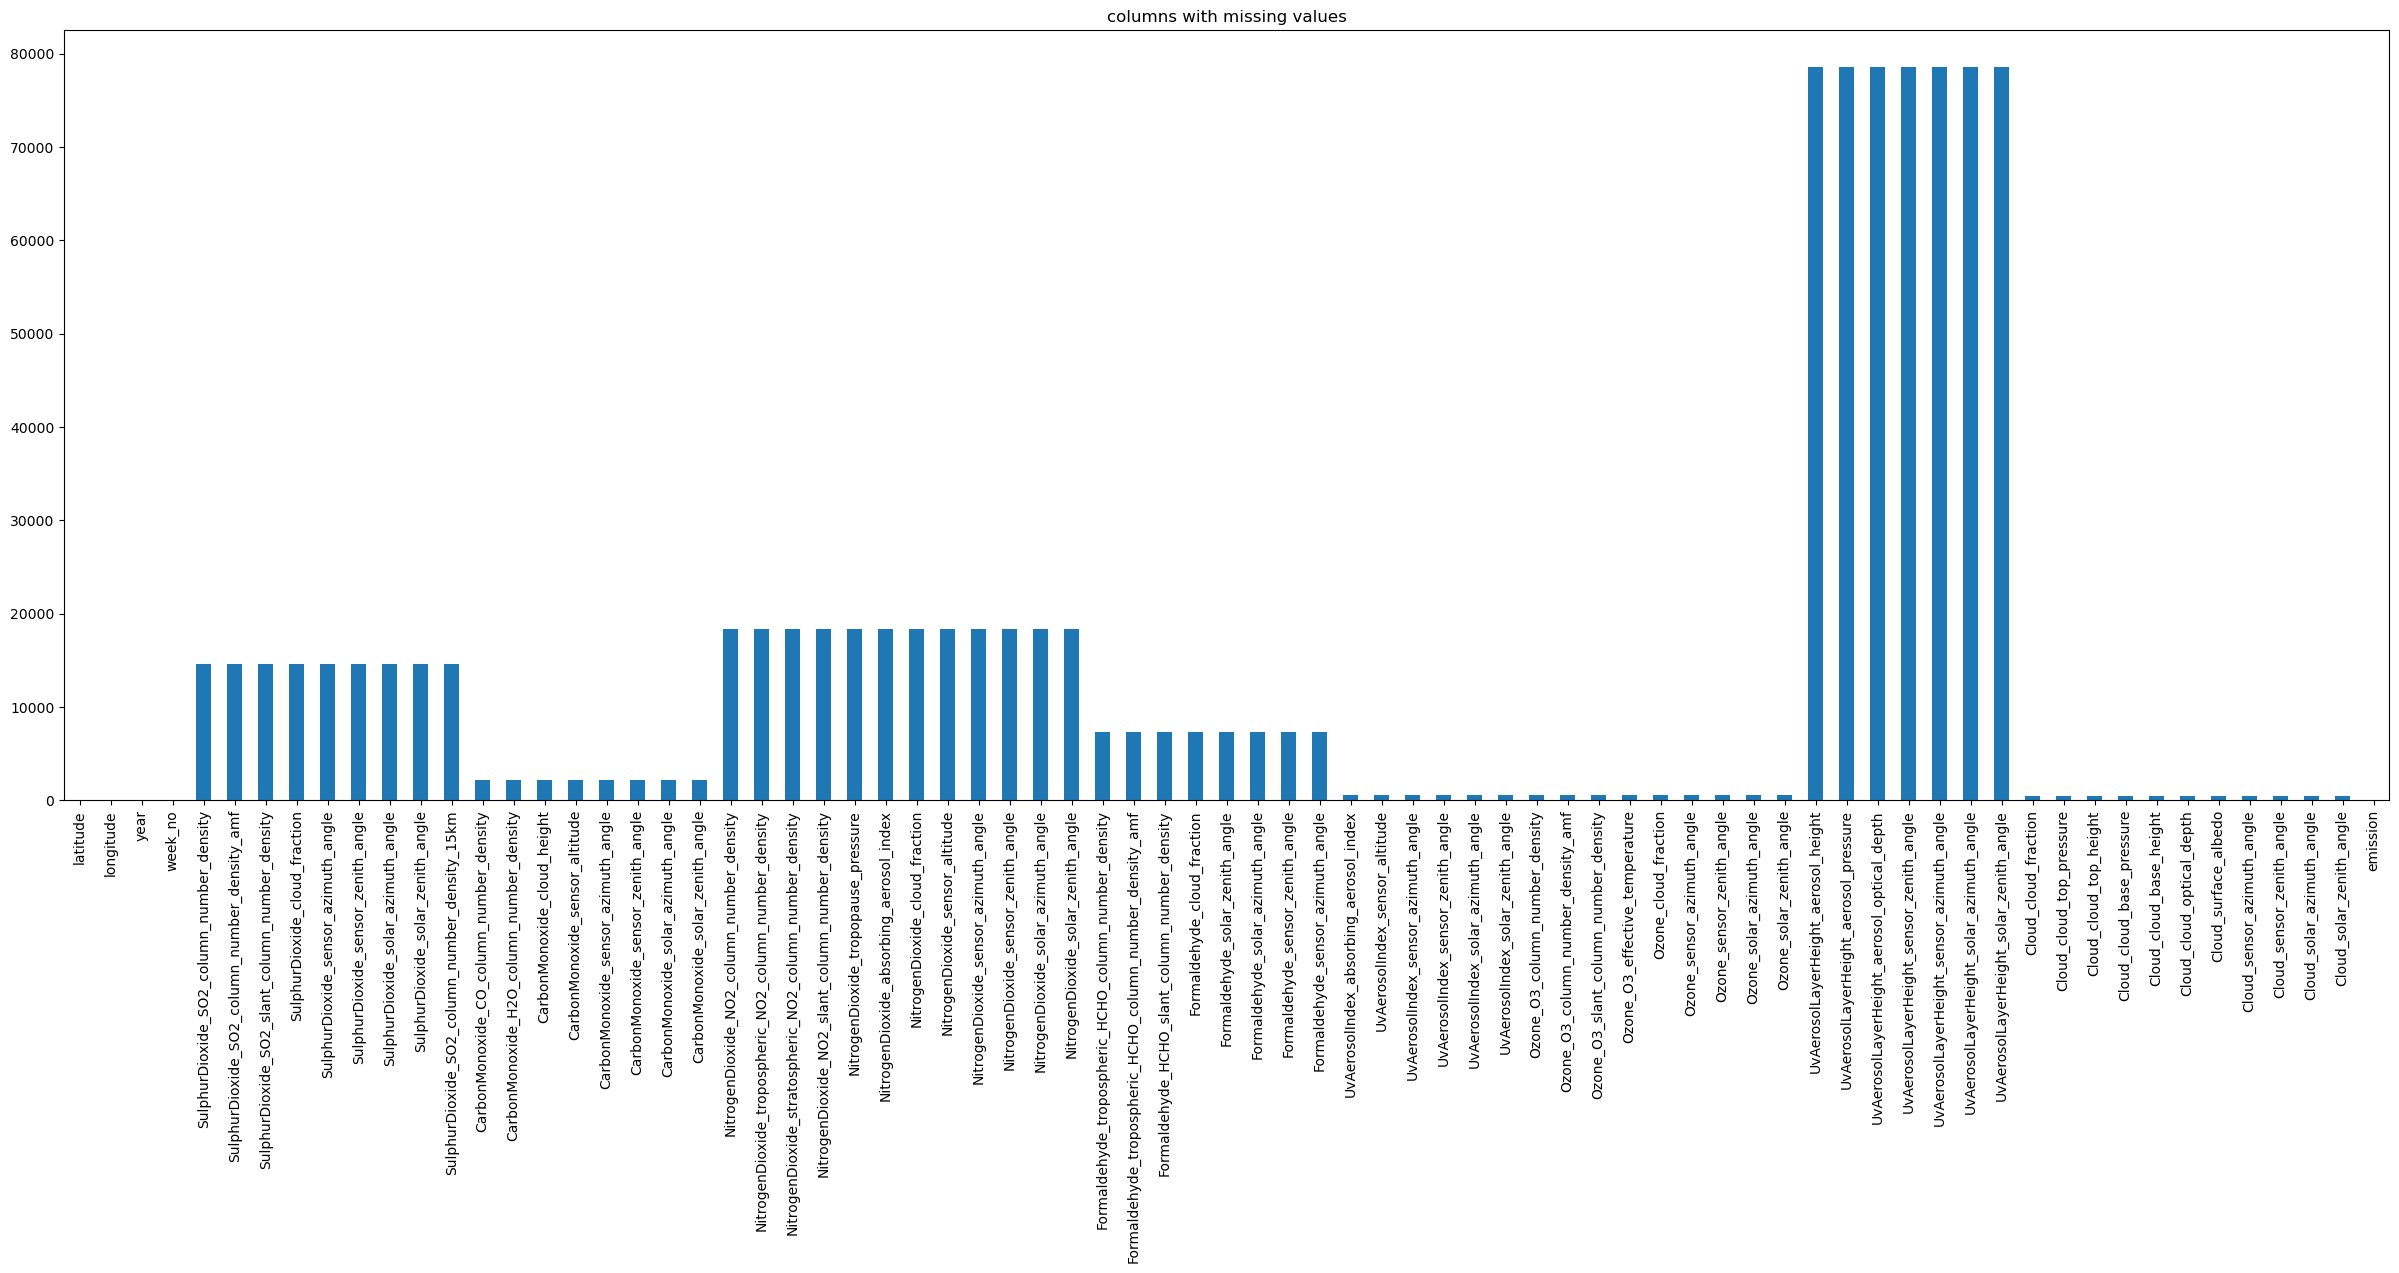

In [8]:
##NULL VALUES
plt.figure(figsize=(30,10))
plt.title(f'columns with missing values')
null = df.isna().sum()
null.plot(kind = 'bar')
plt.show()

In [9]:
missing_values = pd.DataFrame(index=test.columns)
missing_values["MissingTrain"] = df.isna().sum()
missing_values["MissingTrainRatio"] = missing_values['MissingTrain'] / len(df)
missing_values["MissingTest"] = test.isna().sum()
missing_values["MissingTestRatio"] = missing_values['MissingTest'] / len(test)
missing_values


MissingTrain  \
latitude                                                       0   
longitude                                                      0   
year                                                           0   
week_no                                                        0   
SulphurDioxide_SO2_column_number_density                   14609   
SulphurDioxide_SO2_column_number_density_amf               14609   
SulphurDioxide_SO2_slant_column_number_density             14609   
SulphurDioxide_cloud_fraction                              14609   
SulphurDioxide_sensor_azimuth_angle                        14609   
SulphurDioxide_sensor_zenith_angle                         14609   
SulphurDioxide_solar_azimuth_angle                         14609   
SulphurDioxide_solar_zenith_angle                          14609   
SulphurDioxide_SO2_column_number_density_15km              14609   
CarbonMonoxide_CO_column_number_density                     2122   
CarbonMonoxide_H2O_column_number_density                    2122   
CarbonMonoxide_cloud_height                                 2122   
CarbonMonoxide_sensor_altitude                              2122   
CarbonMonoxide_sensor_azimuth_angle                         2122   
CarbonMonoxide_sensor_zenith_angle                          2122   
CarbonMonoxide_solar_azimuth_angle                          2122   
CarbonMonoxide_solar_zenith_angle                           2122   
NitrogenDioxide_NO2_column_number_density                  18320   
NitrogenDioxide_tropospheric_NO2_column_number_...         18320   
NitrogenDioxide_stratospheric_NO2_column_number...         18320   
NitrogenDioxide_NO2_slant_column_number_density            18320   
NitrogenDioxide_tropopause_pressure                        18320   
NitrogenDioxide_absorbing_aerosol_index                    18320   
NitrogenDioxide_cloud_fraction                             18320   
NitrogenDioxide_sensor_altitude                            18320   
NitrogenDioxide_sensor_azimuth_angle                       18320   
NitrogenDioxide_sensor_zenith_angle                        18320   
NitrogenDioxide_solar_azimuth_angle                        18320   
NitrogenDioxide_solar_zenith_angle                         18320   
Formaldehyde_tropospheric_HCHO_column_number_de...          7277   
Formaldehyde_tropospheric_HCHO_column_number_de...          7277   
Formaldehyde_HCHO_slant_column_number_density               7277   
Formaldehyde_cloud_fraction                                 7277   
Formaldehyde_solar_zenith_angle                             7277   
Formaldehyde_solar_azimuth_angle                            7277   
Formaldehyde_sensor_zenith_angle                            7277   
Formaldehyde_sensor_azimuth_angle                           7277   
UvAerosolIndex_absorbing_aerosol_index                       539   
UvAerosolIndex_sensor_altitude                               539   
UvAerosolIndex_sensor_azimuth_angle                          539   
UvAerosolIndex_sensor_zenith_angle                           539   
UvAerosolIndex_solar_azimuth_angle                           539   
UvAerosolIndex_solar_zenith_angle                            539   
Ozone_O3_column_number_density                               548   
Ozone_O3_column_number_density_amf                           548   
Ozone_O3_slant_column_number_density                         548   
Ozone_O3_effective_temperature                               548   
Ozone_cloud_fraction                                         548   
Ozone_sensor_azimuth_angle                                   548   
Ozone_sensor_zenith_angle                                    548   
Ozone_solar_azimuth_angle                                    548   
Ozone_solar_zenith_angle                                     548   
UvAerosolLayerHeight_aerosol_height                        78584   
UvAerosolLayerHeight_aerosol_pressure                      78584   
UvAerosolLayerHeight_aerosol_optical_dep

In [10]:
col_missing = [ ]
for col in df.columns:
    percent_missing = (df[col].isnull().sum() * 100) / len(df)
    if percent_missing >= 40:
        col_missing.append(col)


In [11]:
col_missing

['UvAerosolLayerHeight_aerosol_height',
 'UvAerosolLayerHeight_aerosol_pressure',
 'UvAerosolLayerHeight_aerosol_optical_depth',
 'UvAerosolLayerHeight_sensor_zenith_angle',
 'UvAerosolLayerHeight_sensor_azimuth_angle',
 'UvAerosolLayerHeight_solar_azimuth_angle',
 'UvAerosolLayerHeight_solar_zenith_angle']

In [12]:
col_drop = ['Formaldehyde_tropospheric_HCHO_column_number_density',
'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
'Formaldehyde_HCHO_slant_column_number_density' ,
'Formaldehyde_cloud_fraction',
'Formaldehyde_solar_zenith_angle',
'Formaldehyde_solar_azimuth_angle',
'Formaldehyde_sensor_zenith_angle',
'Formaldehyde_sensor_azimuth_angle',
'Cloud_cloud_fraction',
'Cloud_cloud_top_pressure', 
'Cloud_cloud_top_height',
'Cloud_cloud_base_pressure',
'Cloud_cloud_base_height',
'Cloud_cloud_optical_depth',
'Cloud_surface_albedo',
'Cloud_sensor_azimuth_angle',
'Cloud_sensor_zenith_angle',
'Cloud_solar_azimuth_angle',
'Cloud_solar_zenith_angle',
'UvAerosolIndex_absorbing_aerosol_index', 
'UvAerosolIndex_sensor_altitude',
'UvAerosolIndex_sensor_azimuth_angle',
'UvAerosolIndex_sensor_zenith_angle',
'UvAerosolIndex_solar_azimuth_angle',
'UvAerosolIndex_solar_zenith_angle'  ]            

In [13]:
##DROPIING COLUMNS WITH MORE THAN 40%
df = df.drop(col_missing, axis =1 )
test = test.drop(col_missing, axis =1 )

In [14]:
##DROPIING COLUMNS WITH MORE THAN 40%
df = df.drop(col_drop, axis =1 )
test = test.drop(col_drop, axis =1 )

In [15]:
### let us check for uniqueness of the  columns
for col in df.columns:
    unique = df[col].nunique()
    print(f'{col} has {unique} elements')

latitude has 452 elements
longitude has 453 elements
year has 3 elements
week_no has 53 elements
SulphurDioxide_SO2_column_number_density has 64409 elements
SulphurDioxide_SO2_column_number_density_amf has 64411 elements
SulphurDioxide_SO2_slant_column_number_density has 64409 elements
SulphurDioxide_cloud_fraction has 62367 elements
SulphurDioxide_sensor_azimuth_angle has 64295 elements
SulphurDioxide_sensor_zenith_angle has 64218 elements
SulphurDioxide_solar_azimuth_angle has 64377 elements
SulphurDioxide_solar_zenith_angle has 64376 elements
SulphurDioxide_SO2_column_number_density_15km has 64411 elements
CarbonMonoxide_CO_column_number_density has 76718 elements
CarbonMonoxide_H2O_column_number_density has 76724 elements
CarbonMonoxide_cloud_height has 76707 elements
CarbonMonoxide_sensor_altitude has 72994 elements
CarbonMonoxide_sensor_azimuth_angle has 76596 elements
CarbonMonoxide_sensor_zenith_angle has 76579 elements
CarbonMonoxide_solar_azimuth_angle has 76638 elements
Carb

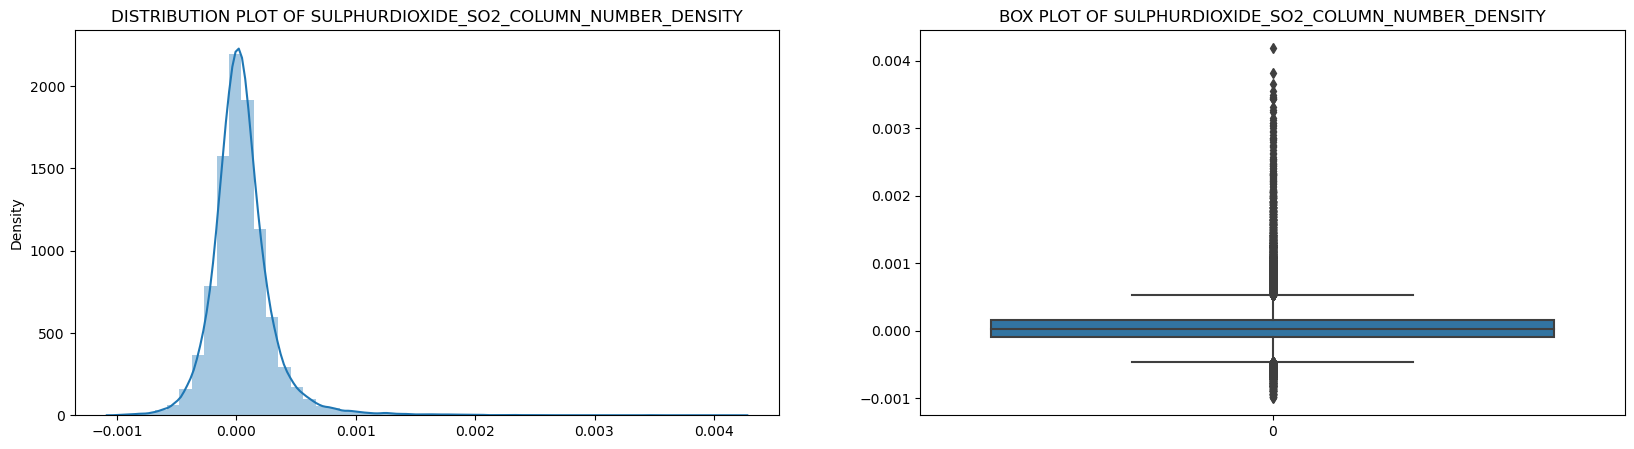

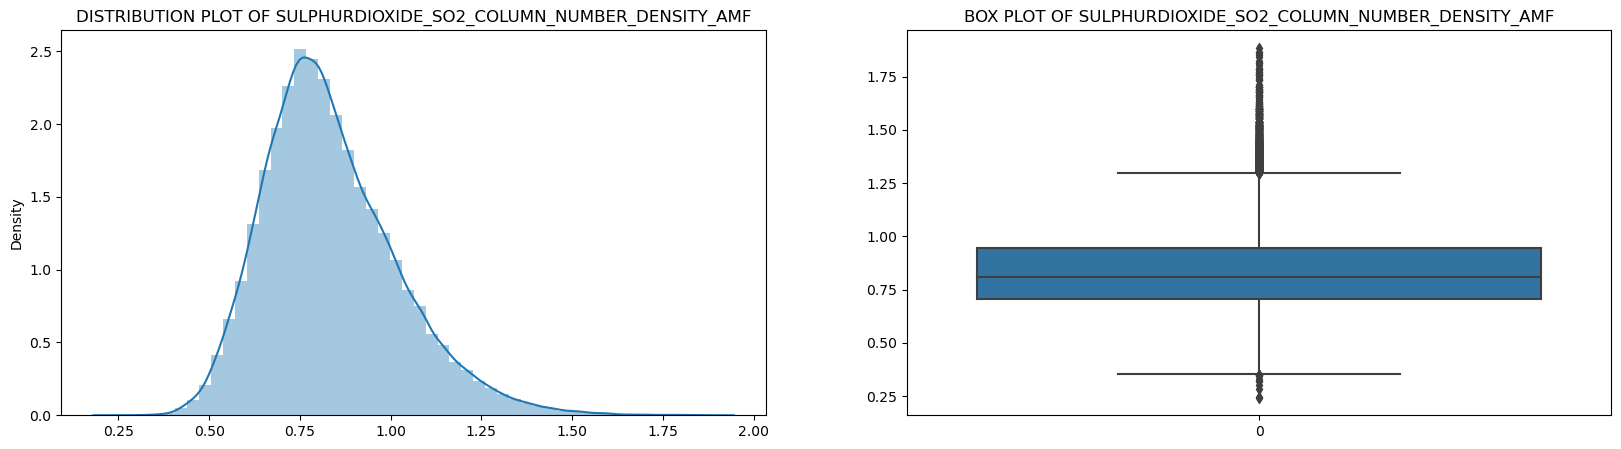

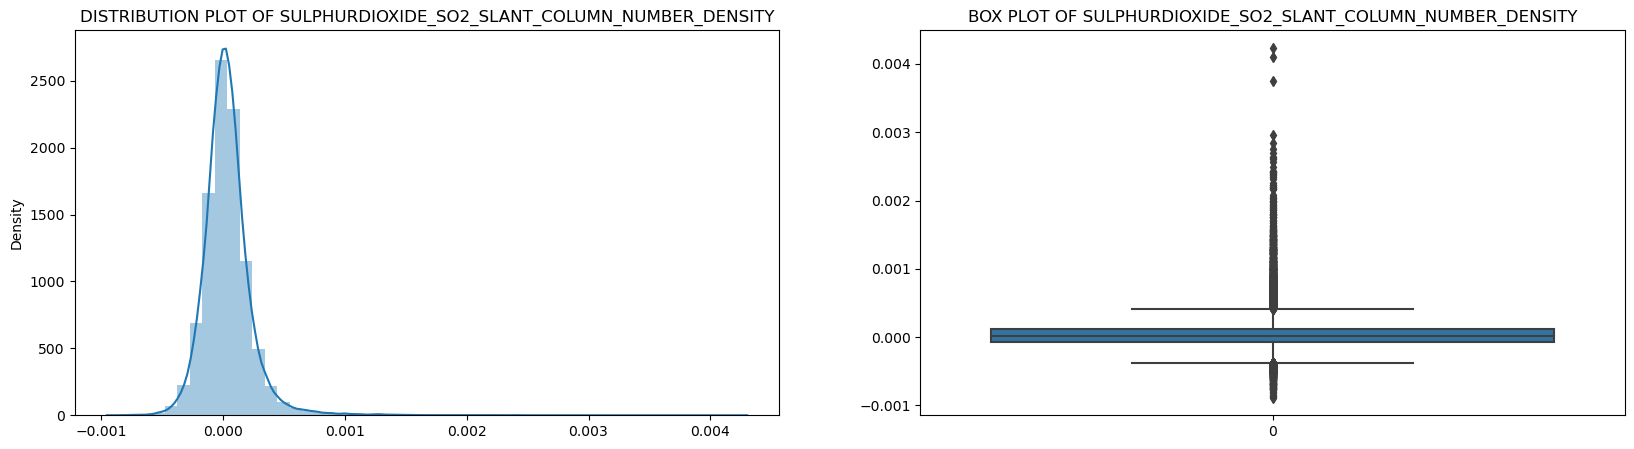

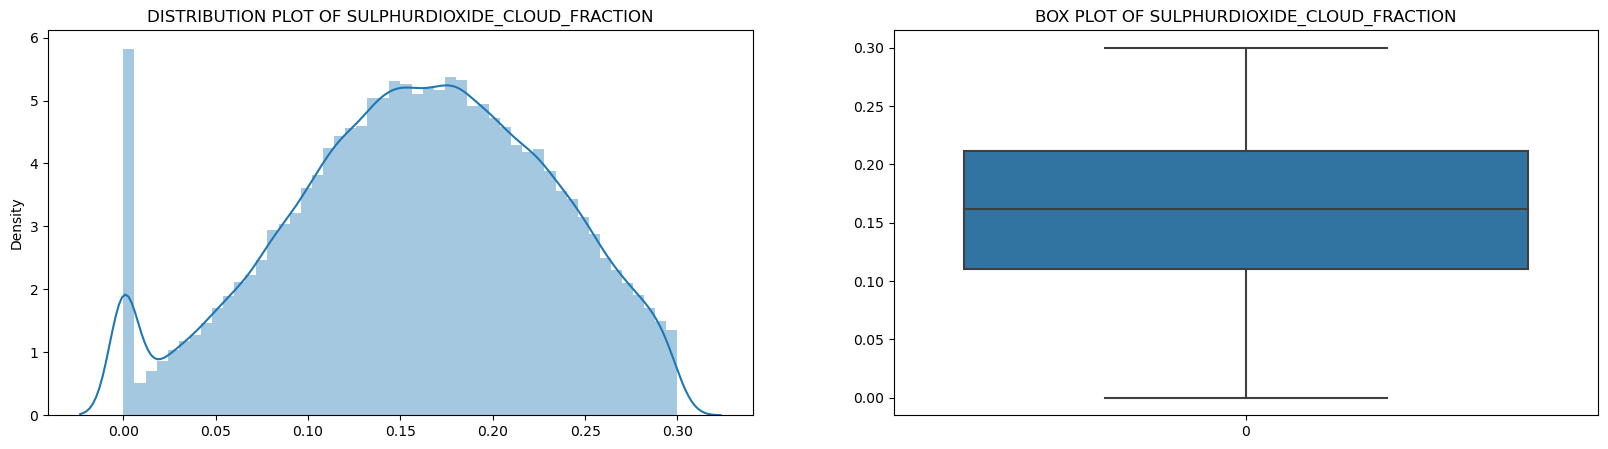

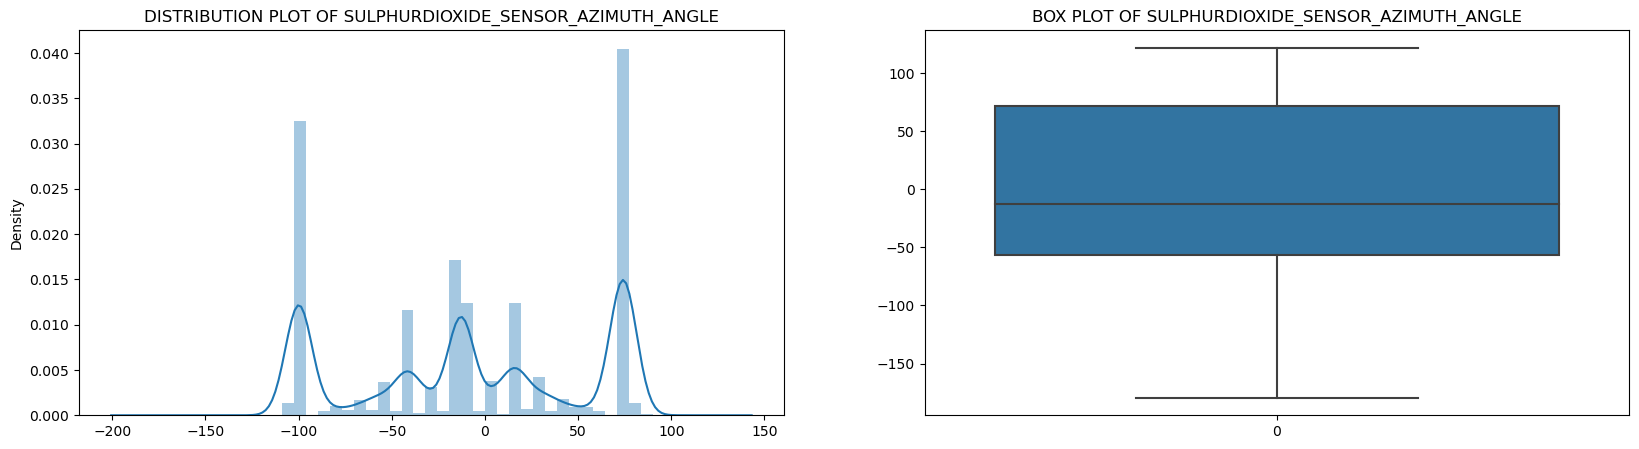

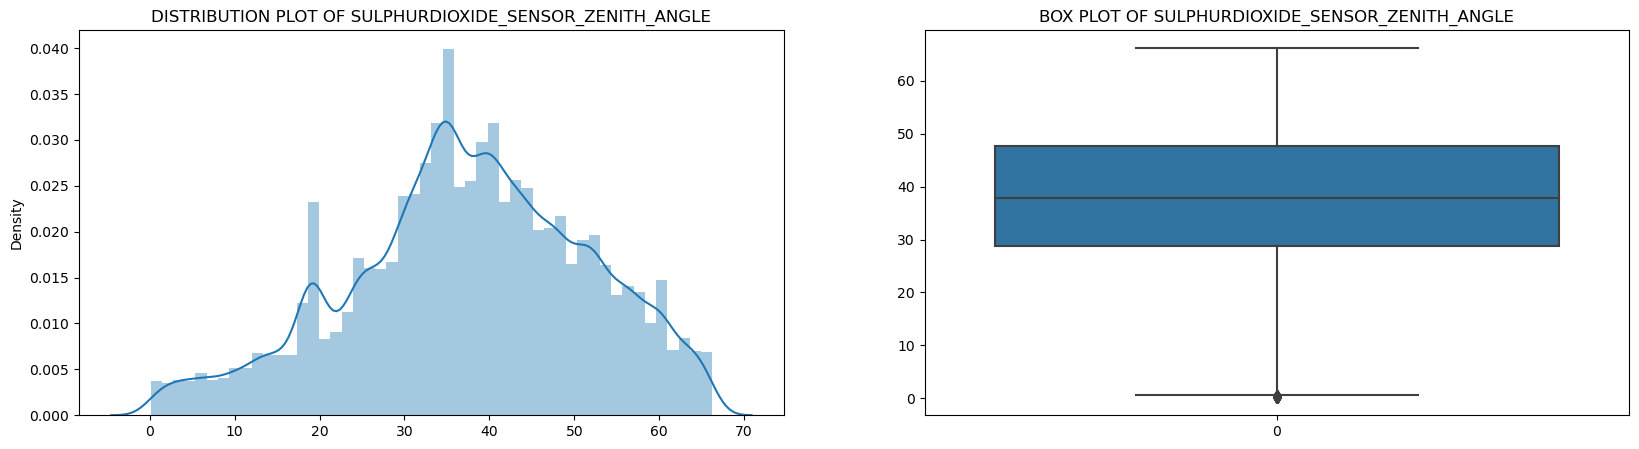

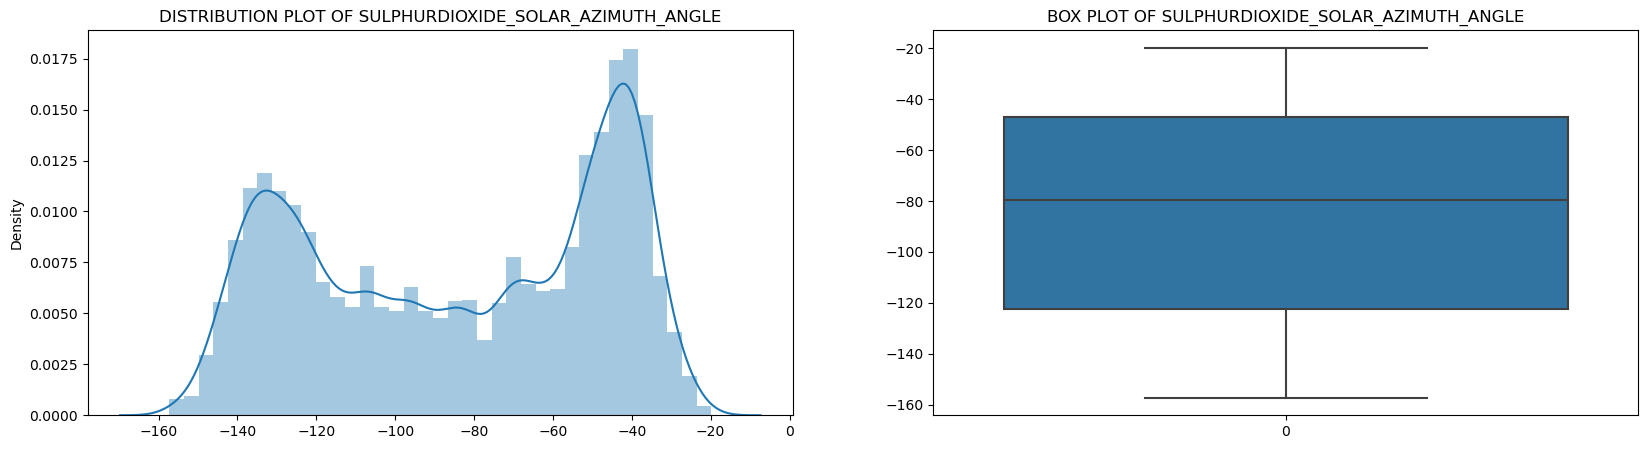

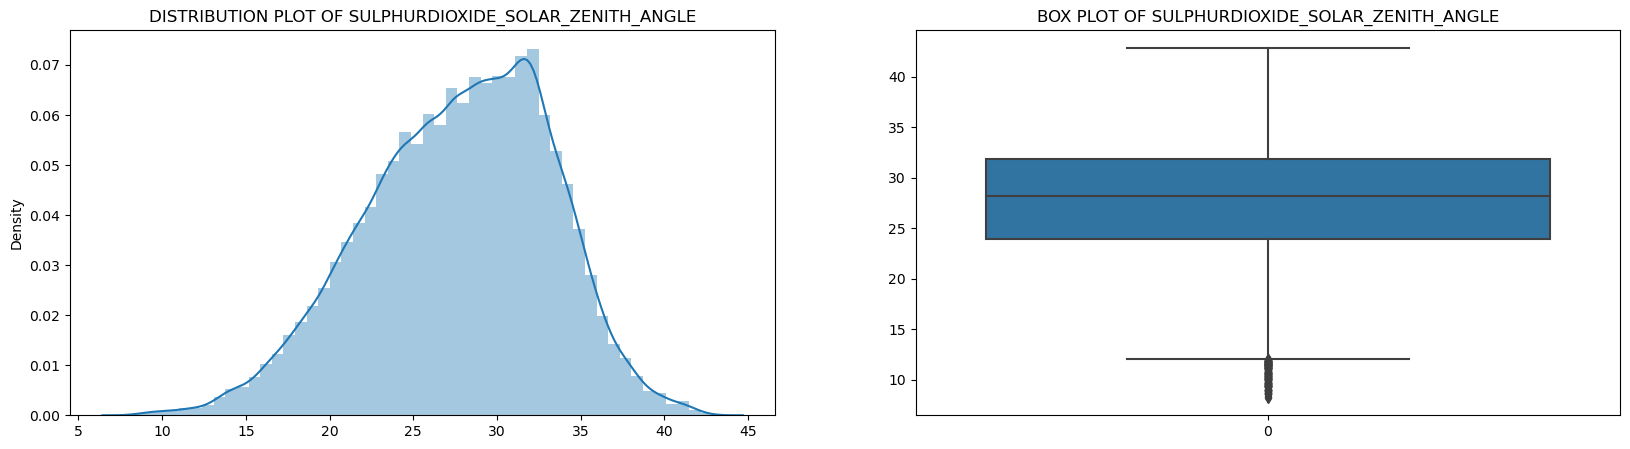

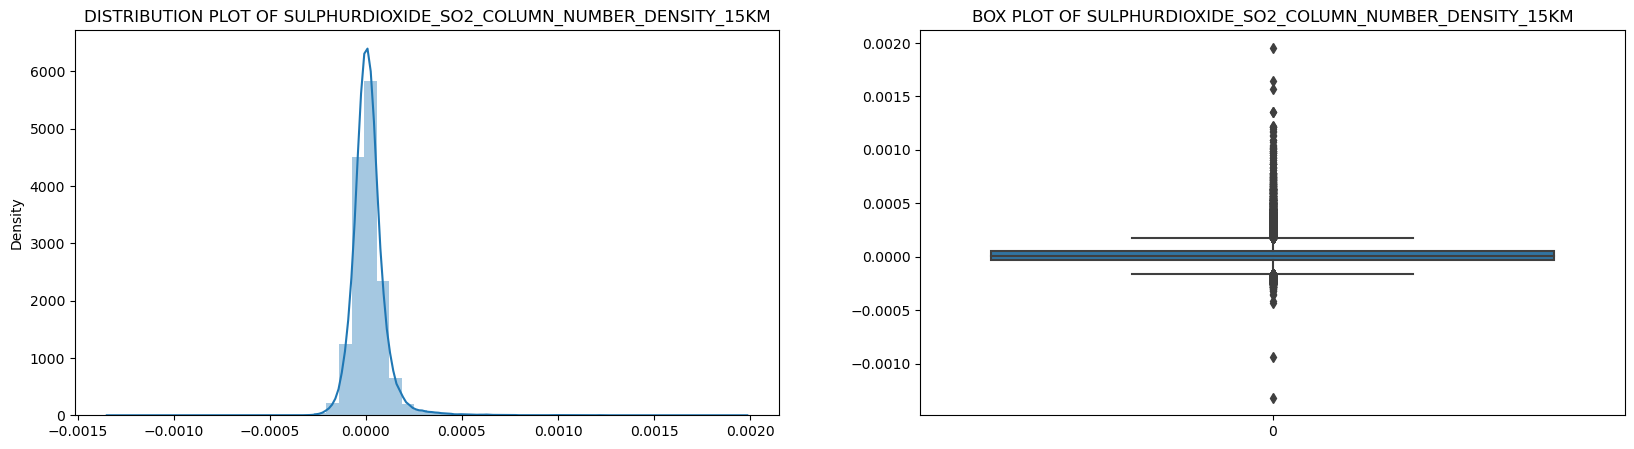

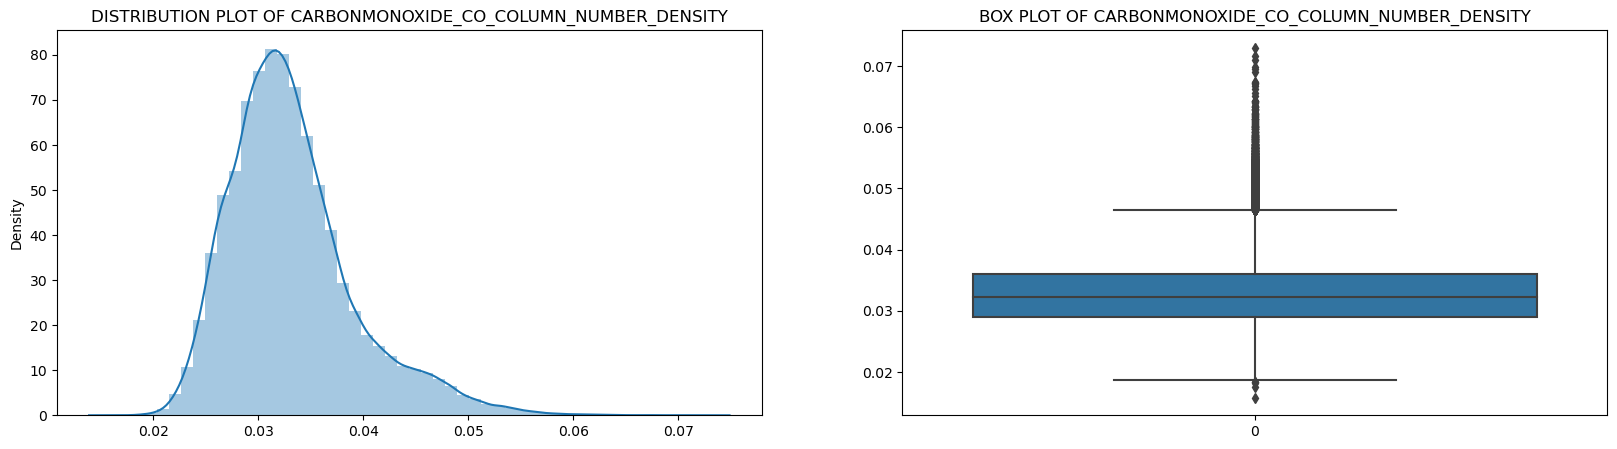

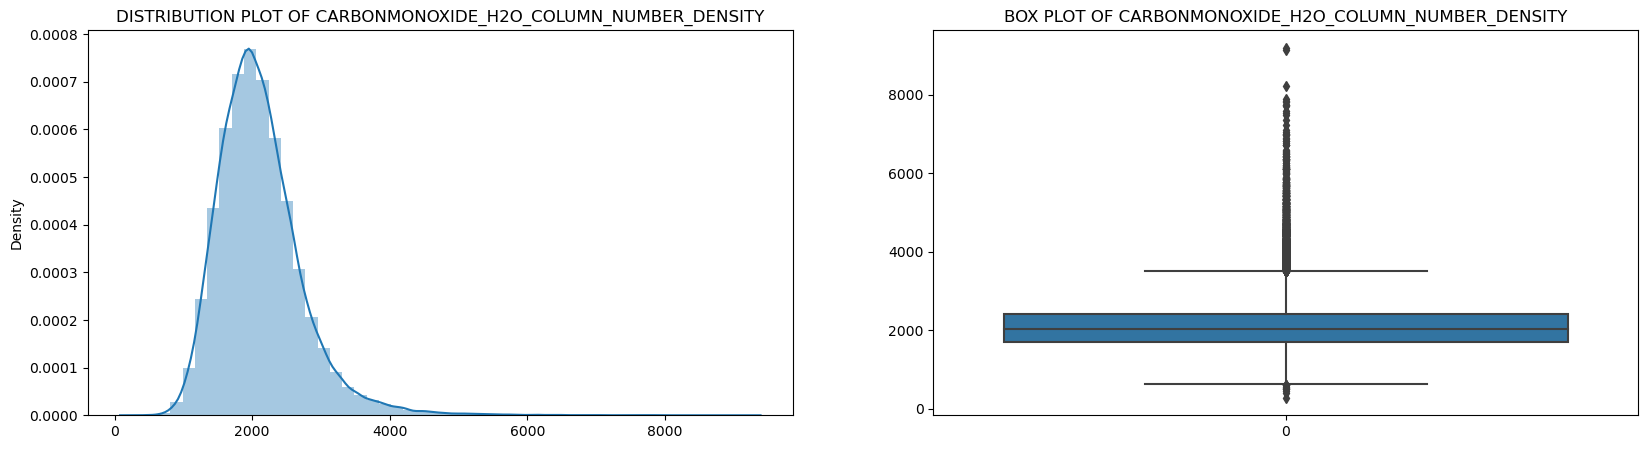

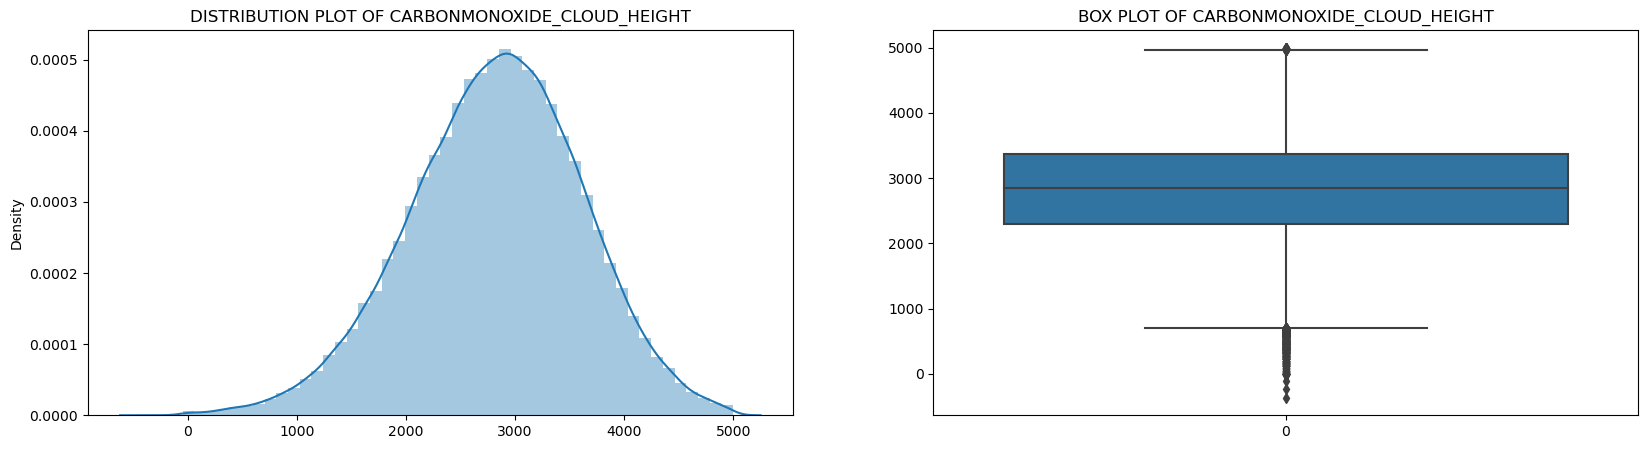

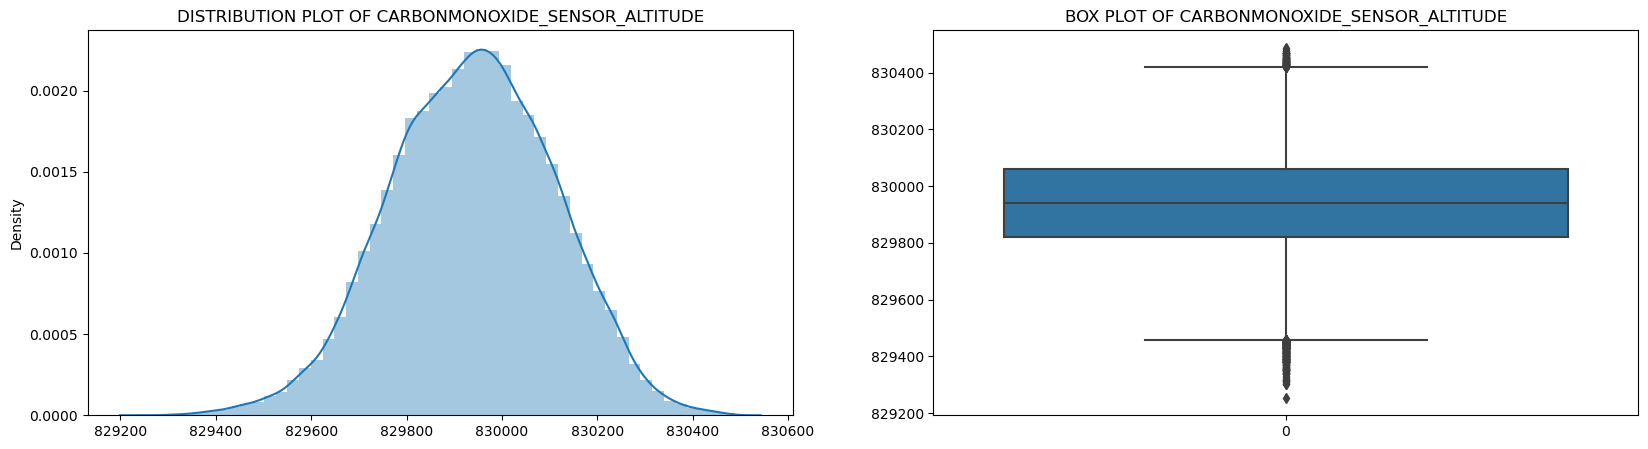

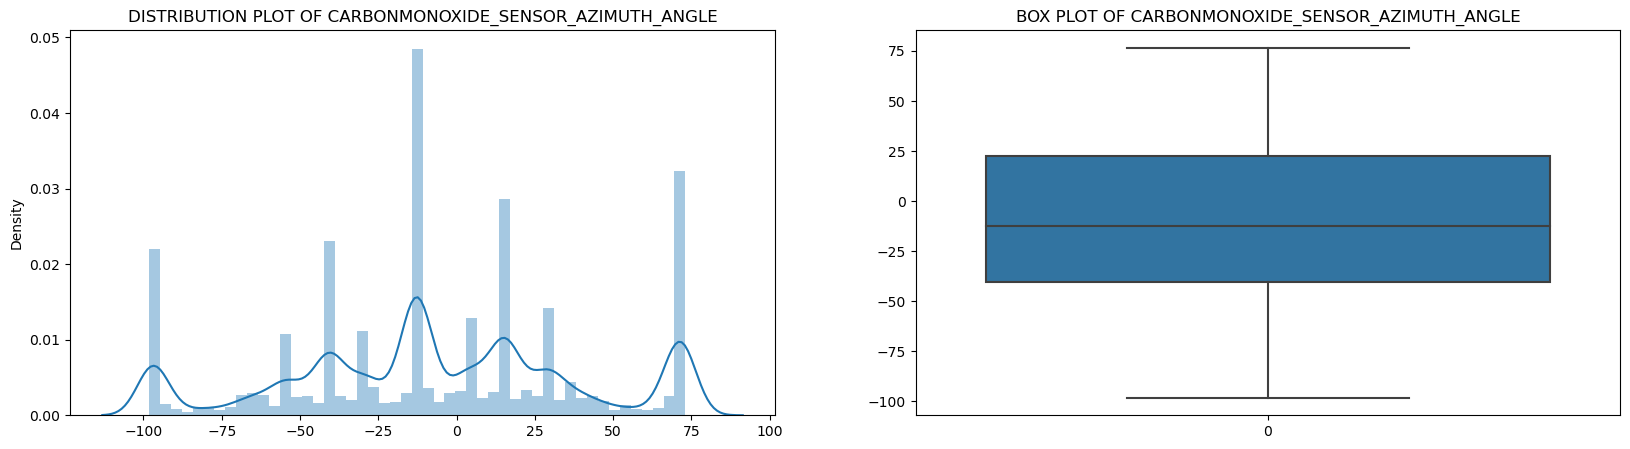

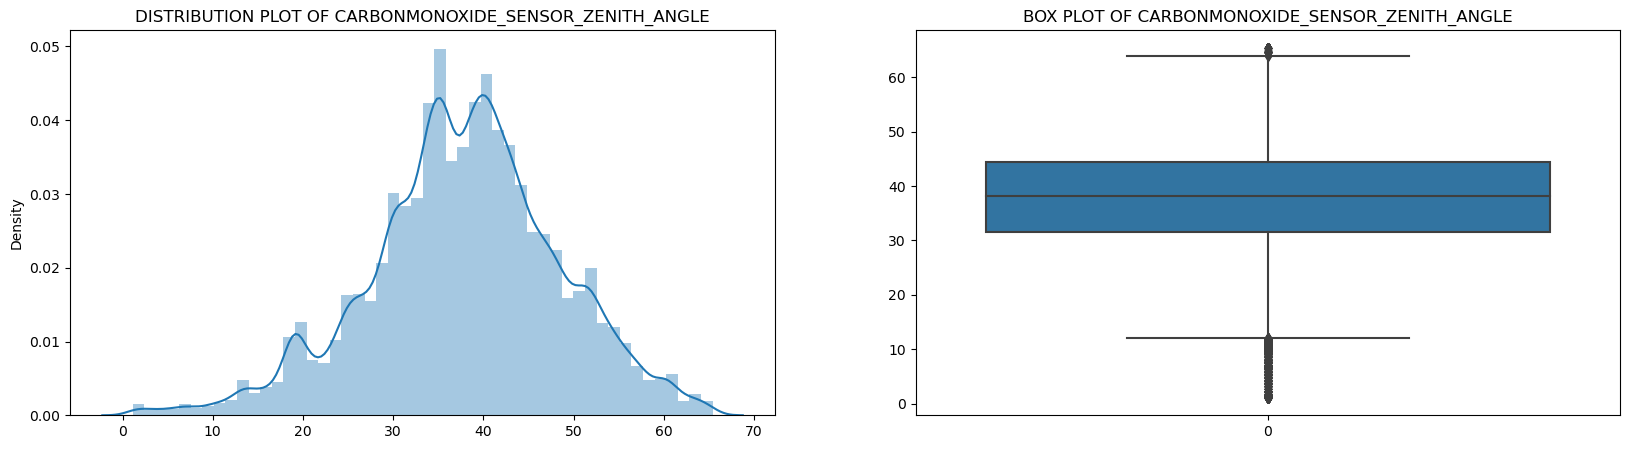

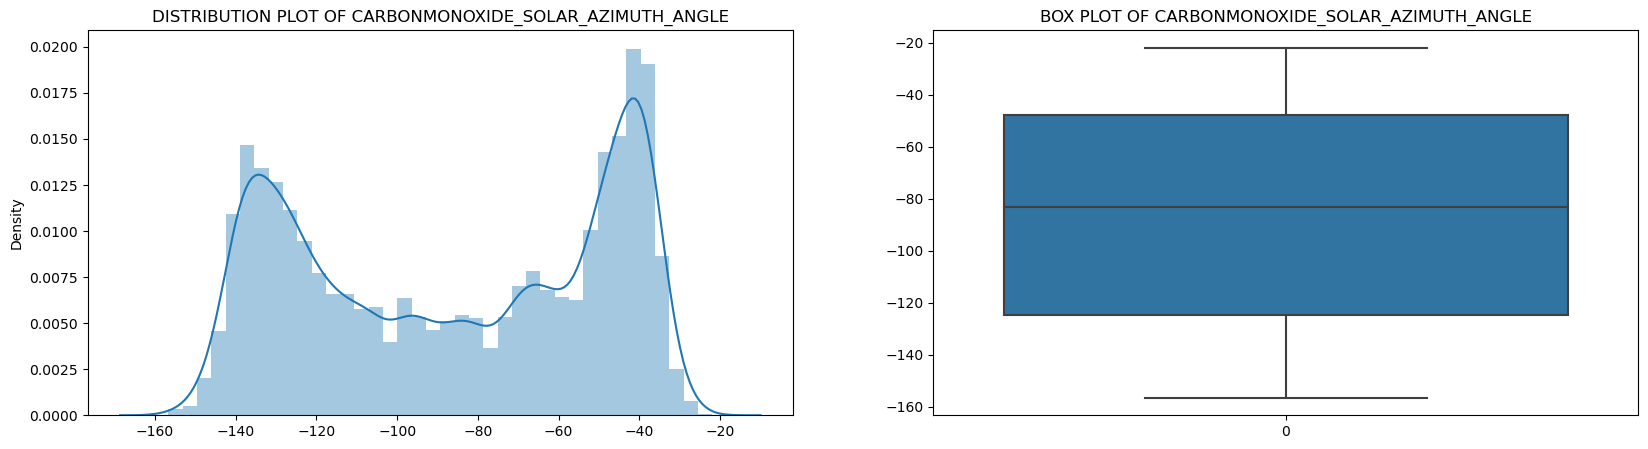

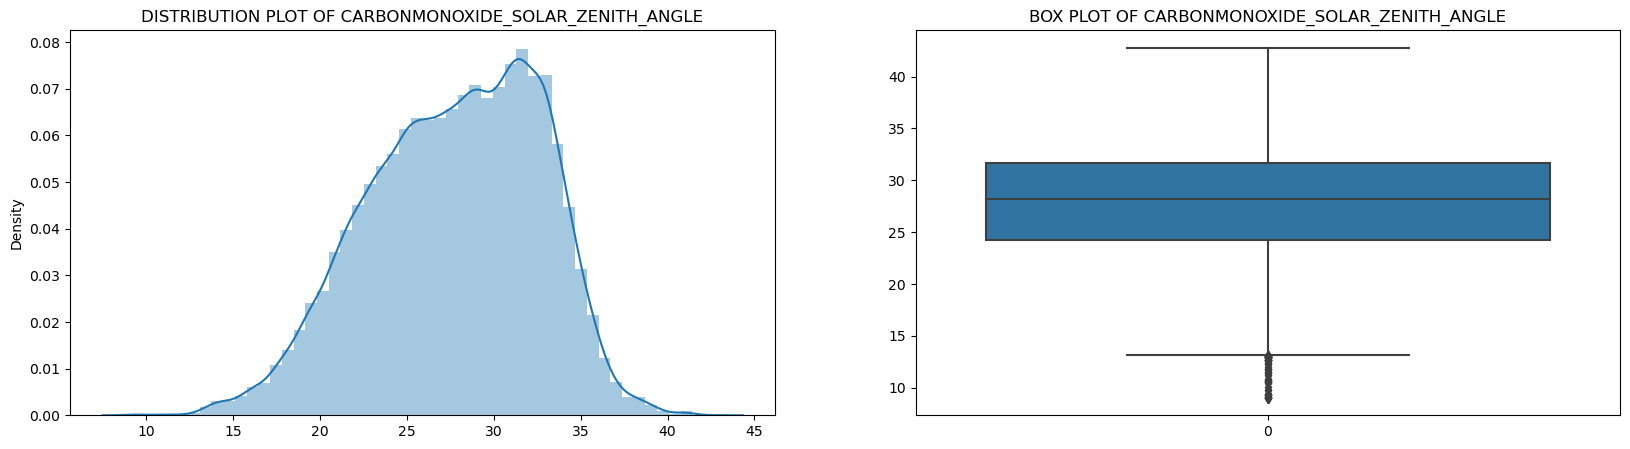

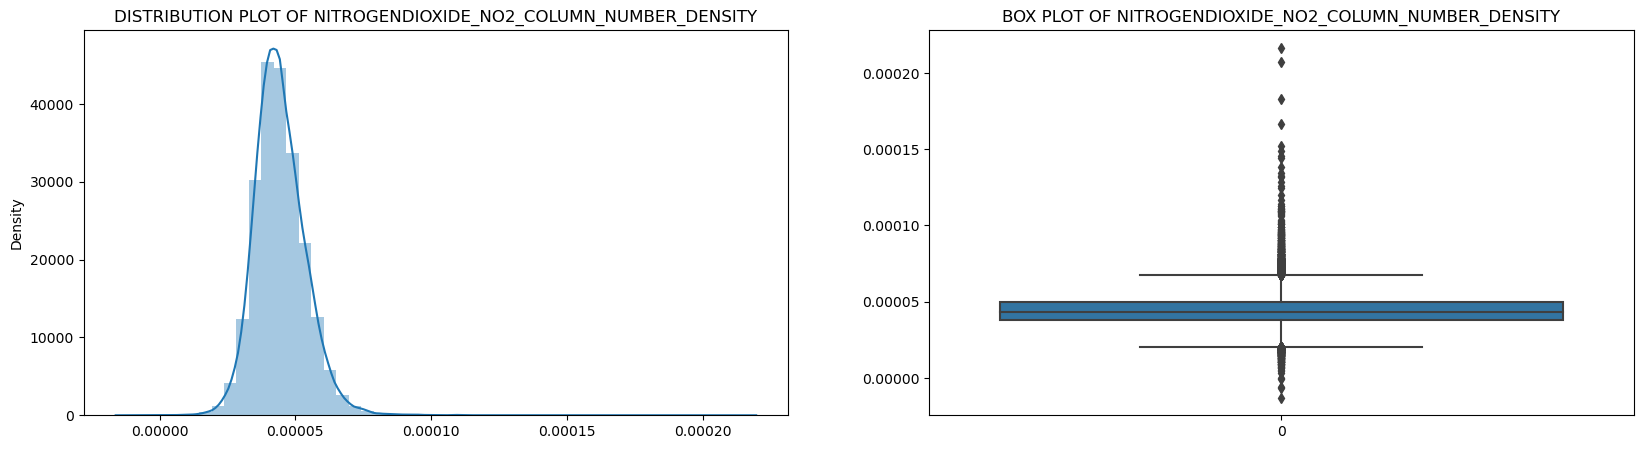

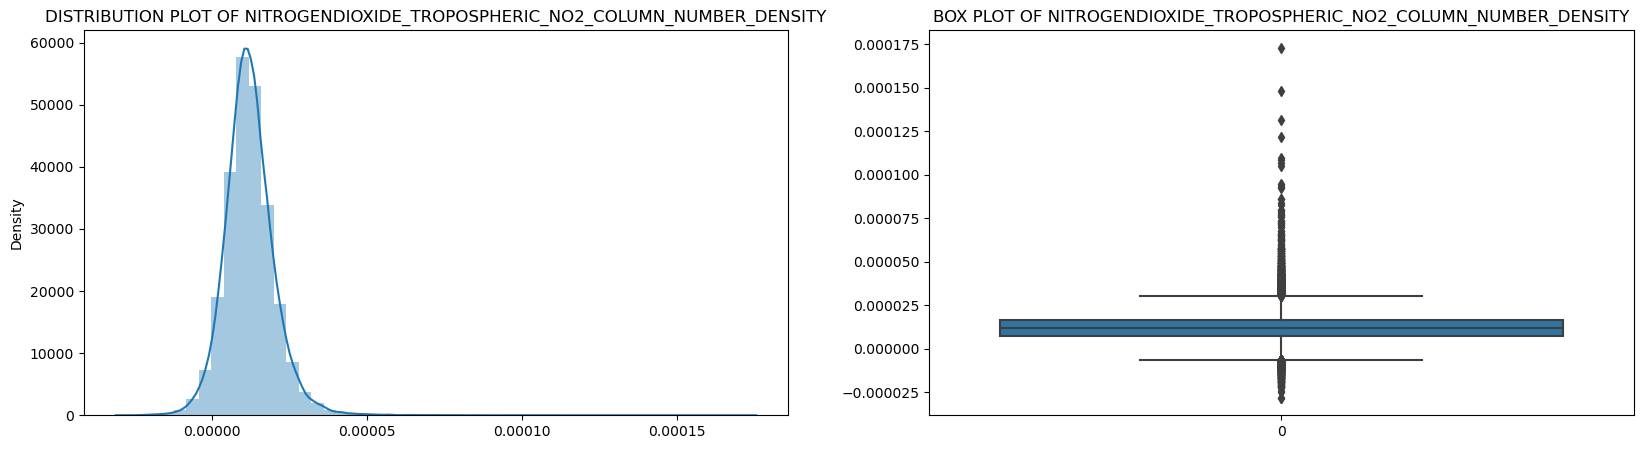

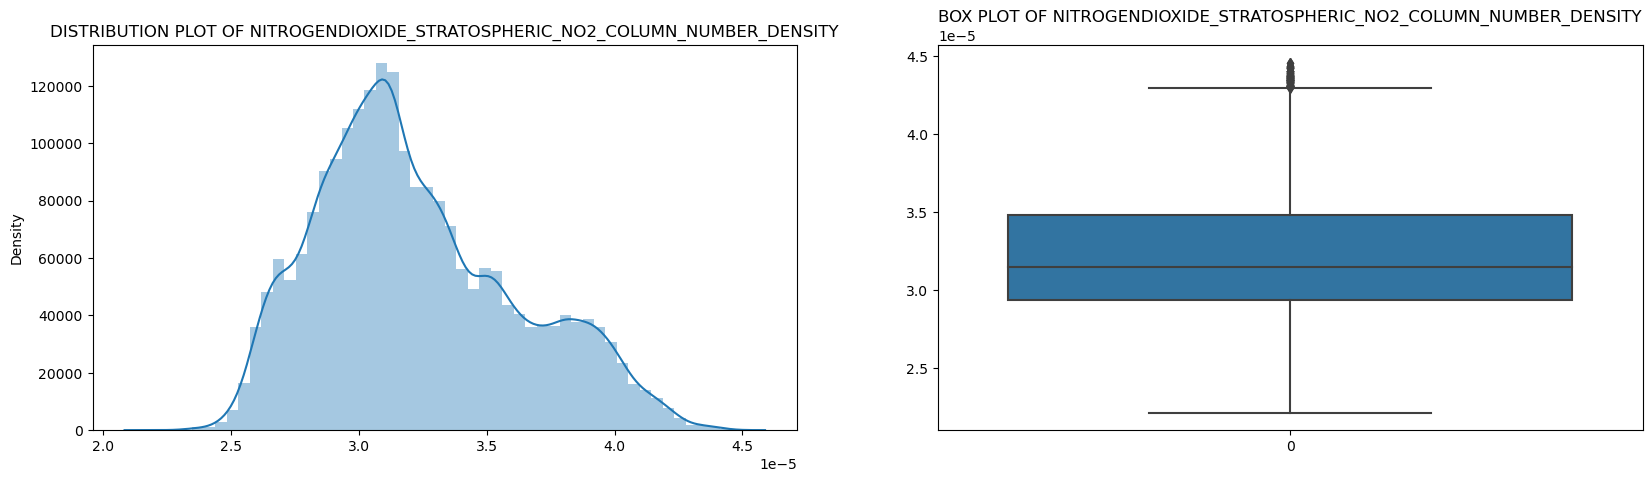

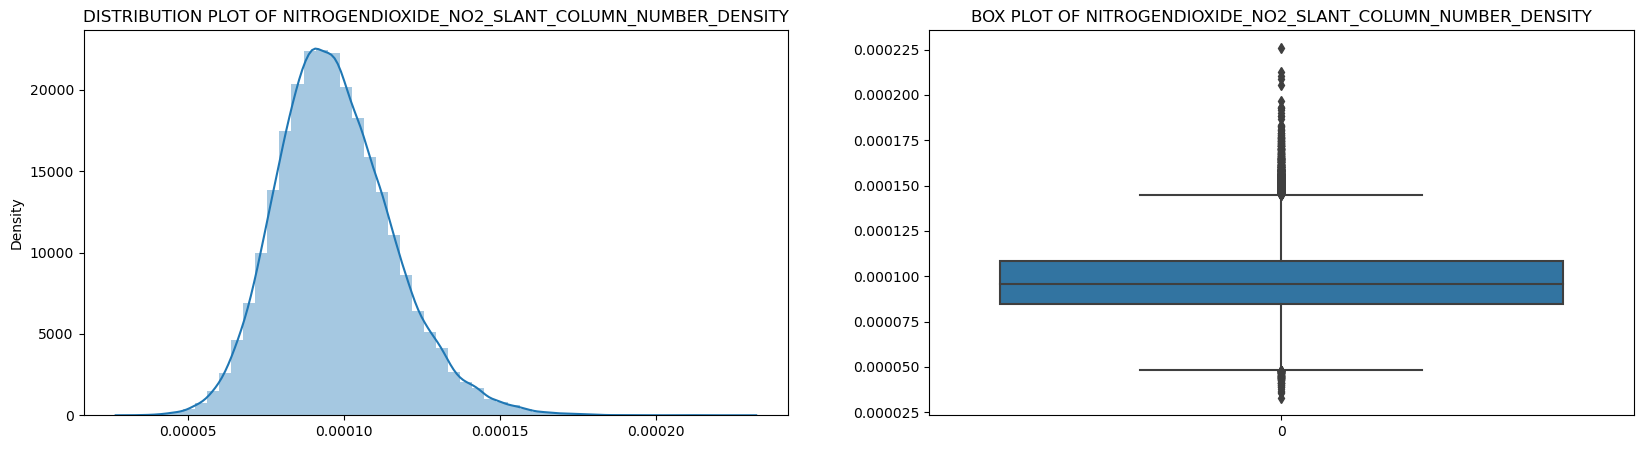

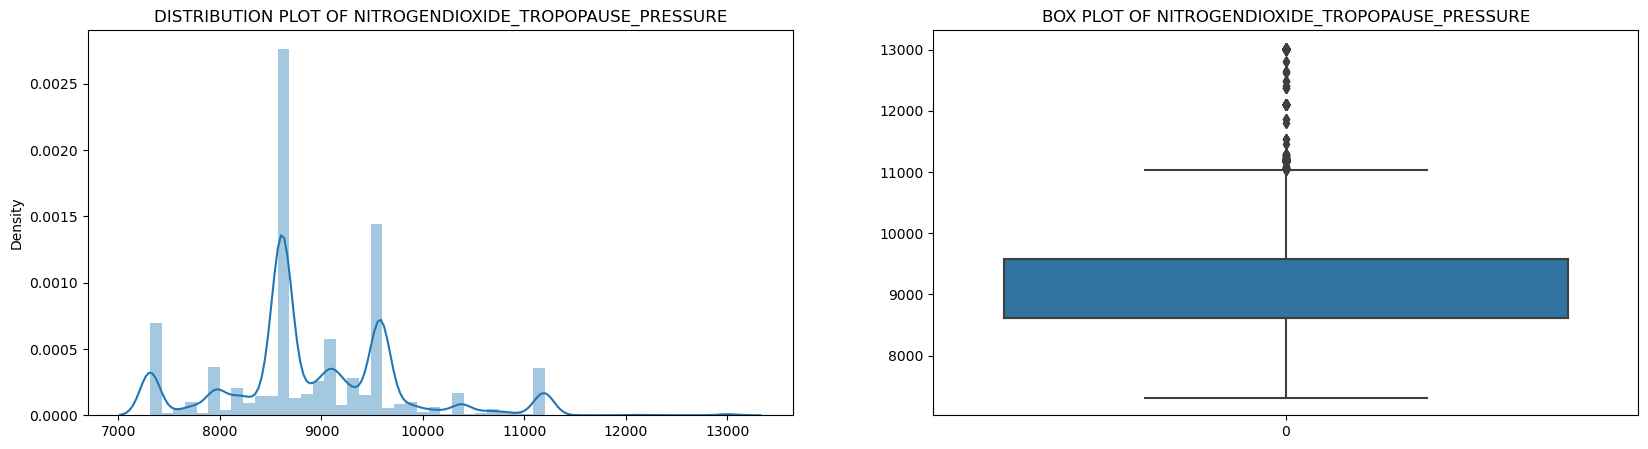

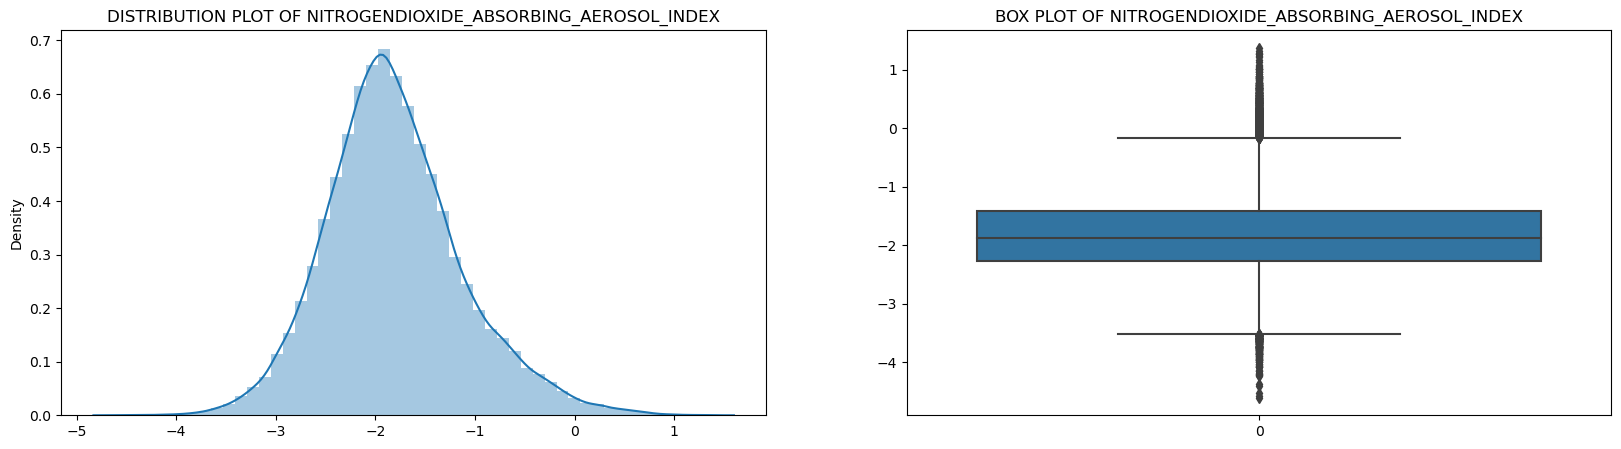

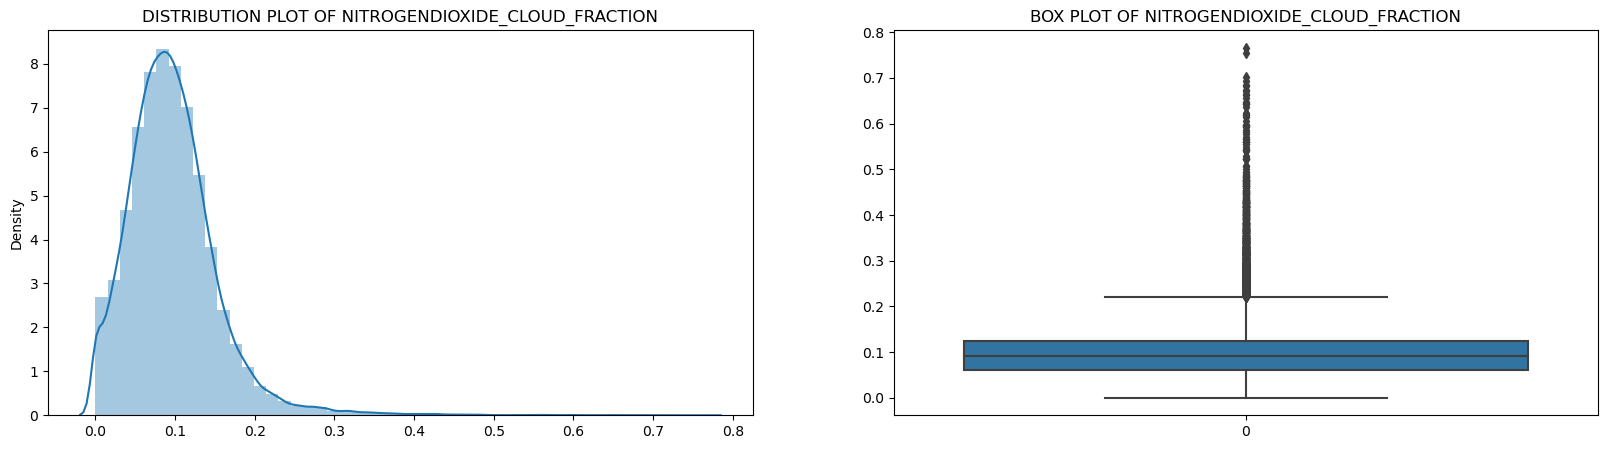

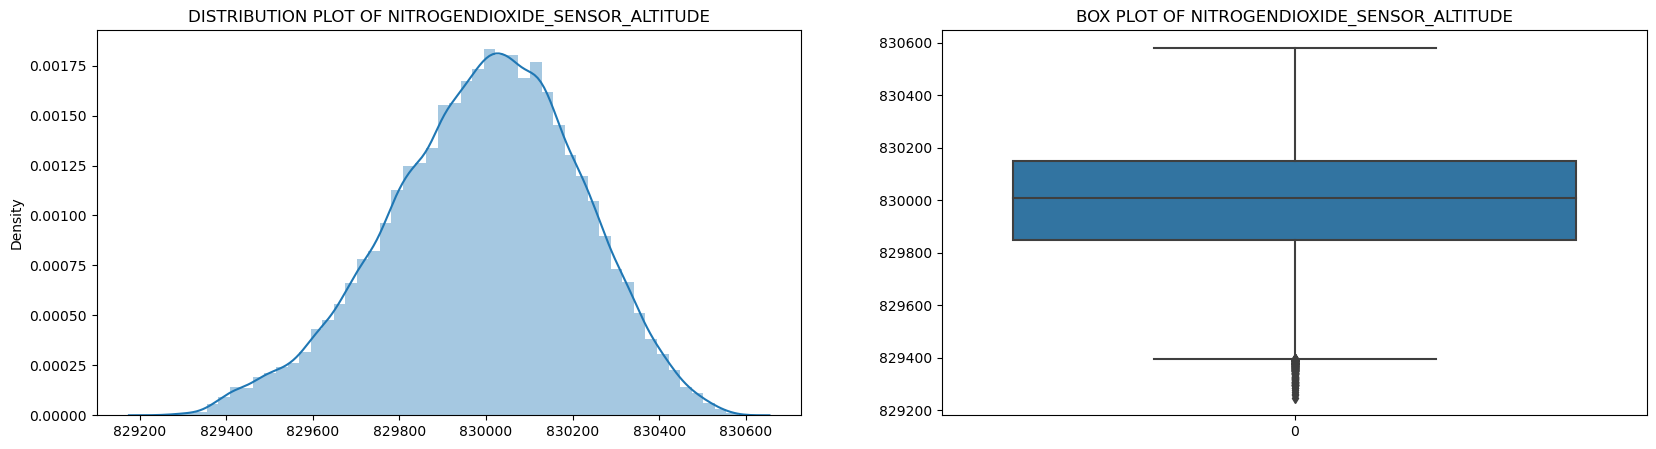

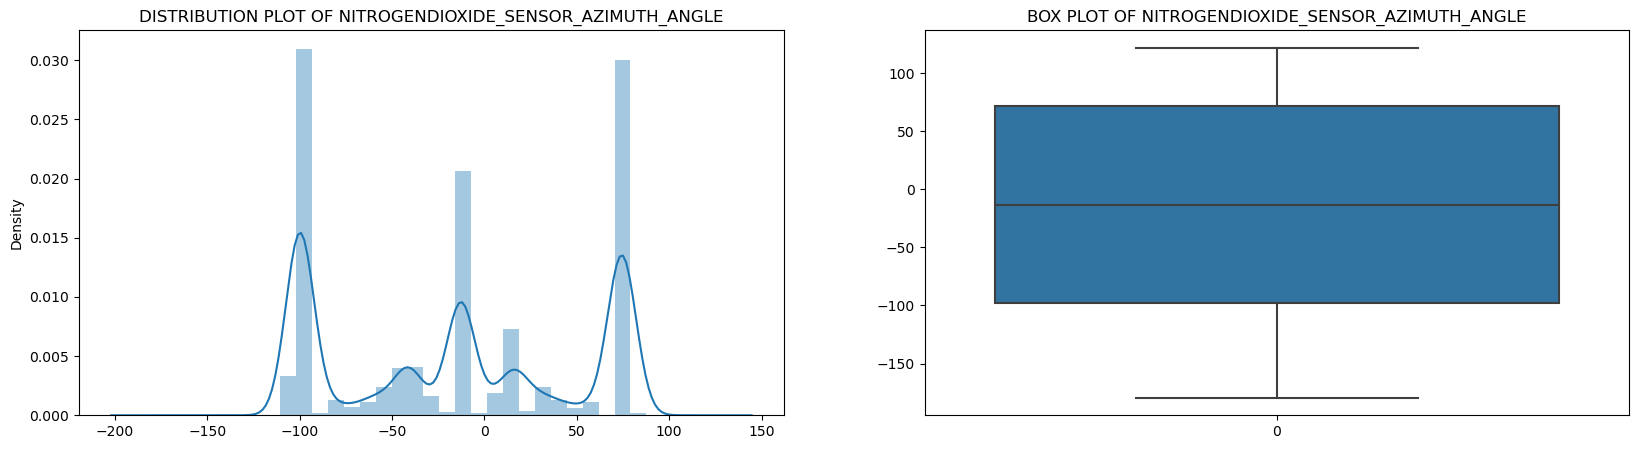

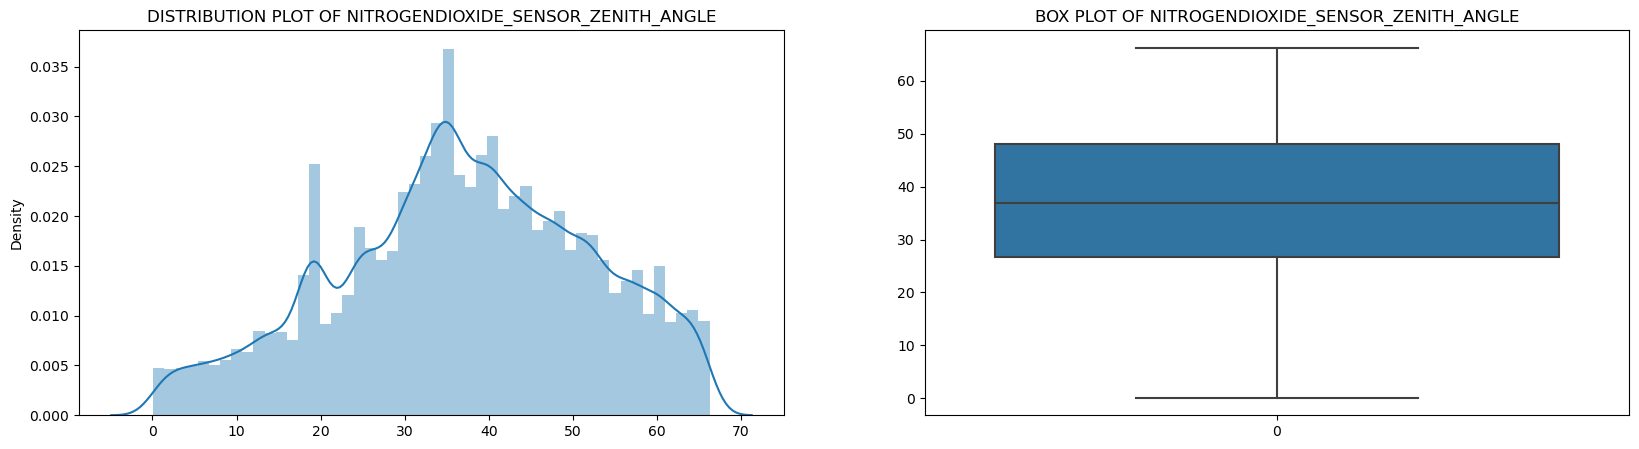

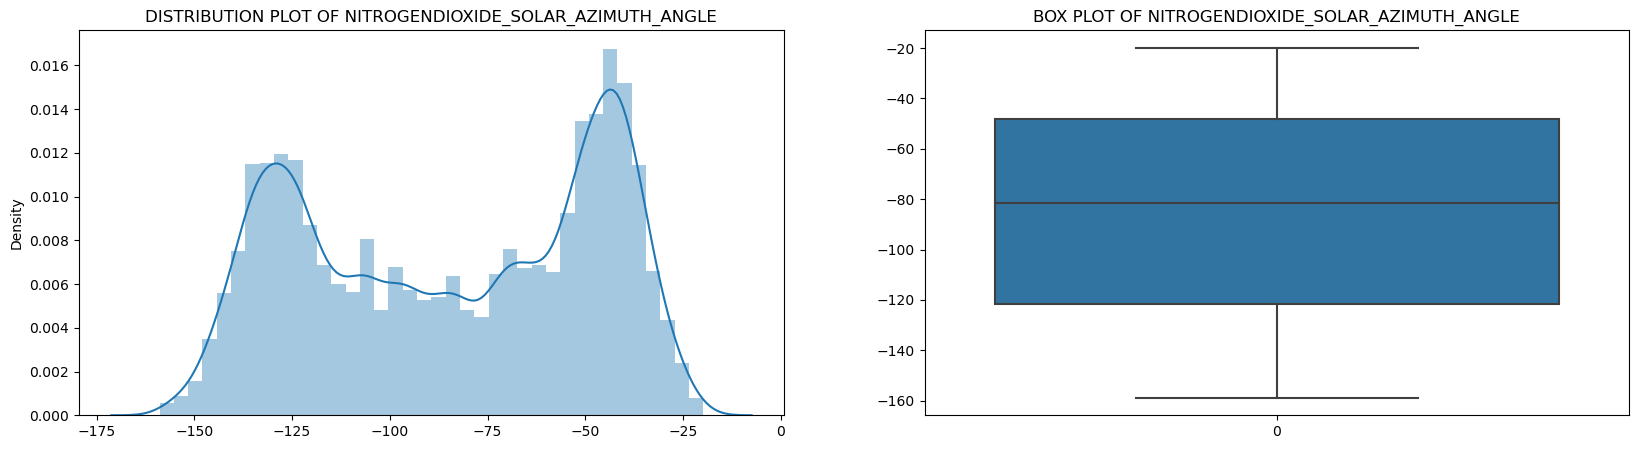

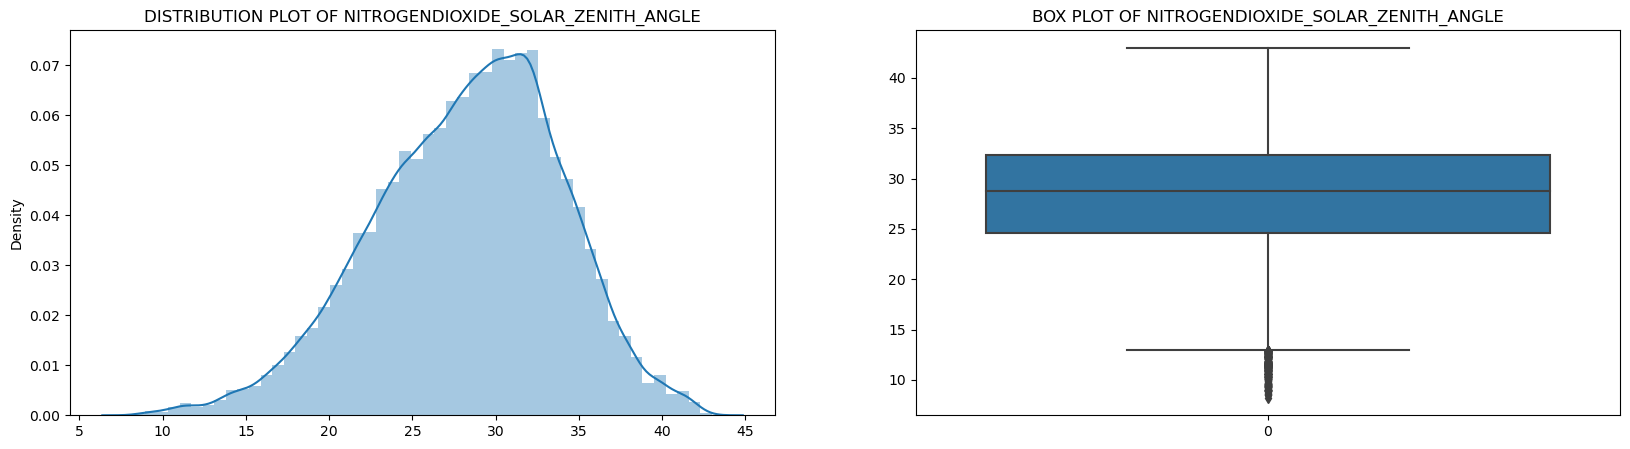

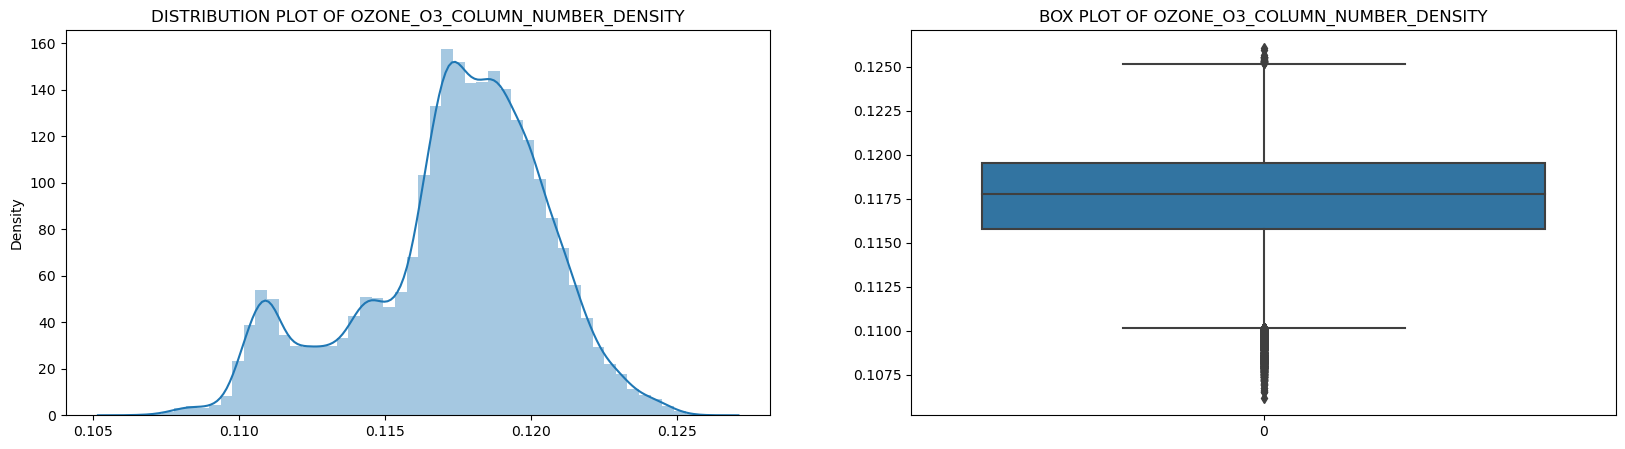

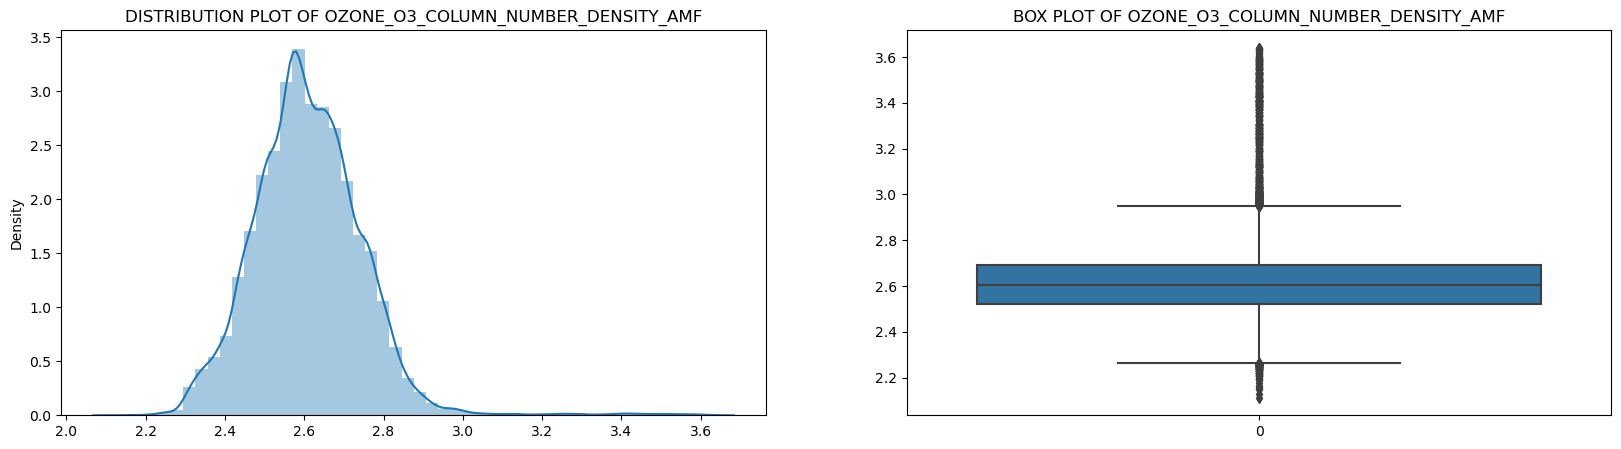

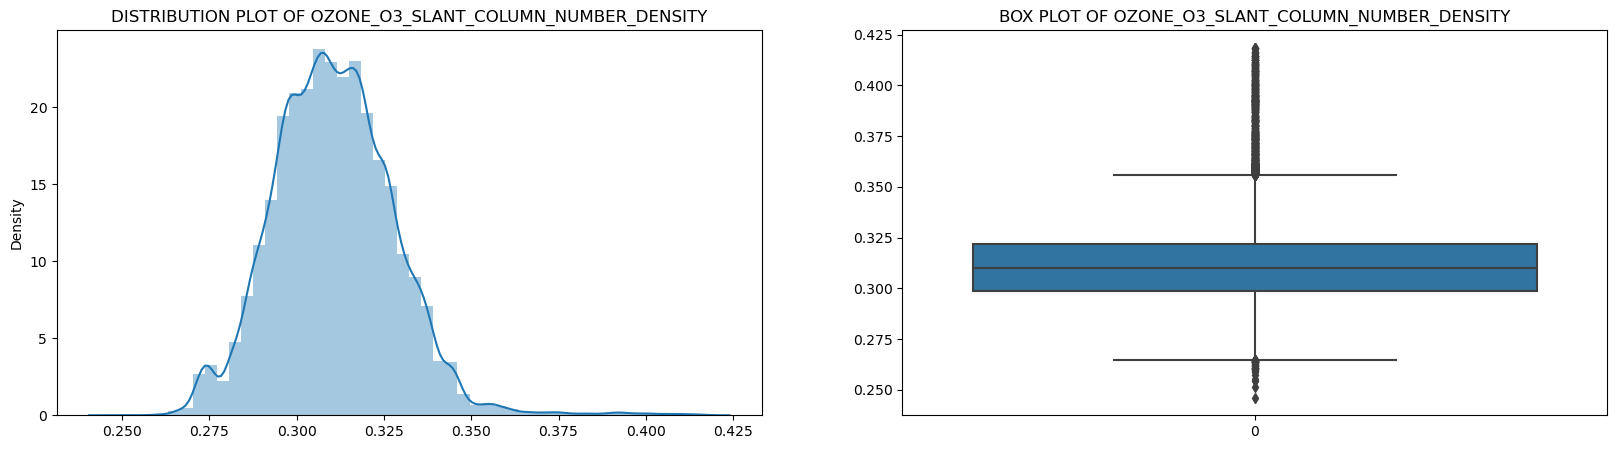

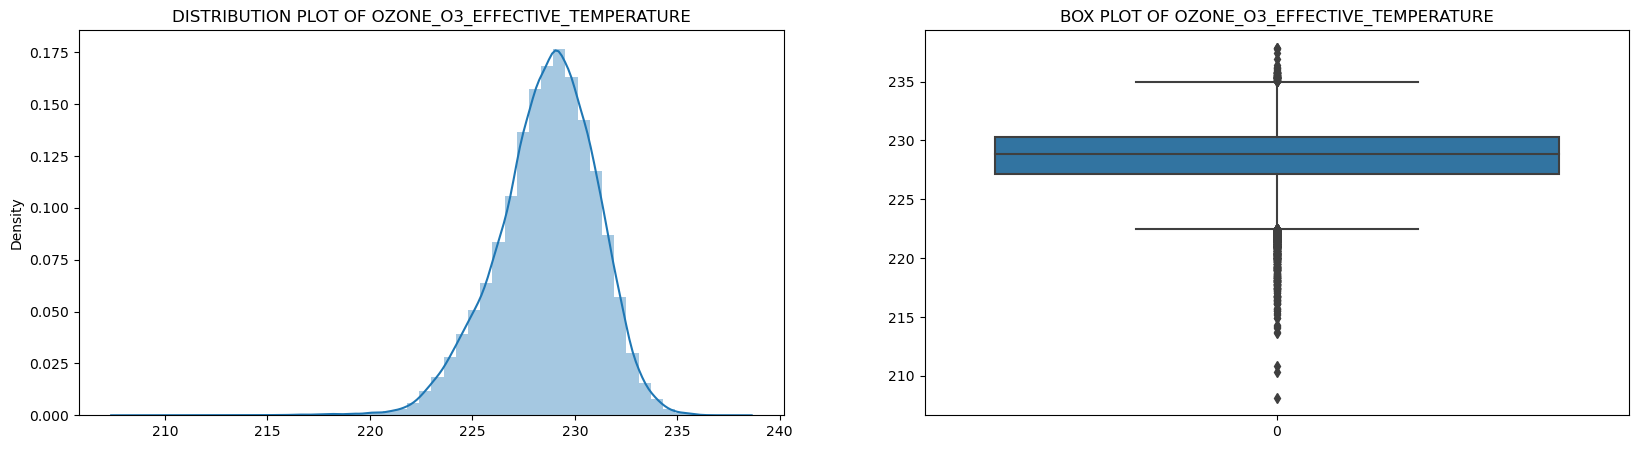

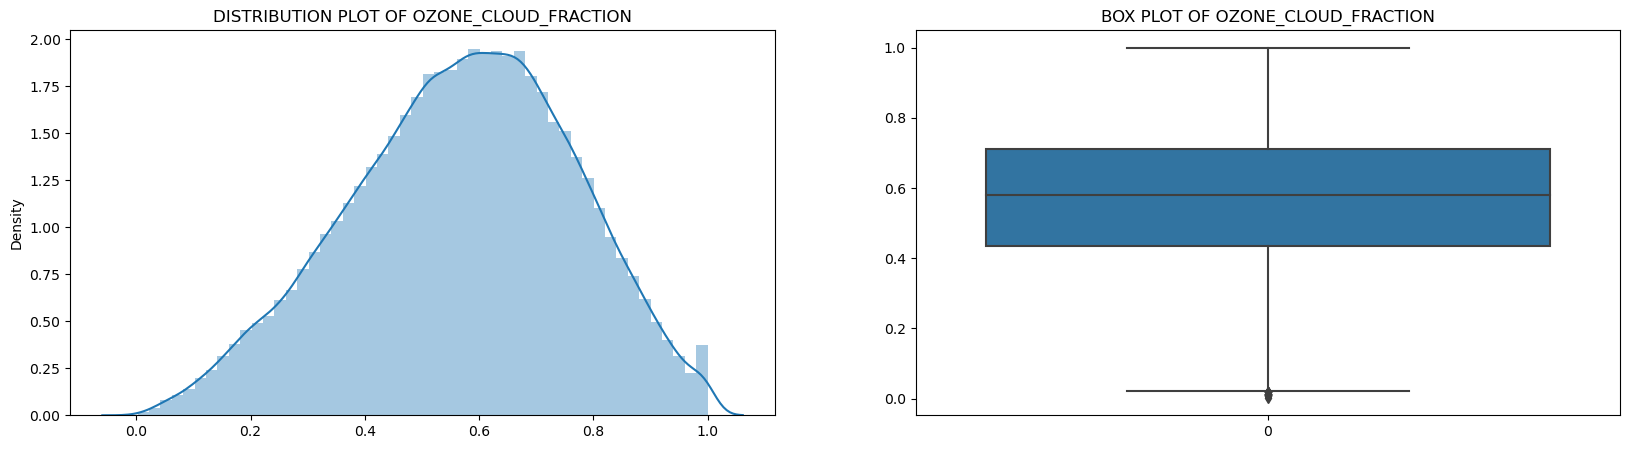

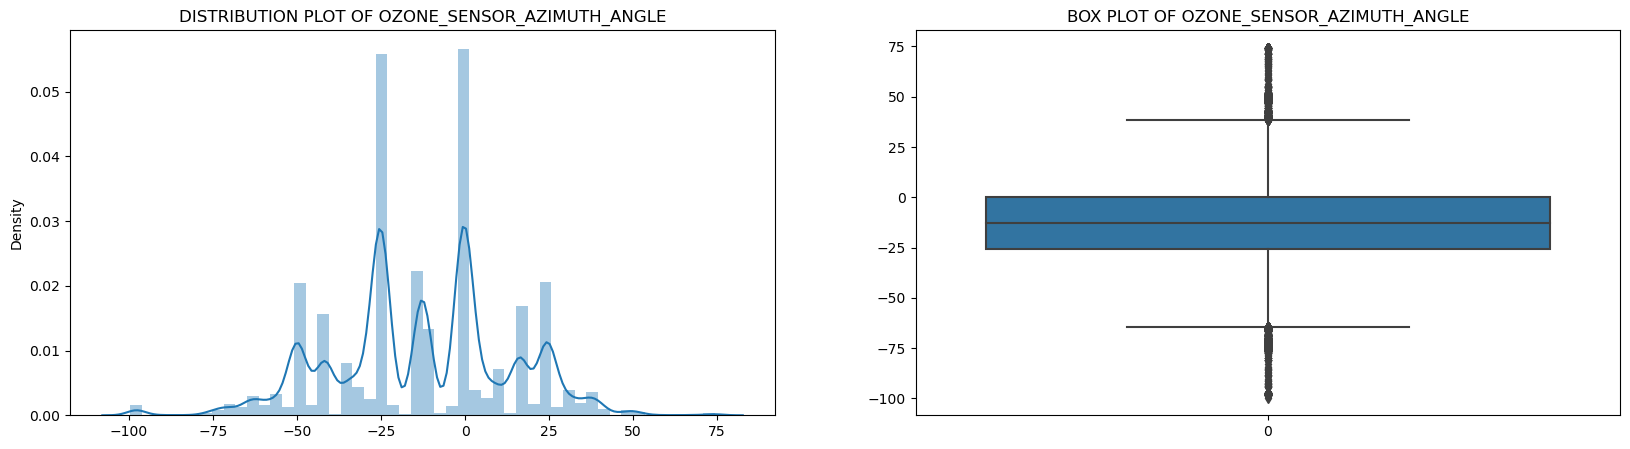

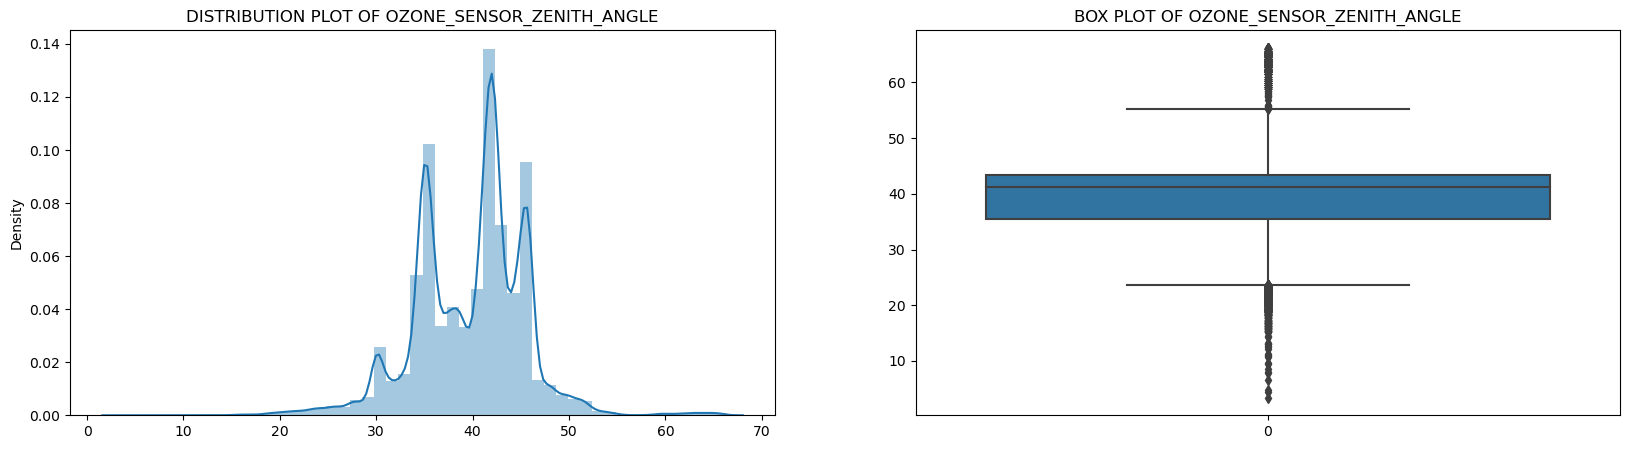

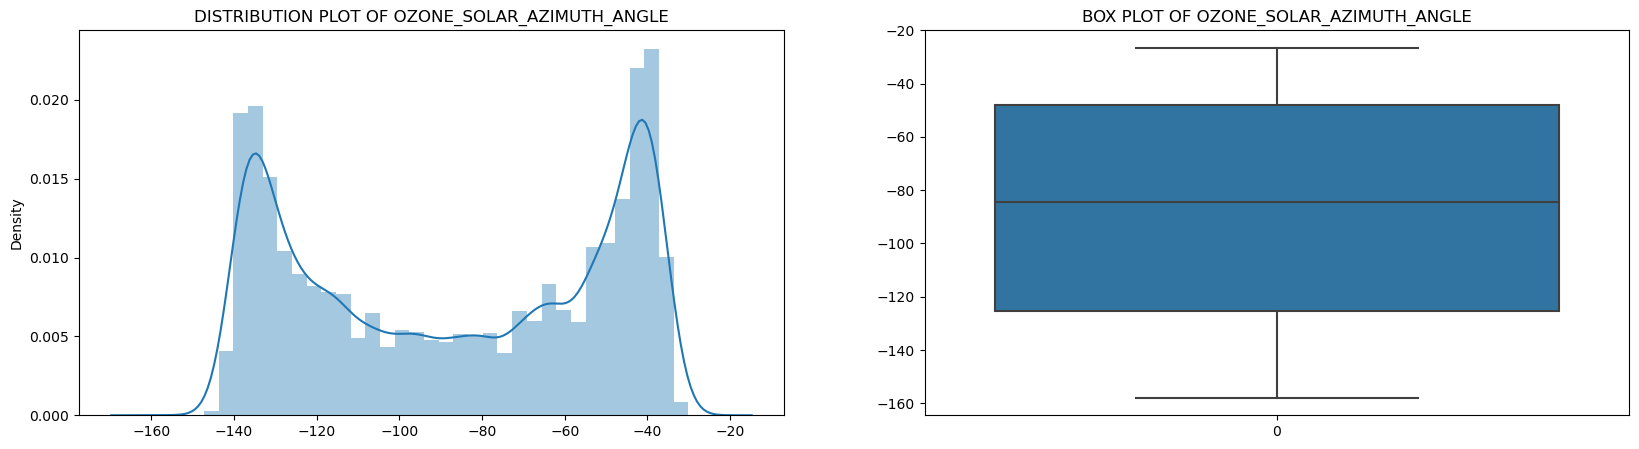

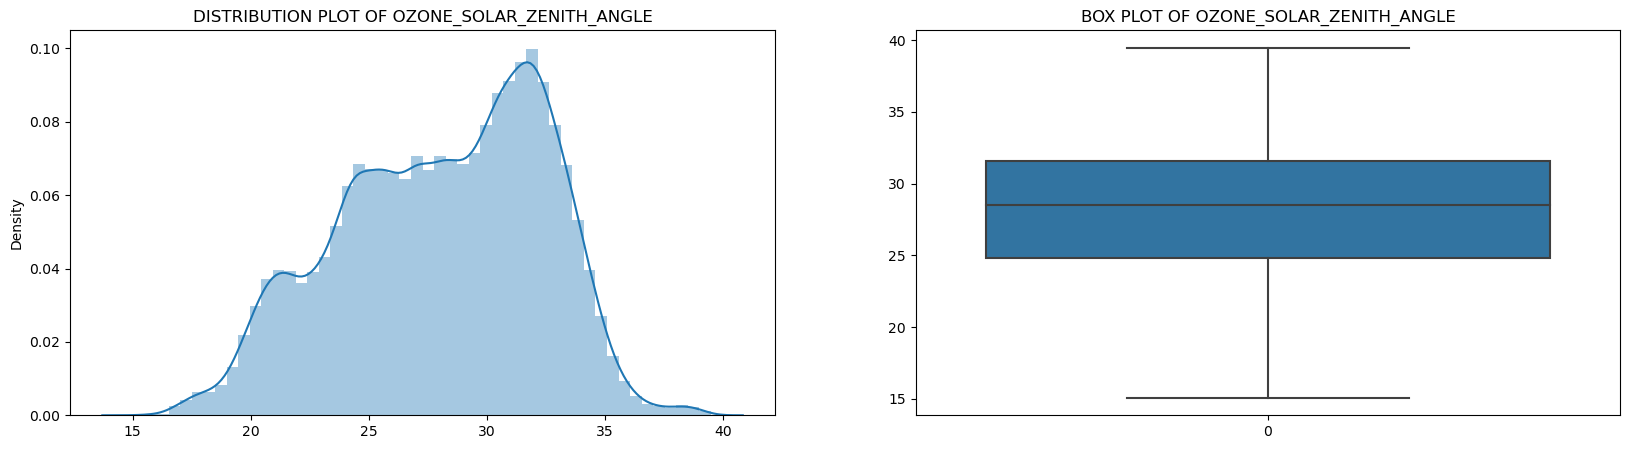

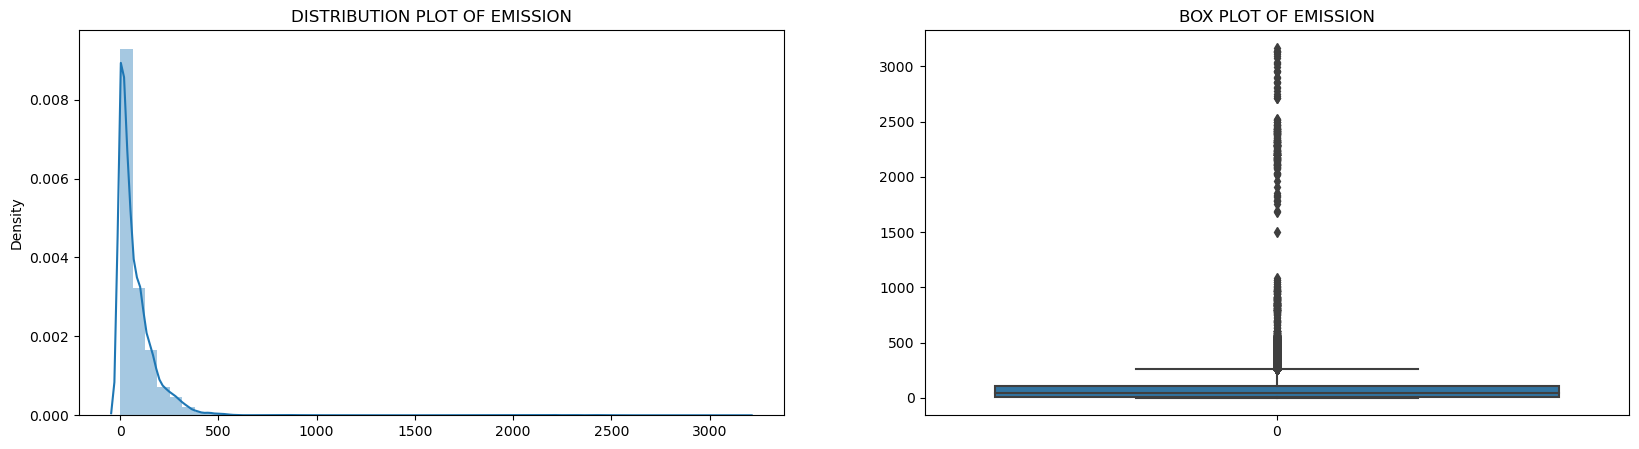

In [16]:
numerical = df.select_dtypes(include = [np.number])
for num in numerical.drop(columns = ['latitude','longitude','year','week_no']).columns:
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(f'DISTRIBUTION PLOT OF {num}'.upper())
    sns.distplot(x = df[num]);
    
    plt.subplot(1,2,2)
    plt.title(f'BOX plot of {num}'.upper())
    sns.boxplot(df[num])
    plt.show()

In [17]:
### imputation of missimg values
#since all our columns are higly skewed let us do imputaion using the median value of each column because
#medain is unaffected by outliers
numerical = df.select_dtypes(include=[np.number])
for num in numerical.drop(columns =['emission']).columns:
    median = df[num].median()
    df[num] = df[num].fillna(median)
    
    
    Median = test[num].median()
    test[num] = test[num].fillna(Median)

# LET US HANDLE THE OUTLIERS IN EACH COLUMNS

In [18]:
# let us deal with the outliers 
def cap_outlier (x, col_name, ll, ul):
    if x < ll:
        return ll
    elif x > ul:
        return ul
    else :
        return x
    return 0
for col_name in numerical.drop(columns=['emission']).columns:
    q1 = np.percentile(df[col_name], 25)
    q3 = np.percentile(df[col_name], 75)
    iqr = q3 - q1 
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    df[col_name] = df[col_name].apply(lambda x : cap_outlier(x, col_name, lower_limit, upper_limit))
    

In [19]:
### test data
# let us deal with the outliers 
#outlier_list = ['energy_median', 'energy_mean', 'energy_max', 'energy_count', 'energy_std', 'energy_sum', 'energy_min']
def cap_outlier (x, col_name, ll, ul):
    if x < ll:
        return ll
    elif x > ul:
        return ul
    else :
        return x
    return 0
for col_name in numerical.drop(columns=['emission']).columns:
    q1 = np.percentile(test[col_name], 25)
    q3 = np.percentile(test[col_name], 75)
    iqr = q3 - q1 
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    test[col_name] = test[col_name].apply(lambda x : cap_outlier(x, col_name, lower_limit, upper_limit))
    

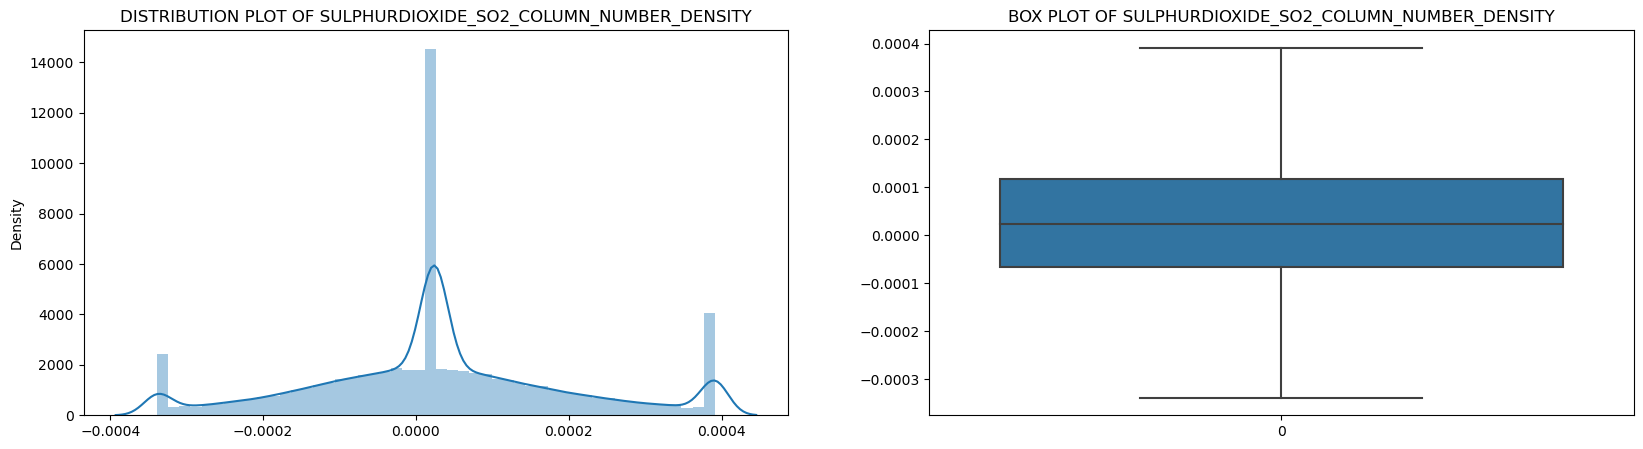

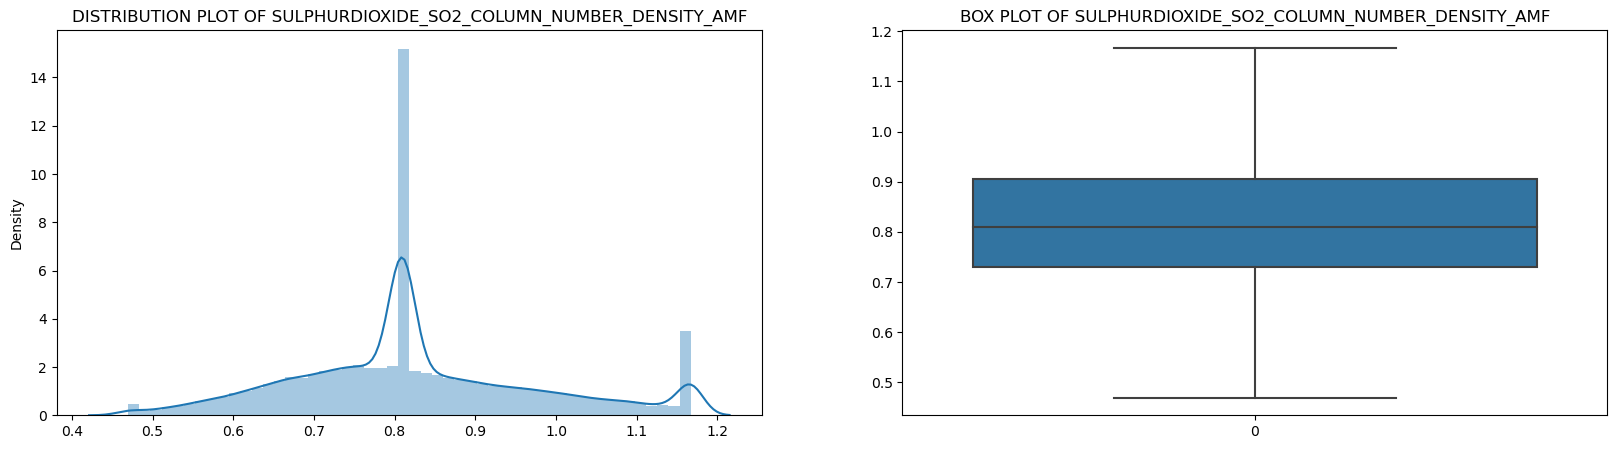

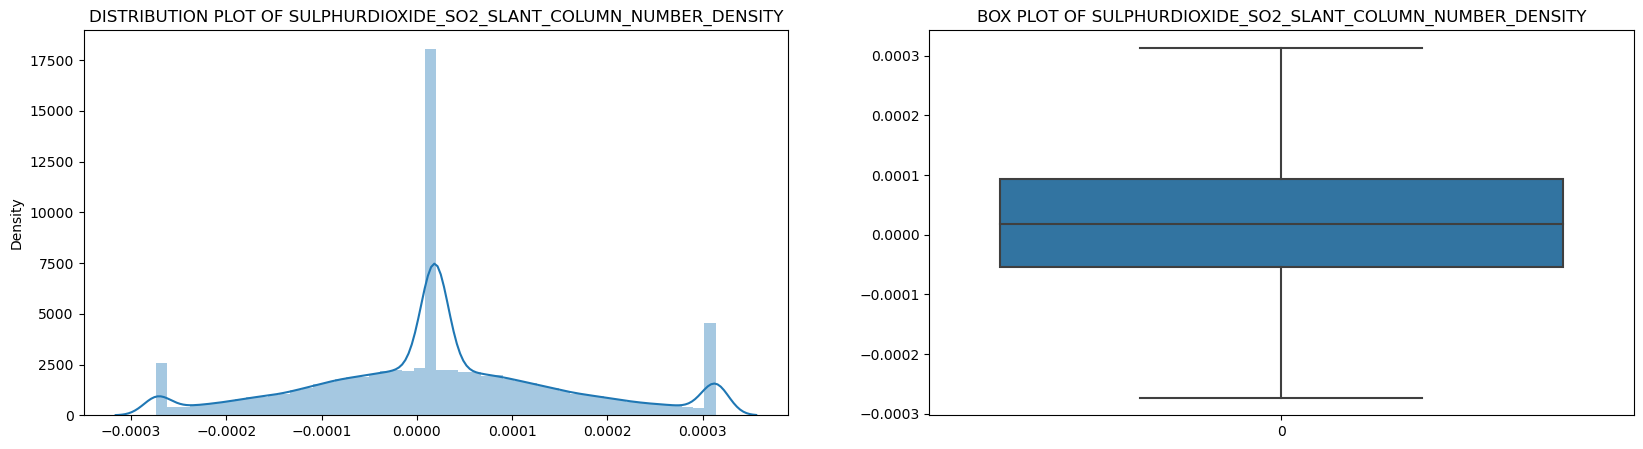

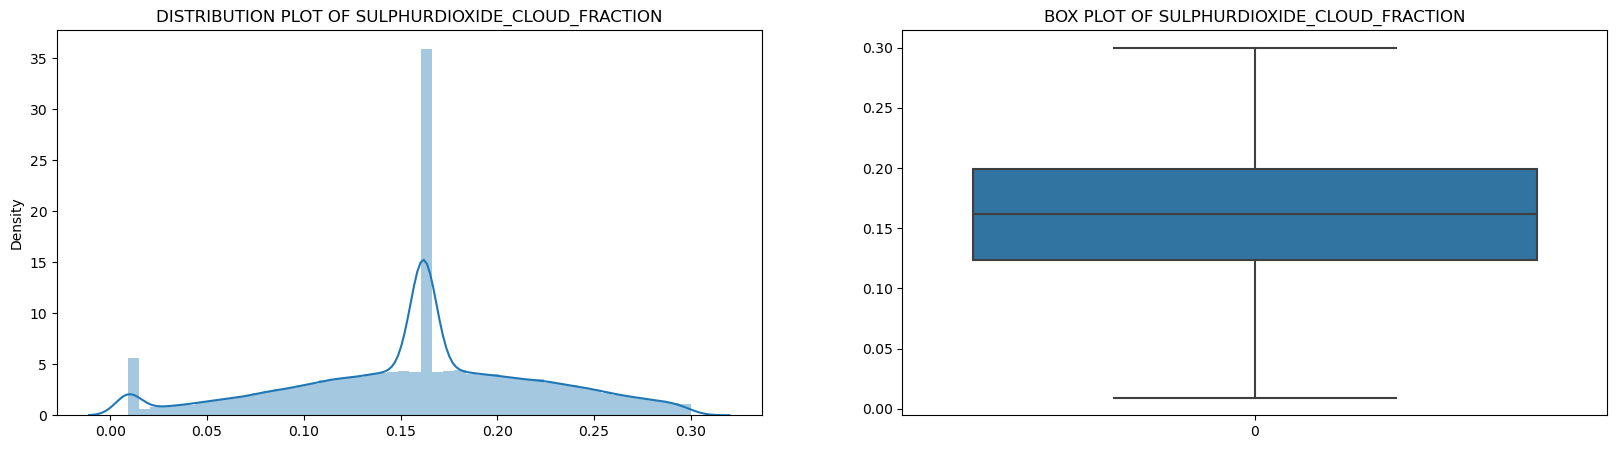

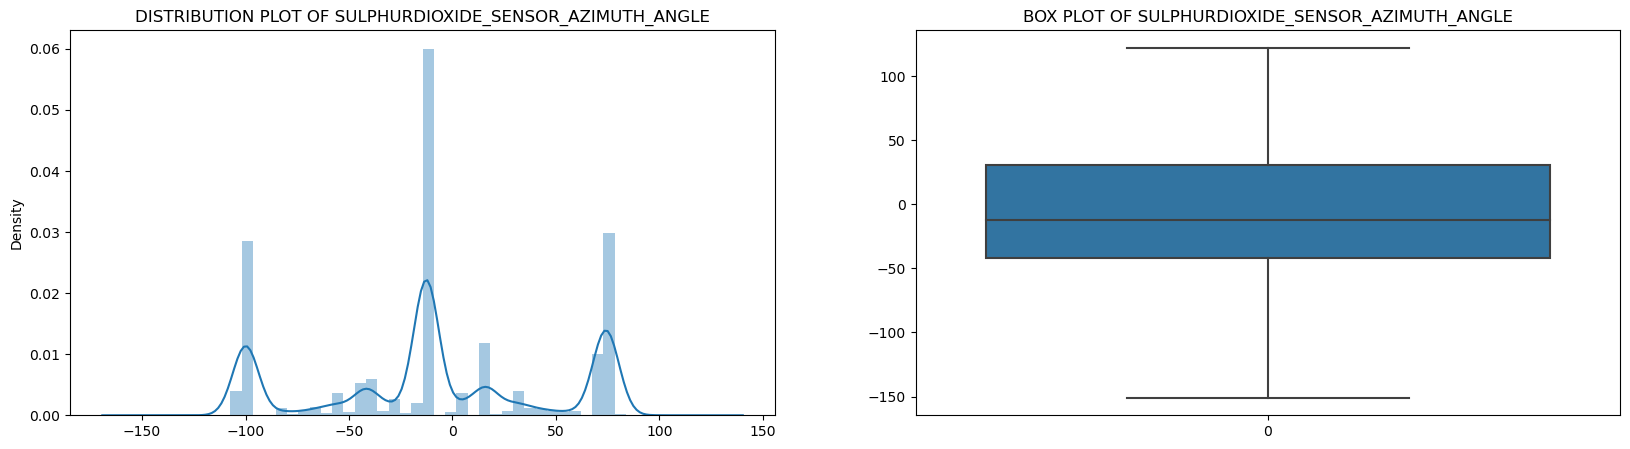

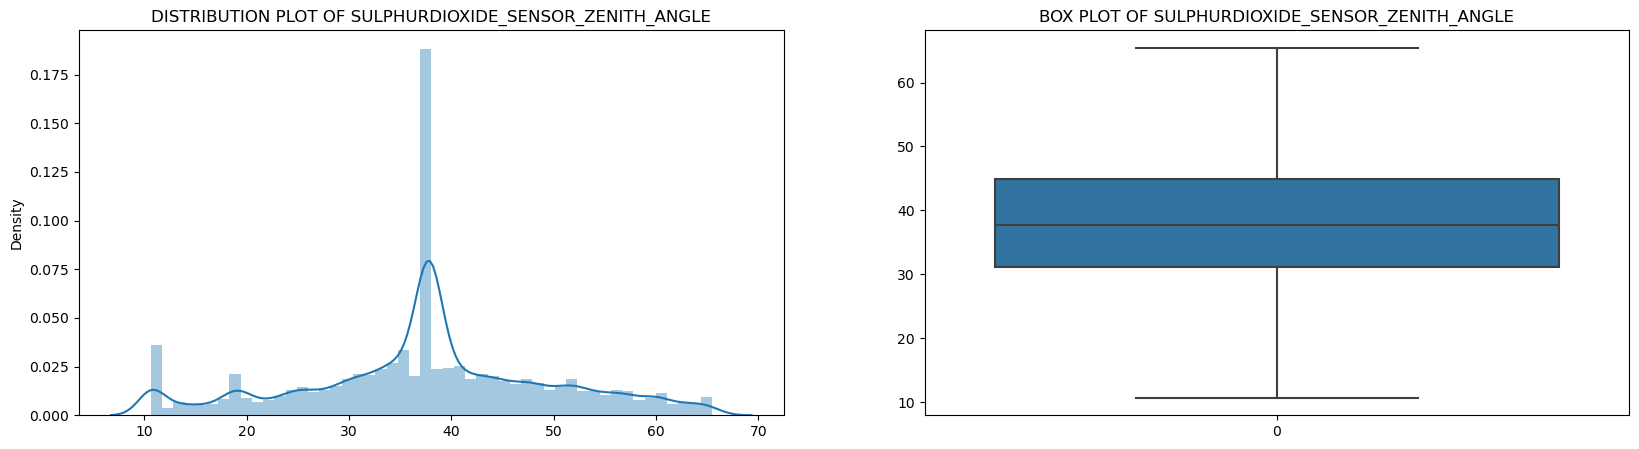

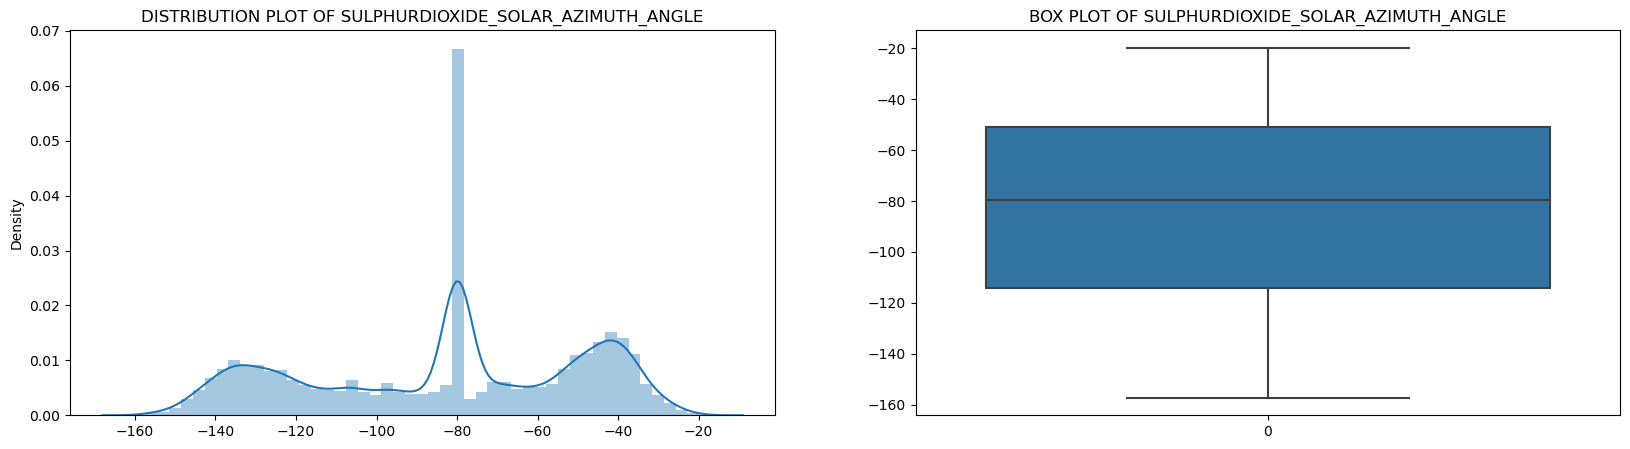

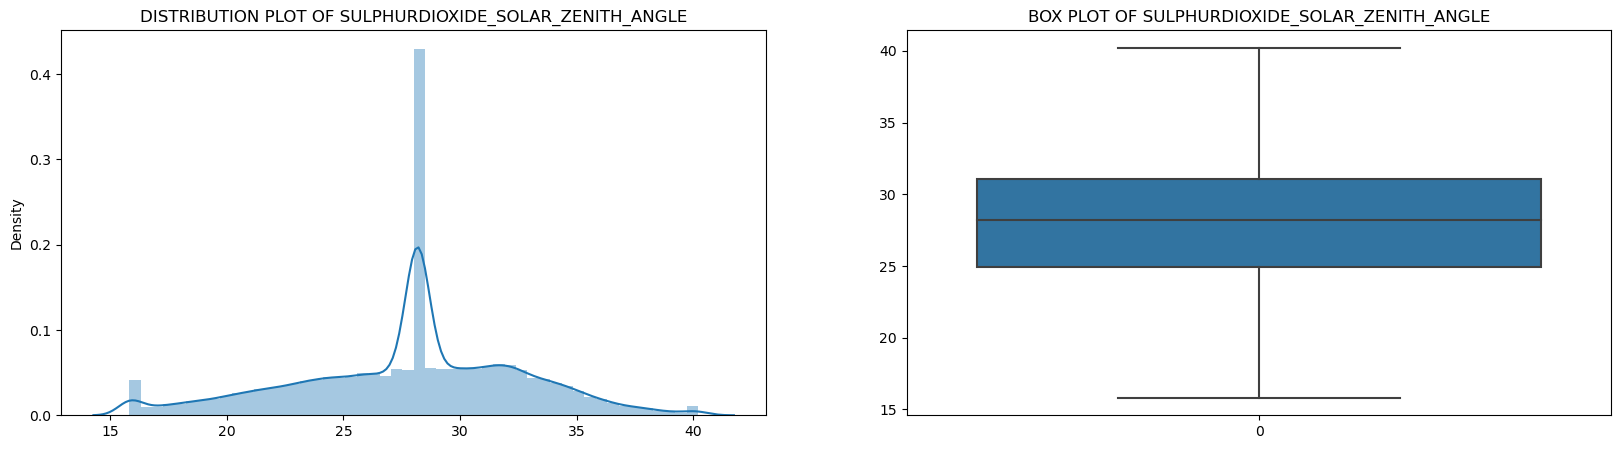

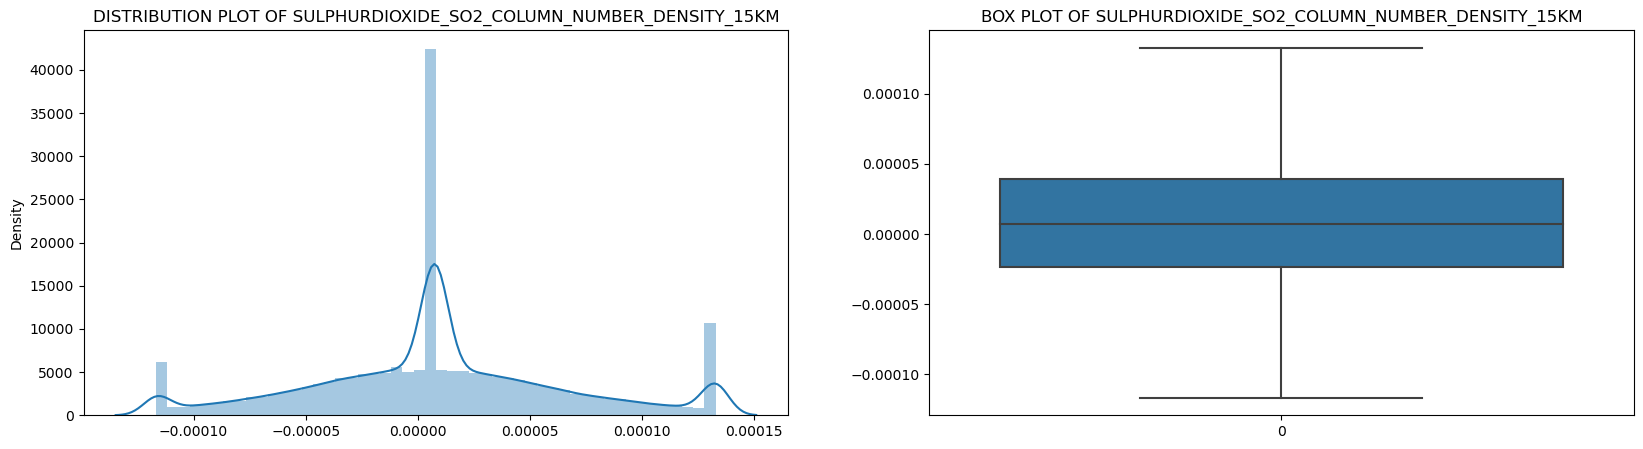

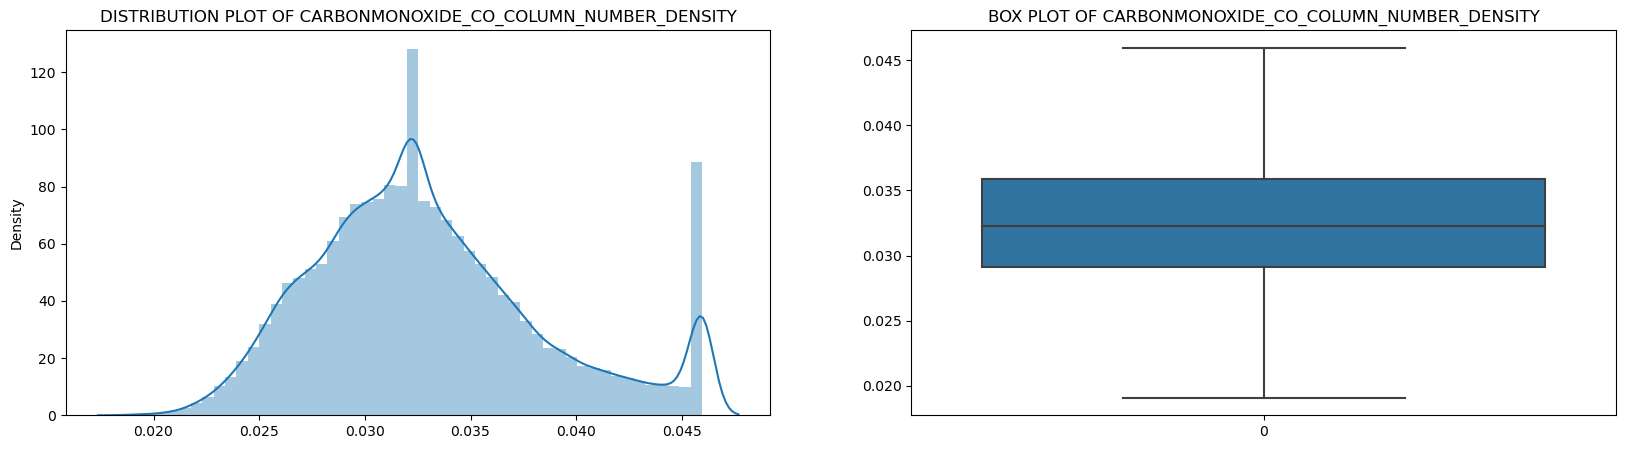

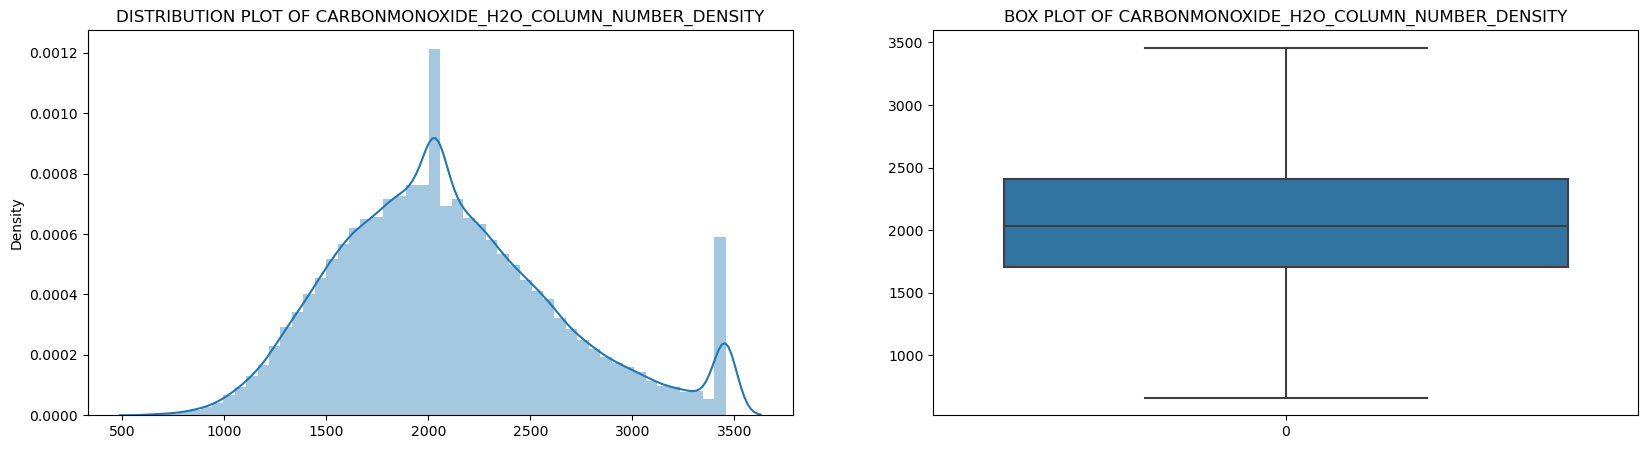

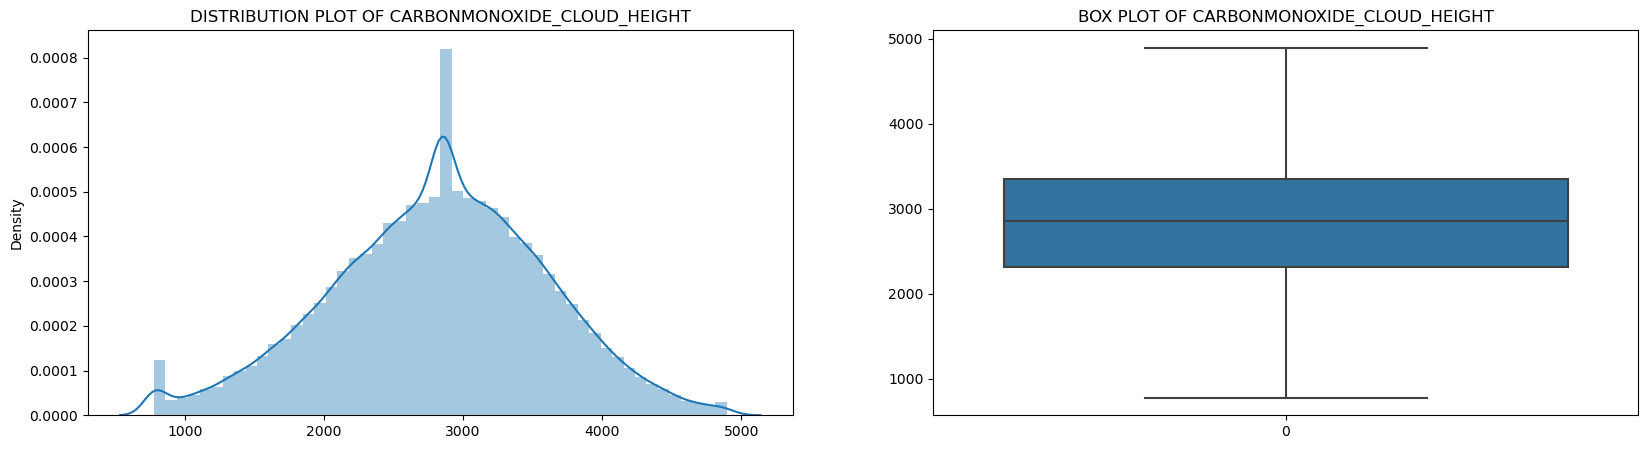

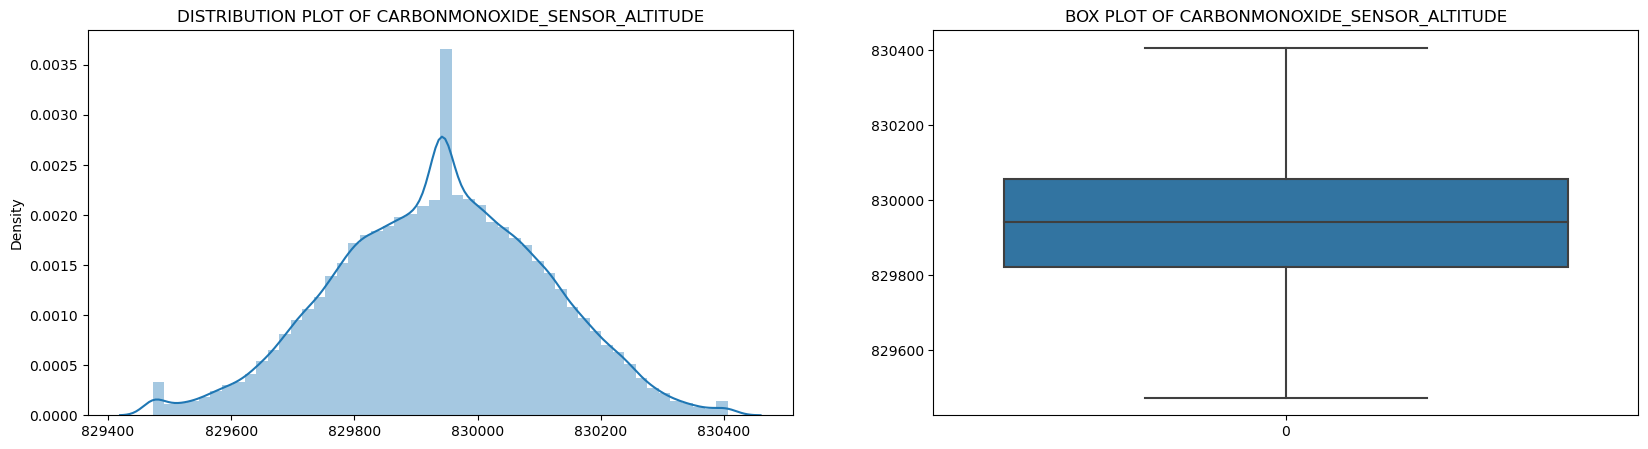

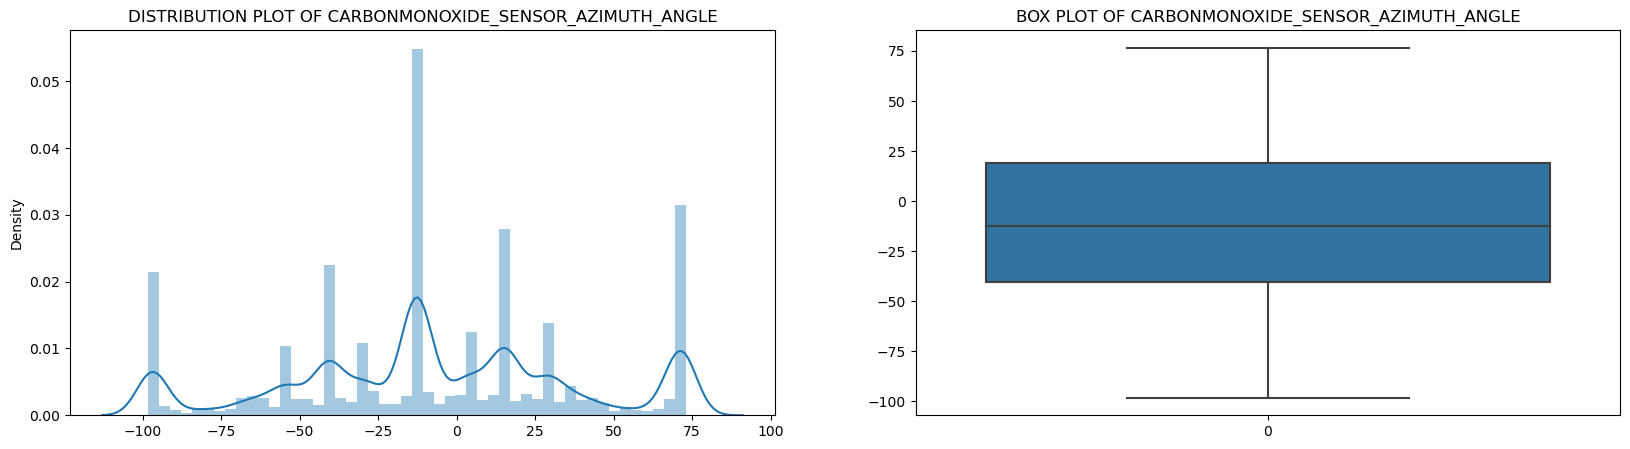

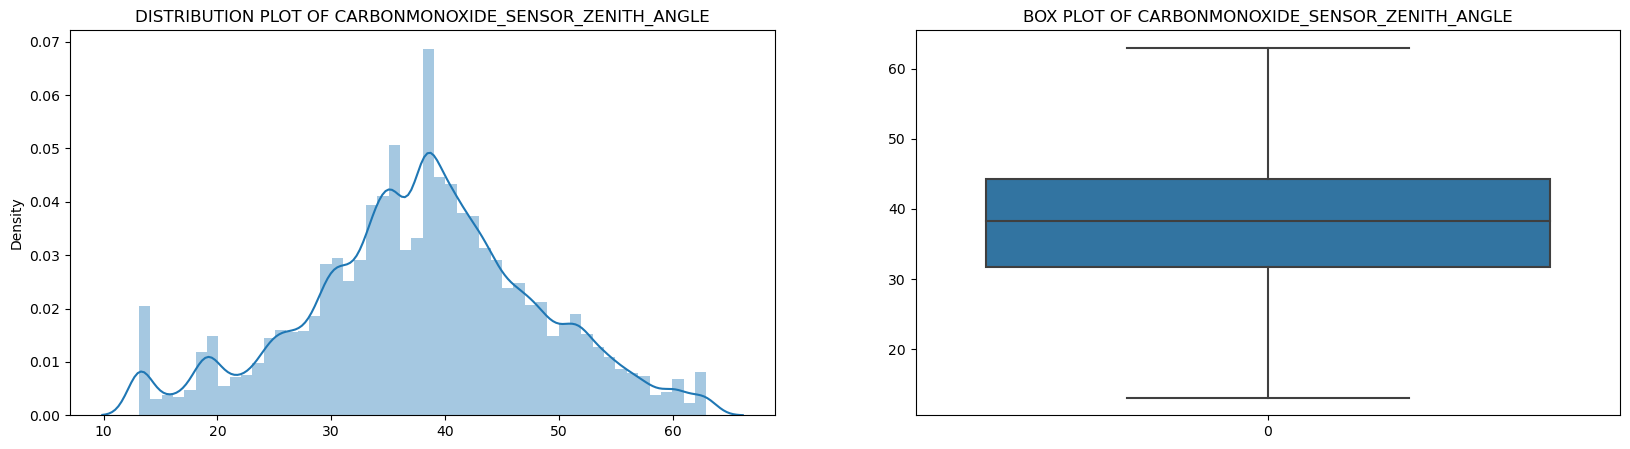

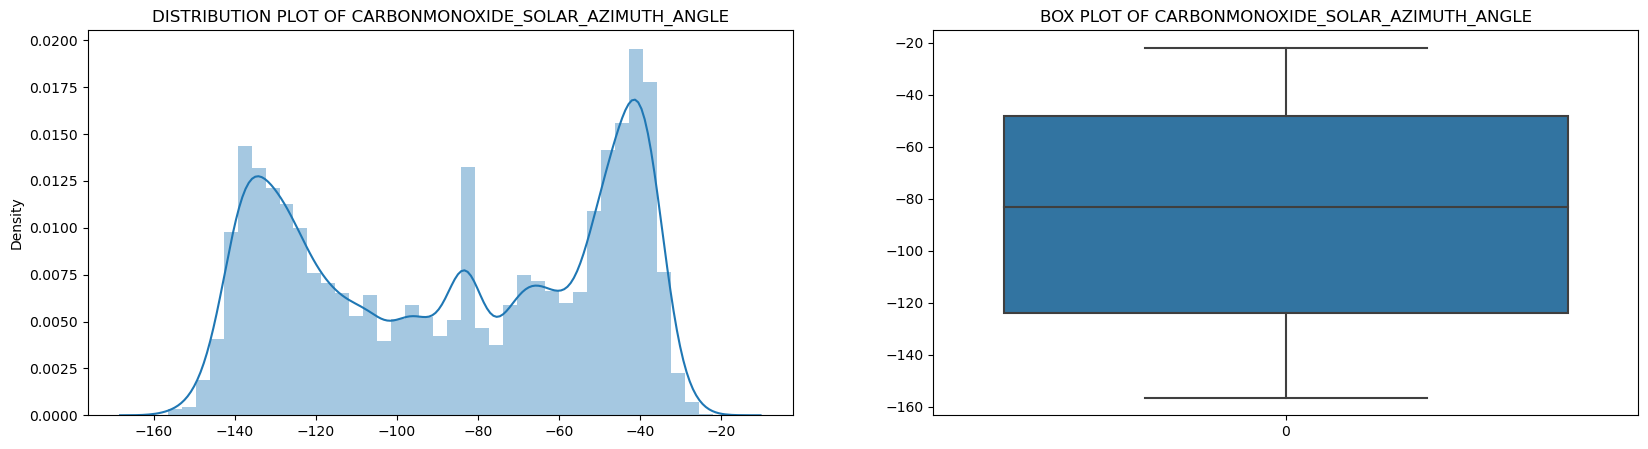

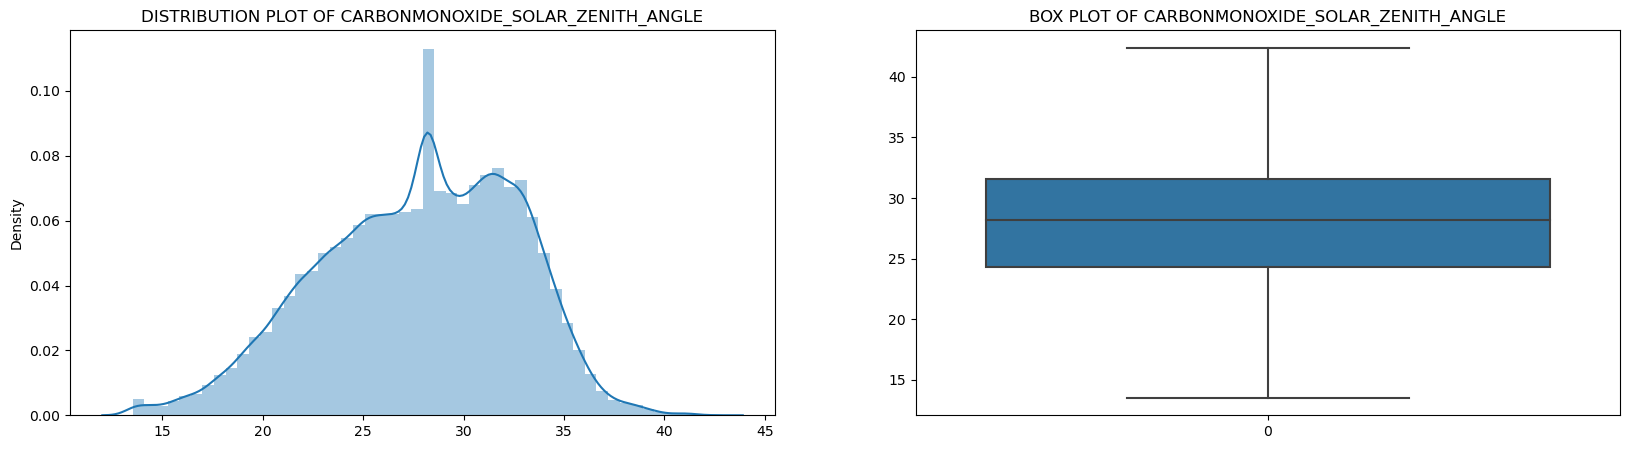

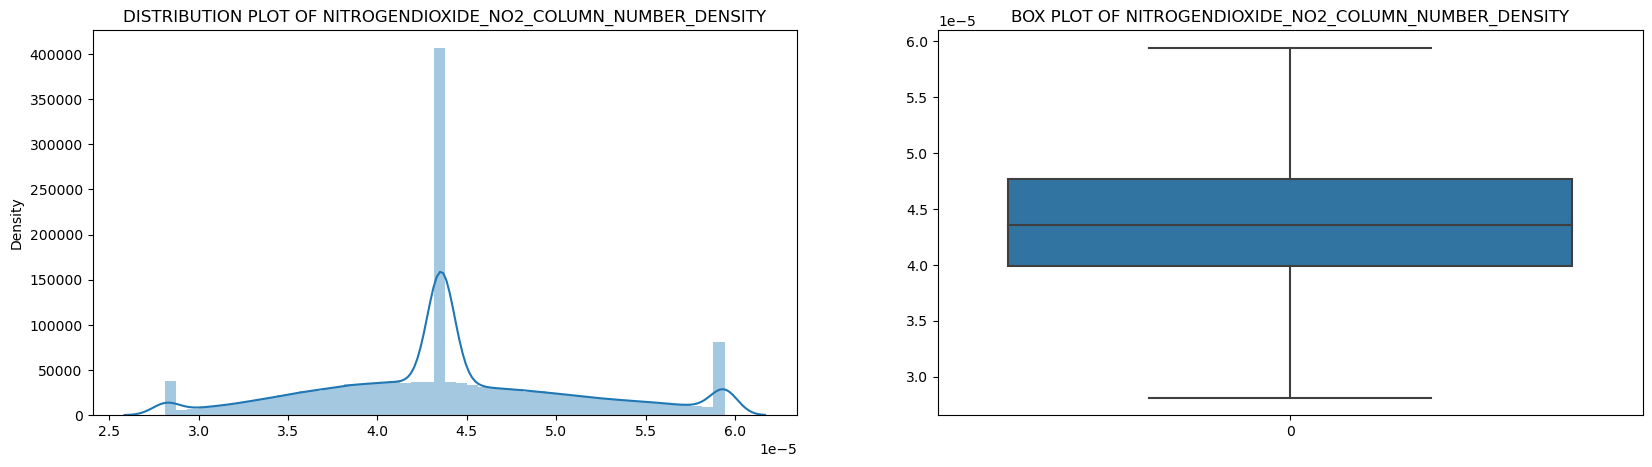

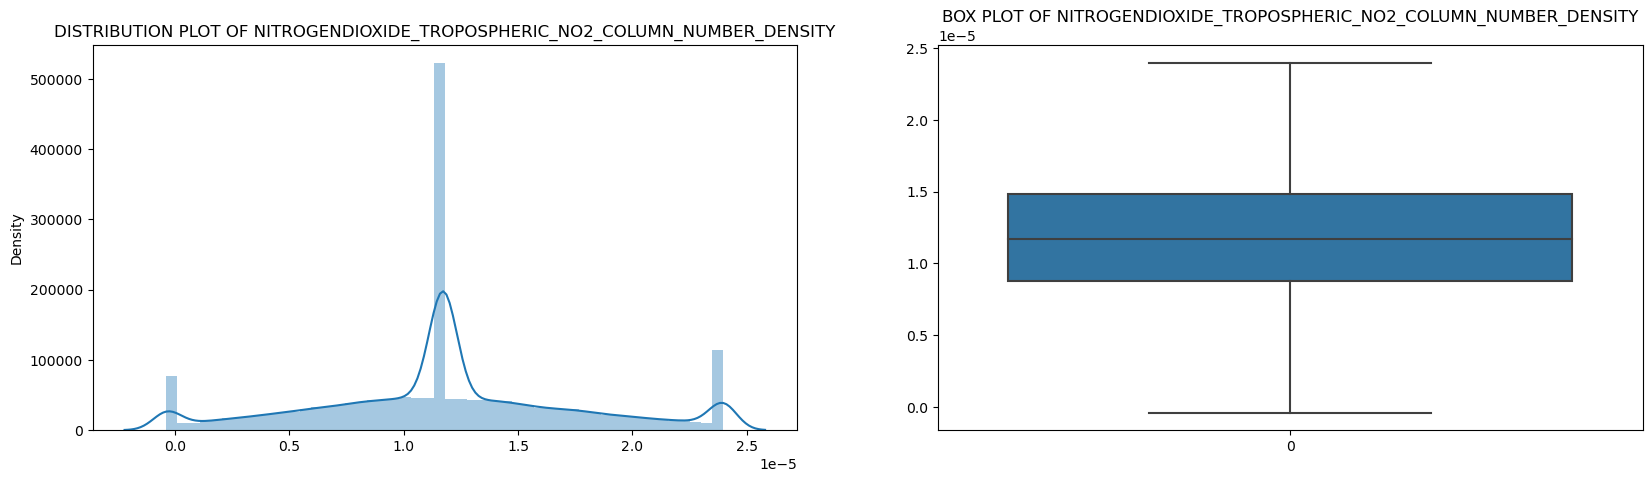

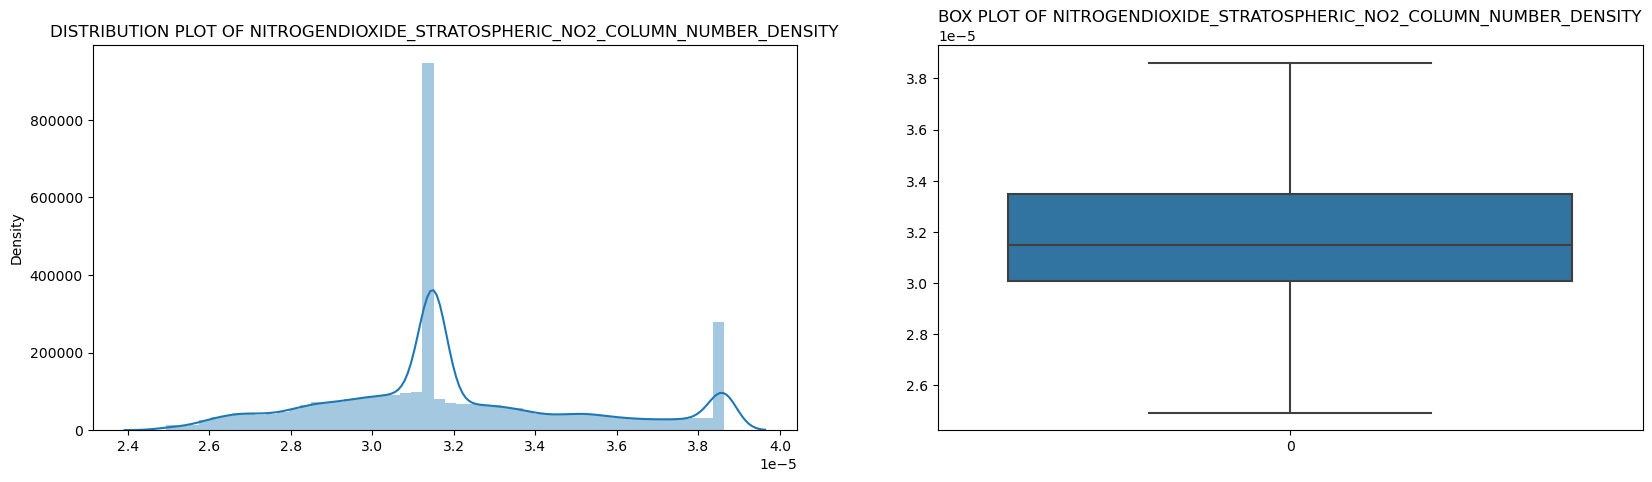

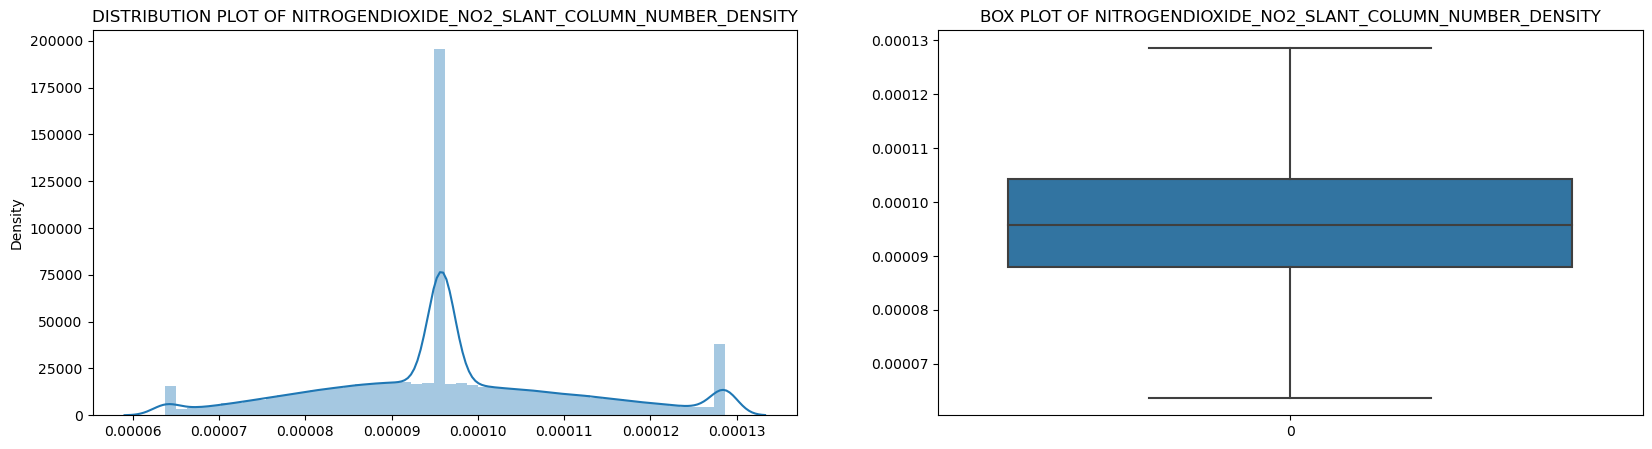

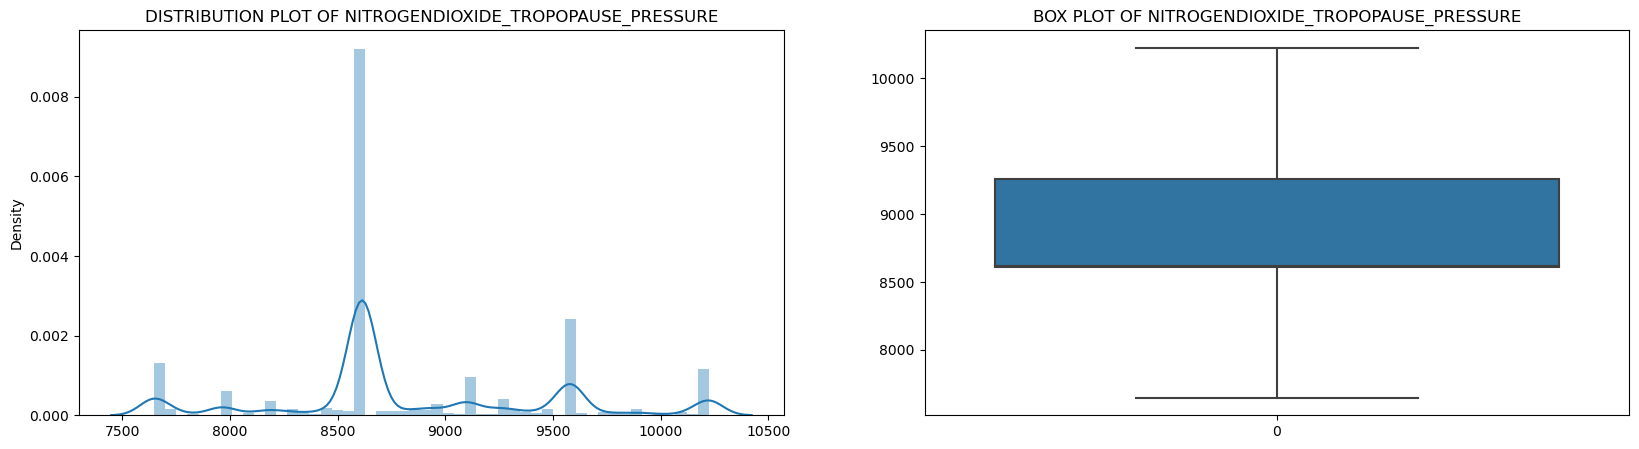

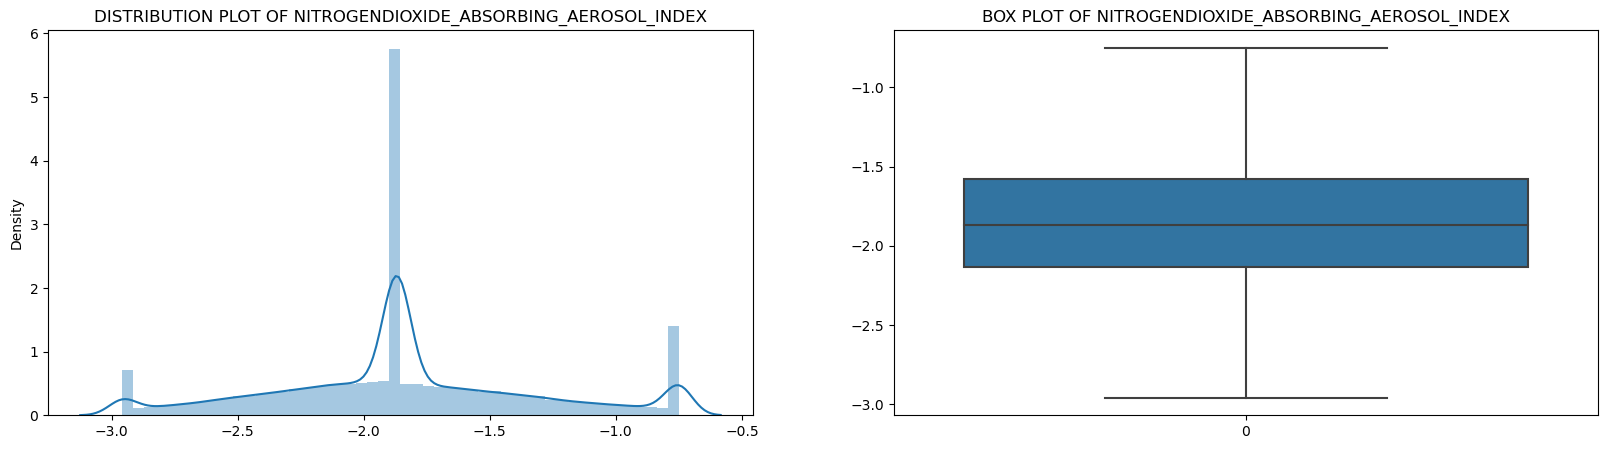

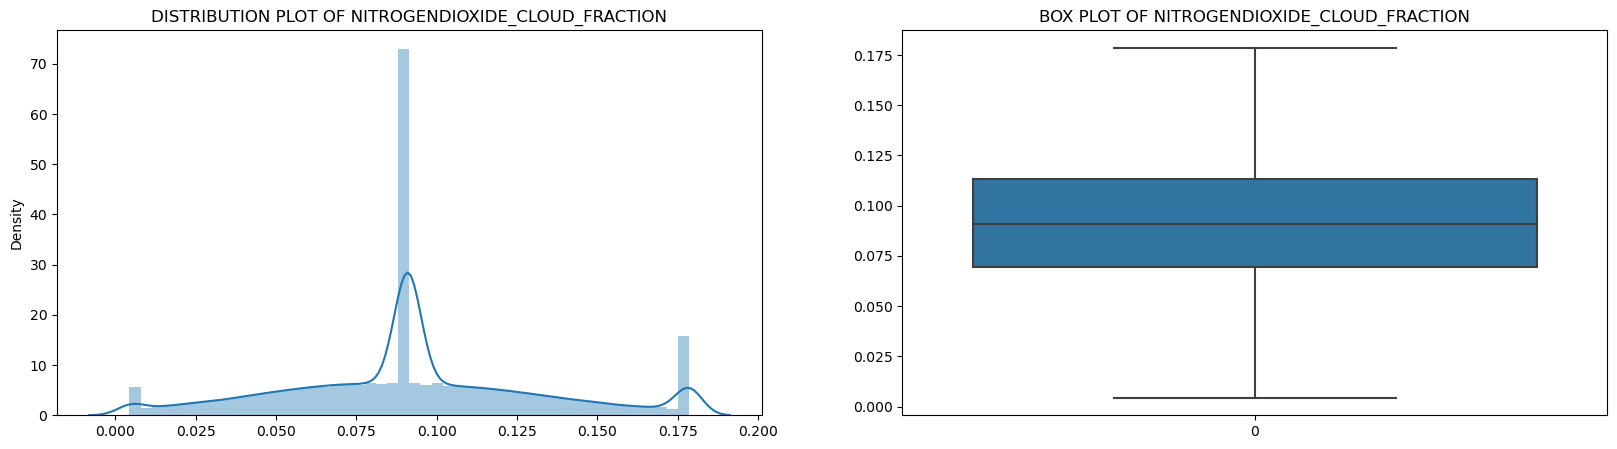

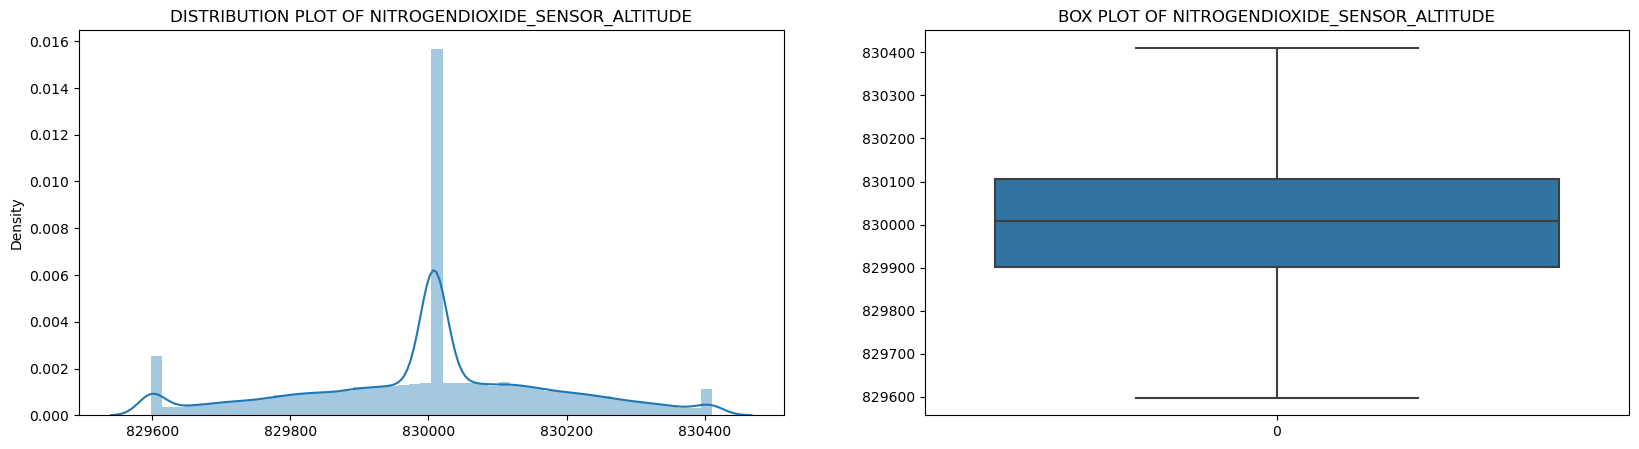

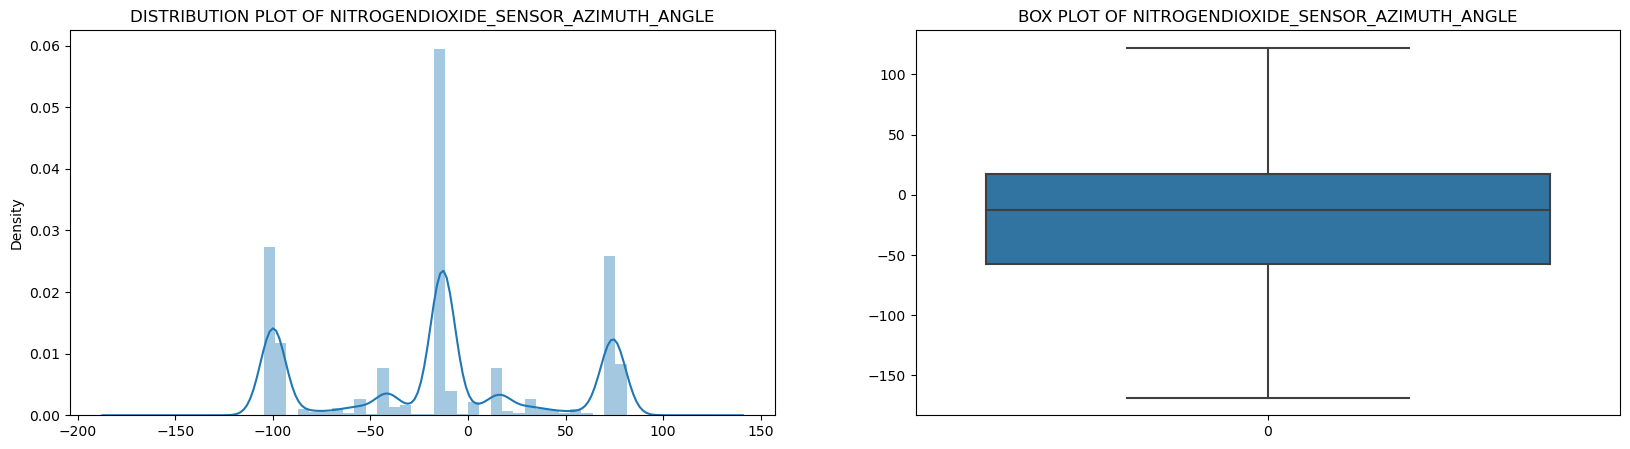

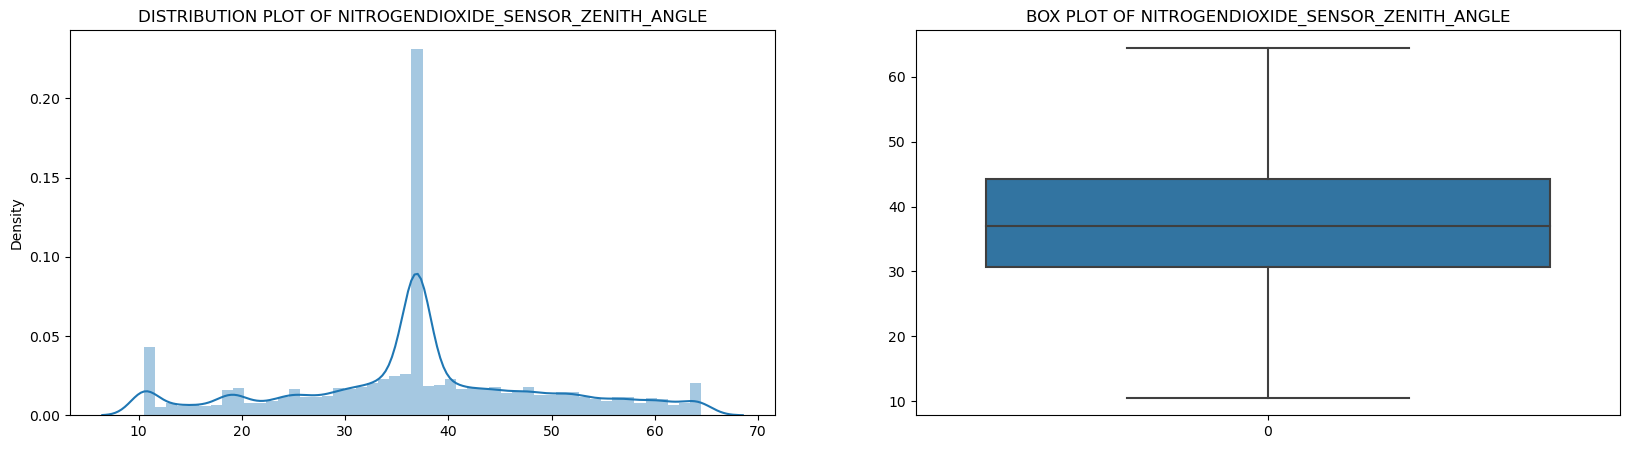

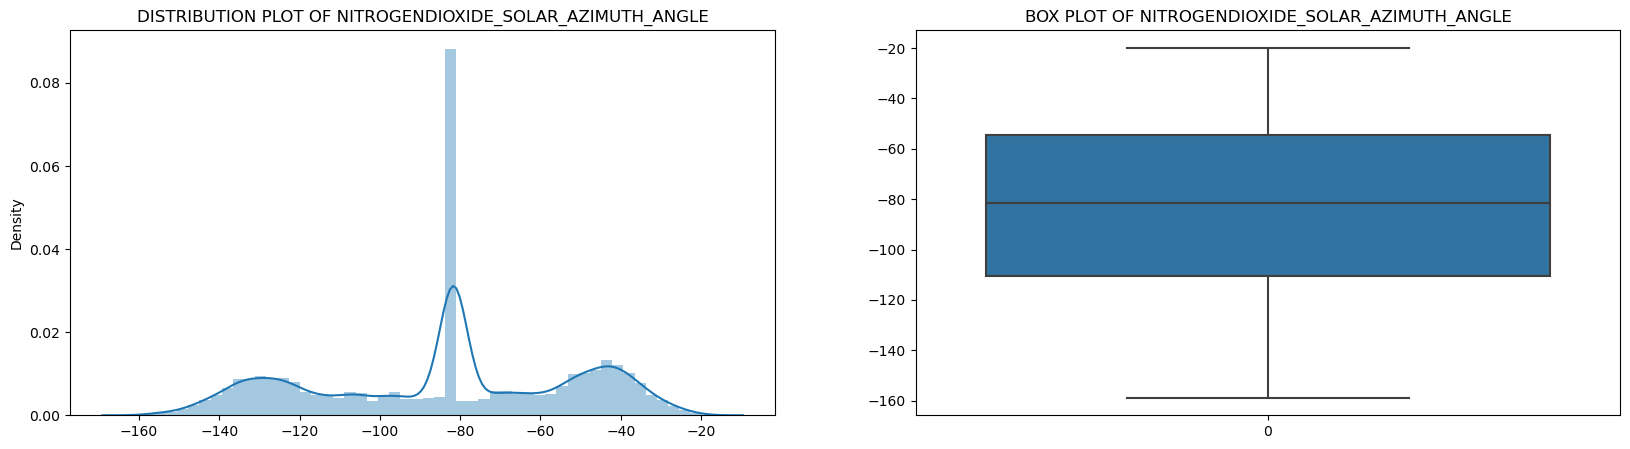

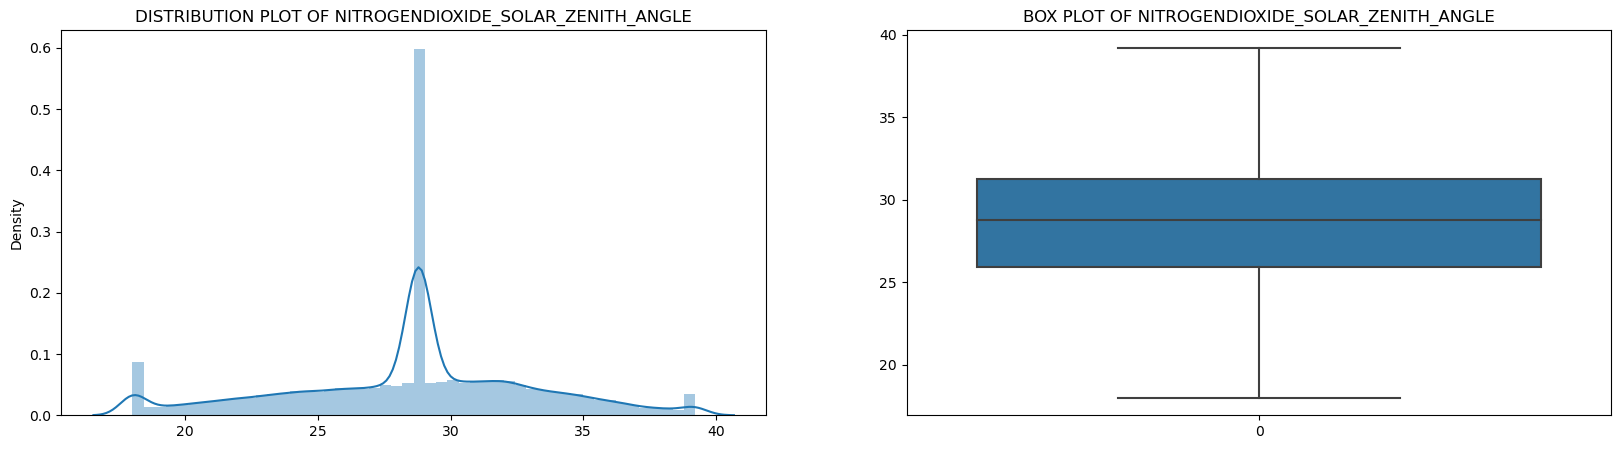

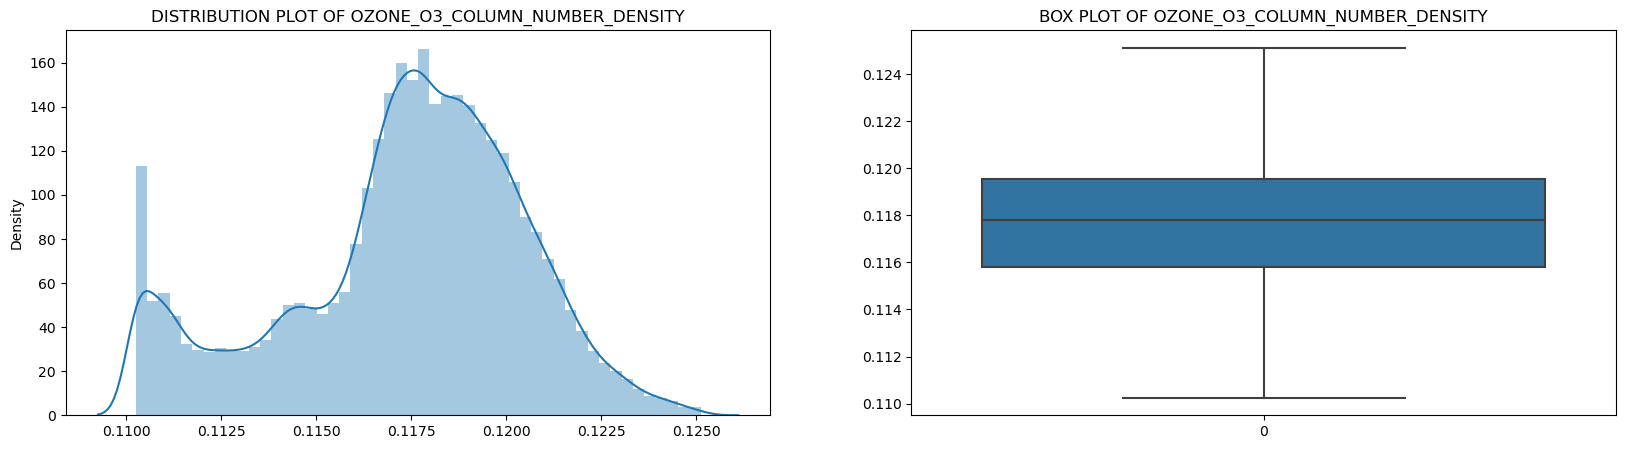

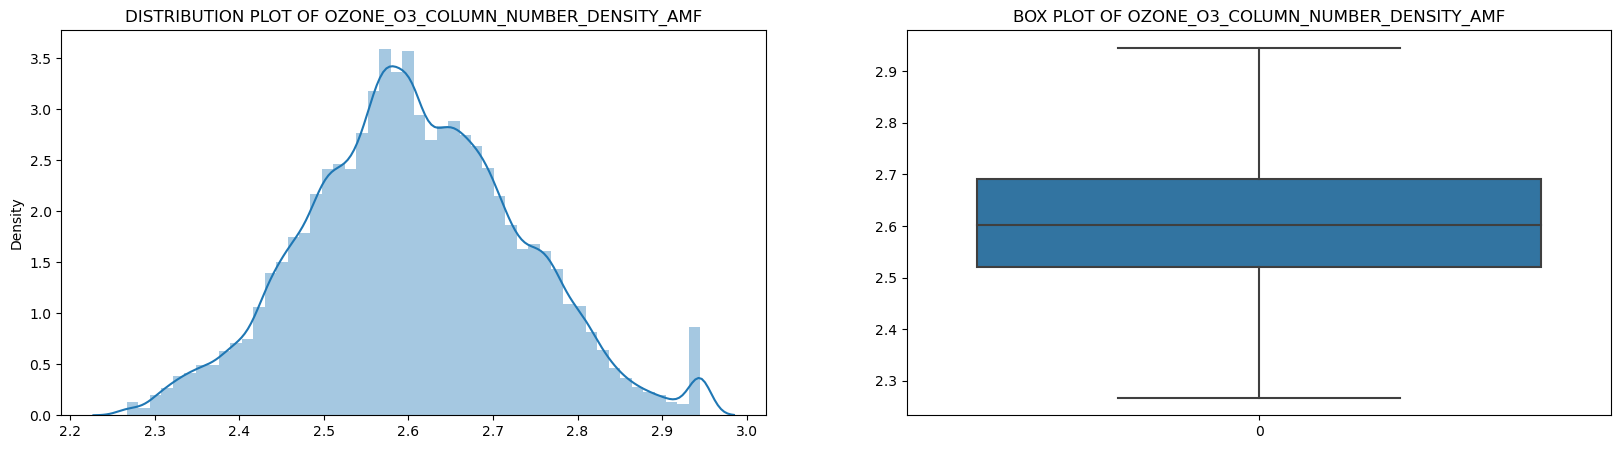

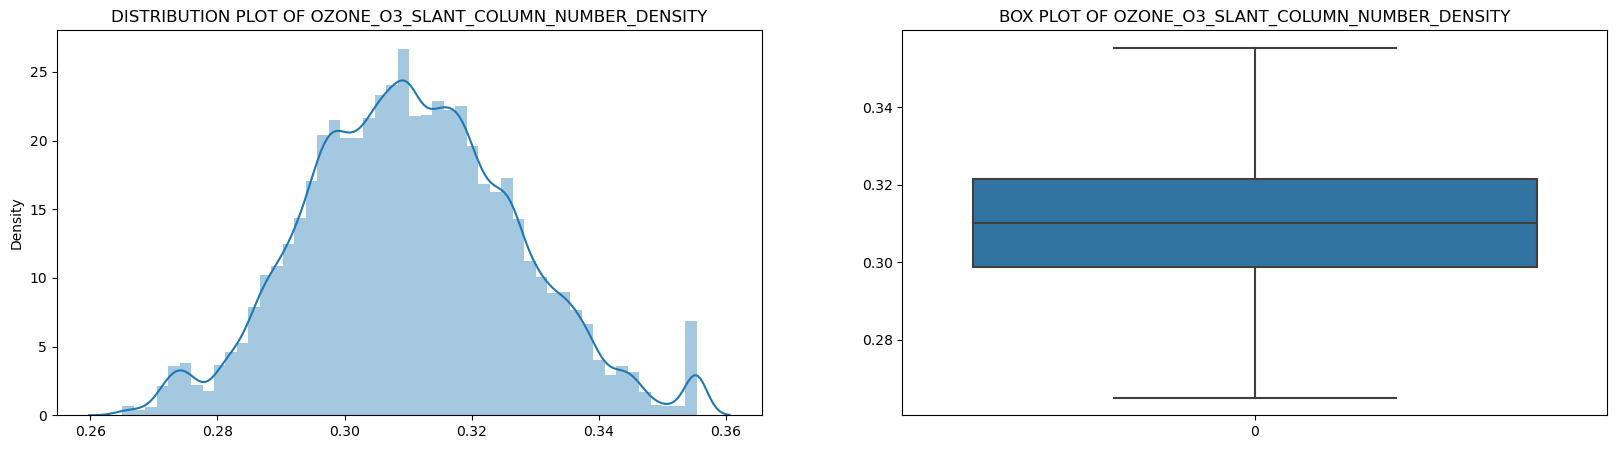

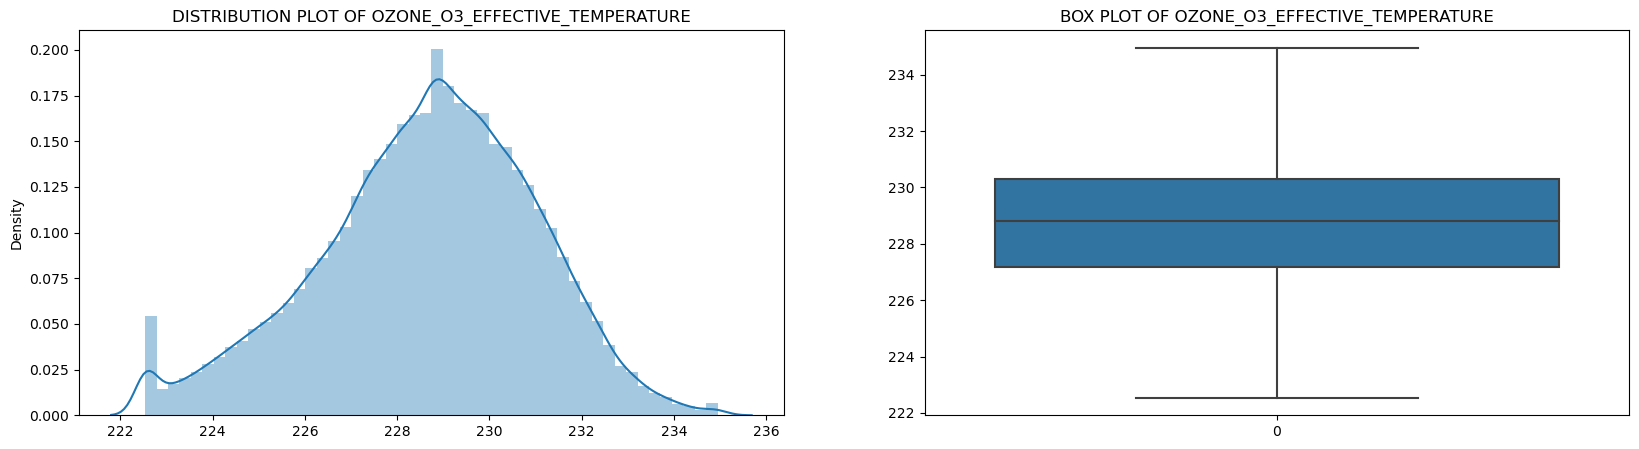

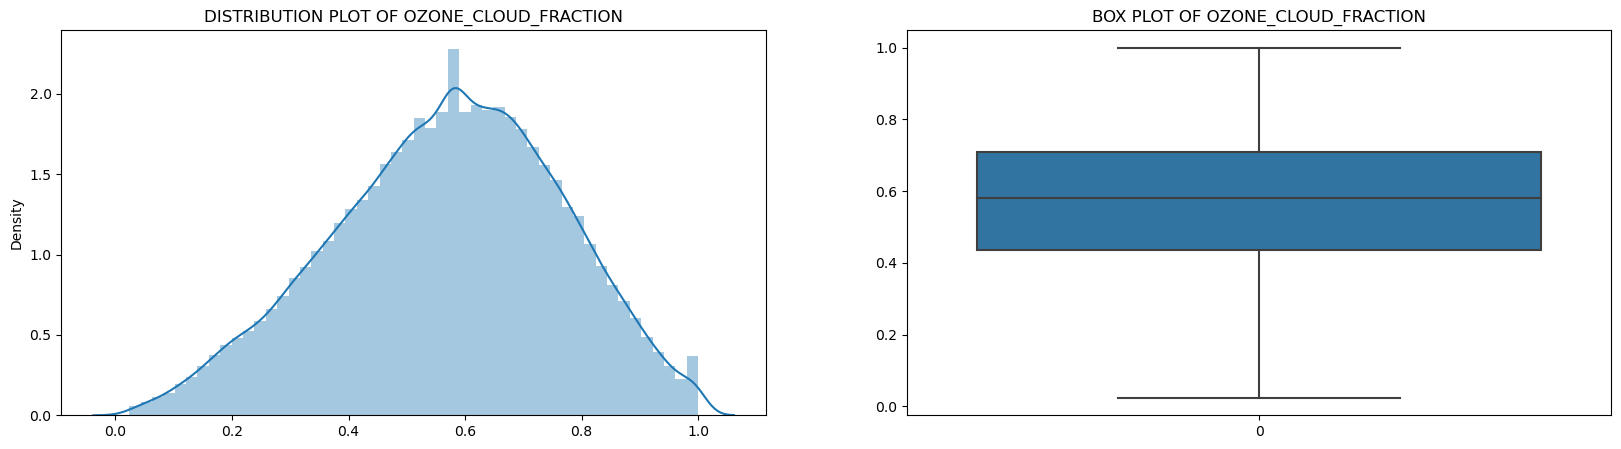

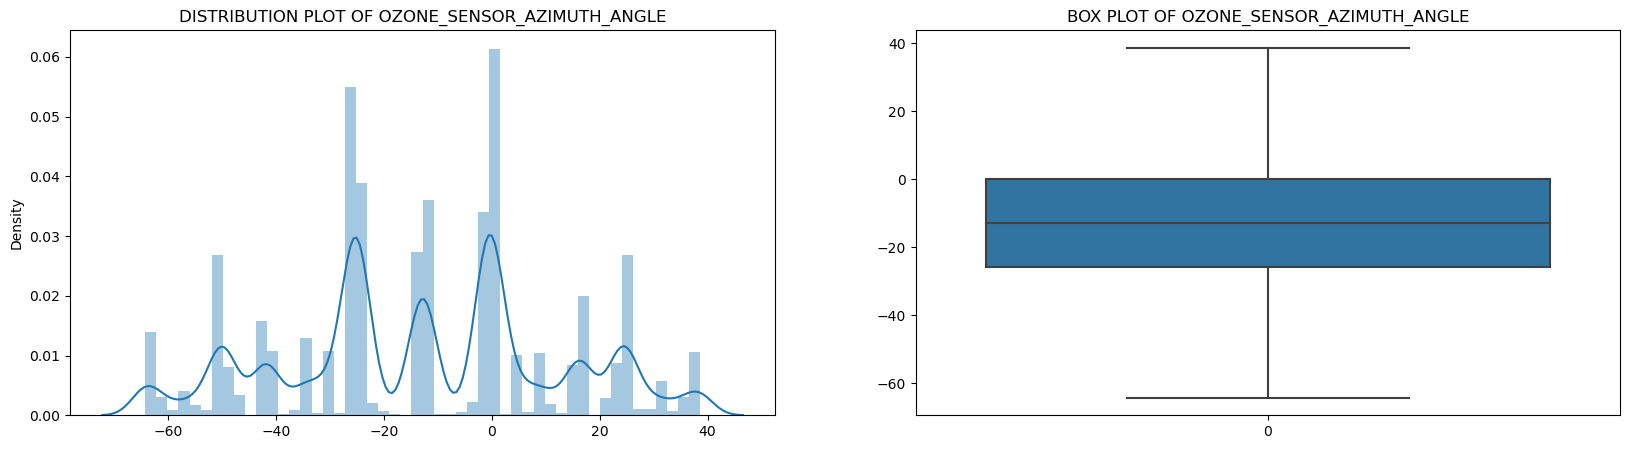

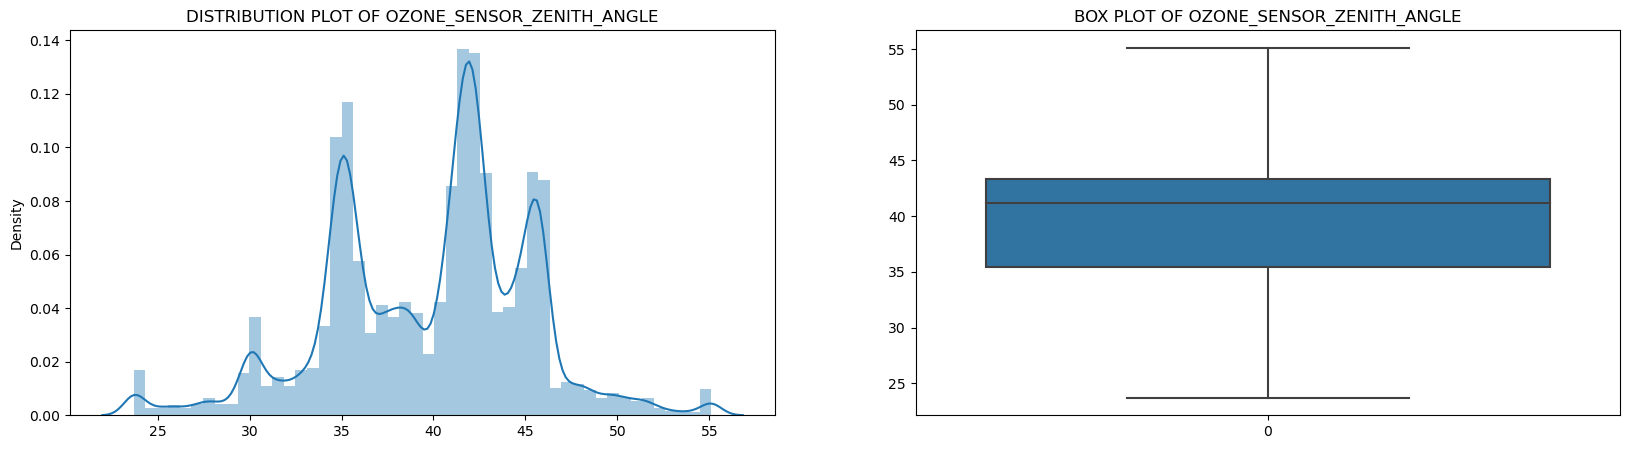

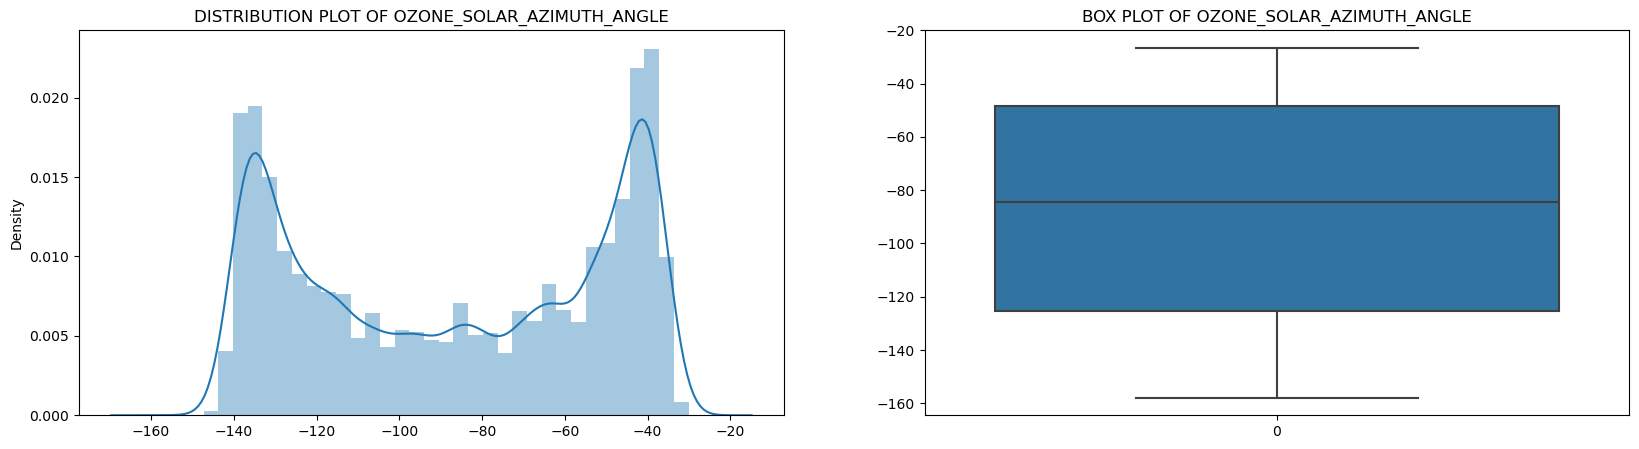

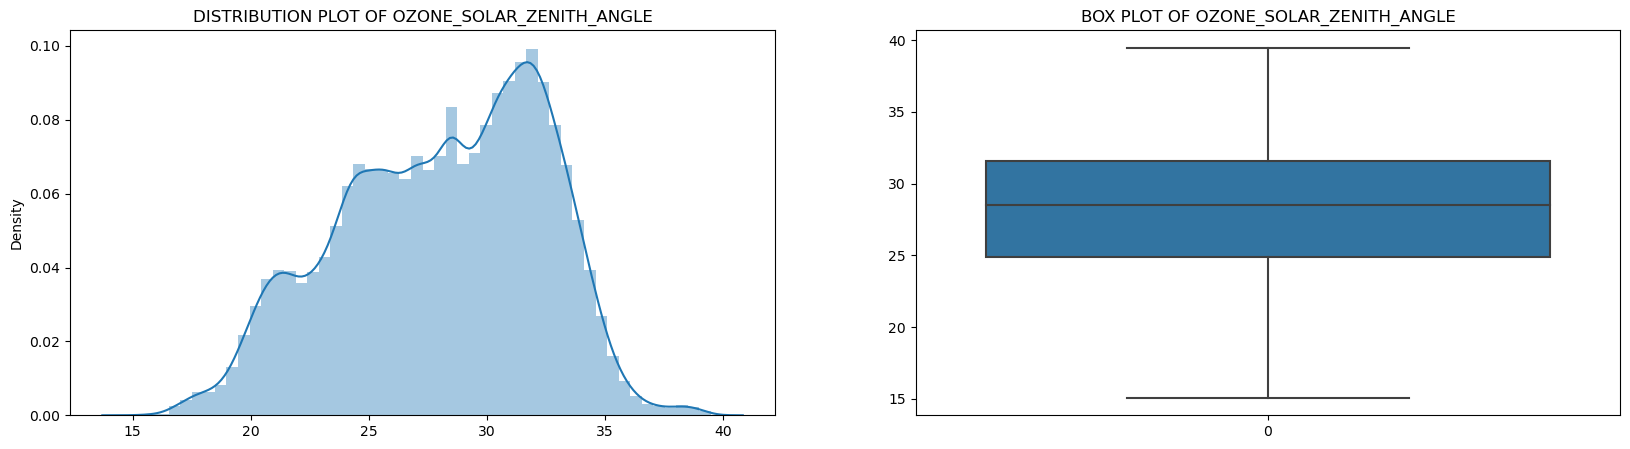

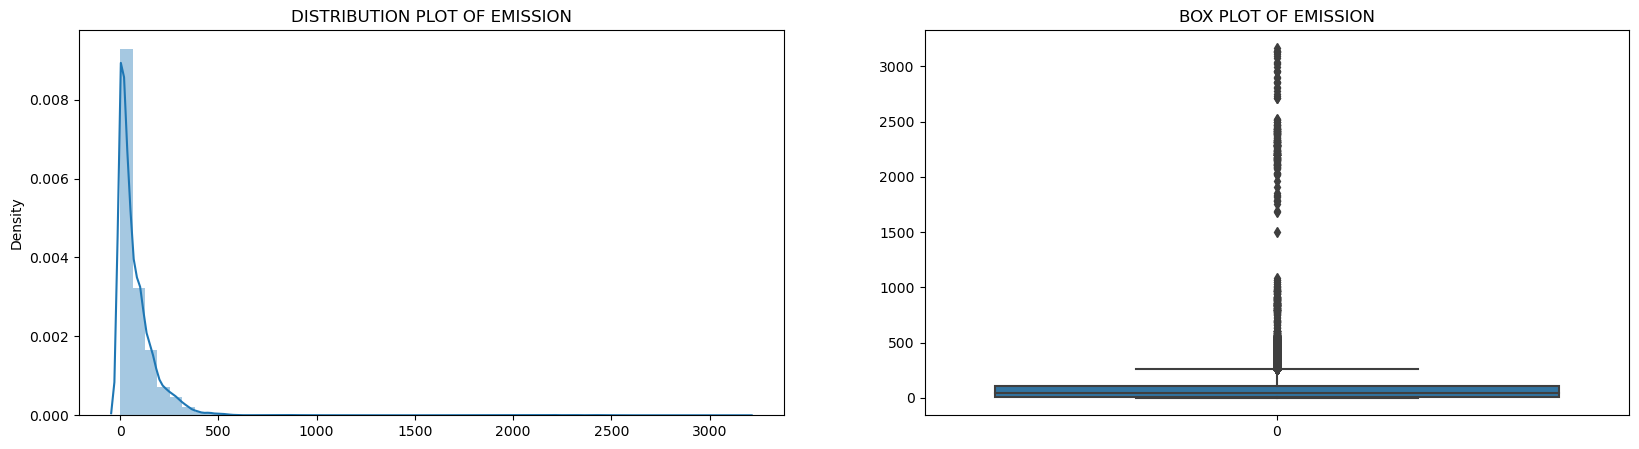

In [20]:
numerical = df.select_dtypes(include = [np.number])
for num in numerical.drop(columns = ['latitude','longitude','year','week_no']).columns:
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(f'DISTRIBUTION PLOT OF {num}'.upper())
    sns.distplot(x = df[num]);
    
    plt.subplot(1,2,2)
    plt.title(f'BOX plot of {num}'.upper())
    sns.boxplot(df[num])
    plt.show()

In [21]:
### ALL THE OUTLIERS HAVE BEEN HANDLED

# FEATURE ENGINEERING

In [22]:
##LET US CREATE A COLUMN CALLED LOCATION BY BRINGIN TOGETHER LATITUDE AND LONGITUDE
for name in [df, test]:
    name['location'] = name['latitude'].astype(str) + '_' + name['longitude'].astype(str)  
    
    
#### LET US CREATE A COLUMN THAT SHOW THE DATE RECORED WAS DONE  AND CREATE A COLUMN THAT REALTE TO THE MONTH IN WHICH THE SATELLITE COLLETED THE DATA   

def extract_date_from_year_and_week(year, week):
    return pd.to_datetime(year, format="%Y") + pd.to_timedelta(week.mul(7), unit="days")


df["Date"] = extract_date_from_year_and_week(df.year, df.week_no)
test["Date"] = extract_date_from_year_and_week(test.year, test.week_no)

df["Month"] = df.Date.dt.month
test["Month"] = test.Date.dt.month

In [23]:
####Statiscal description of each column
df.describe().T

count           mean  \
latitude                                            79023.0      -1.891072   
longitude                                           79023.0      29.880155   
year                                                79023.0    2020.000000   
week_no                                             79023.0      26.000000   
SulphurDioxide_SO2_column_number_density            79023.0       0.000030   
SulphurDioxide_SO2_column_number_density_amf        79023.0       0.825013   
SulphurDioxide_SO2_slant_column_number_density      79023.0       0.000023   
SulphurDioxide_cloud_fraction                       79023.0       0.159307   
SulphurDioxide_sensor_azimuth_angle                 79023.0      -8.760356   
SulphurDioxide_sensor_zenith_angle                  79023.0      37.673171   
SulphurDioxide_solar_azimuth_angle                  79023.0     -83.085484   
SulphurDioxide_solar_zenith_angle                   79023.0      27.837114   
SulphurDioxide_SO2_column_number_density_15km       79023.0       0.000009   
CarbonMonoxide_CO_column_number_density             79023.0       0.032971   
CarbonMonoxide_H2O_column_number_density            79023.0    2092.763380   
CarbonMonoxide_cloud_height                         79023.0    2824.728578   
CarbonMonoxide_sensor_altitude                      79023.0  829938.909160   
CarbonMonoxide_sensor_azimuth_angle                 79023.0      -7.465485   
CarbonMonoxide_sensor_zenith_angle                  79023.0      37.929864   
CarbonMonoxide_solar_azimuth_angle                  79023.0     -85.977787   
CarbonMonoxide_solar_zenith_angle                   79023.0      27.779654   
NitrogenDioxide_NO2_column_number_density           79023.0       0.000044   
NitrogenDioxide_tropospheric_NO2_column_number_...  79023.0       0.000012   
NitrogenDioxide_stratospheric_NO2_column_number...  79023.0       0.000032   
NitrogenDioxide_NO2_slant_column_number_density     79023.0       0.000097   
NitrogenDioxide_tropopause_pressure                 79023.0    8827.829497   
NitrogenDioxide_absorbing_aerosol_index             79023.0      -1.842078   
NitrogenDioxide_cloud_fraction                      79023.0       0.092682   
NitrogenDioxide_sensor_altitude                     79023.0  830000.047508   
NitrogenDioxide_sensor_azimuth_angle                79023.0     -15.261443   
NitrogenDioxide_sensor_zenith_angle                 79023.0      37.067995   
NitrogenDioxide_solar_azimuth_angle                 79023.0     -83.649890   
NitrogenDioxide_solar_zenith_angle                  79023.0      28.496396   
Ozone_O3_column_number_density                      79023.0       0.117362   
Ozone_O3_column_number_density_amf                  79023.0       2.607282   
Ozone_O3_slant_column_number_density                79023.0       0.310577   
Ozone_O3_effective_temperature                      79023.0     228.644253   
Ozone_cloud_fraction                                79023.0       0.569186   
Ozone_sensor_azimuth_angle                          79023.0     -12.946539   
Ozone_sensor_zenith_angle                           79023.0      39.800565   
Ozone_solar_azimuth_angle                           79023.0     -86.515971   
Ozone_solar_zenith_angle                            79023.0      28.107029   
emission                                            79023.0      81.940552   
Month                                               79023.0       6.522013   

                                                           std           min  \
latitude                                              0.694522 -3.299000e+00   
longitude                                             0.810375  2.822800e+01   
year                                                  0.816502  2.019000e+03   
week_no                                              15.297155  0.000000e+00   
SulphurDioxide_SO2_column_number_density              0.000172 -3.389667e-04   
SulphurDioxide_SO2_column_number_density_amf          0.152546 

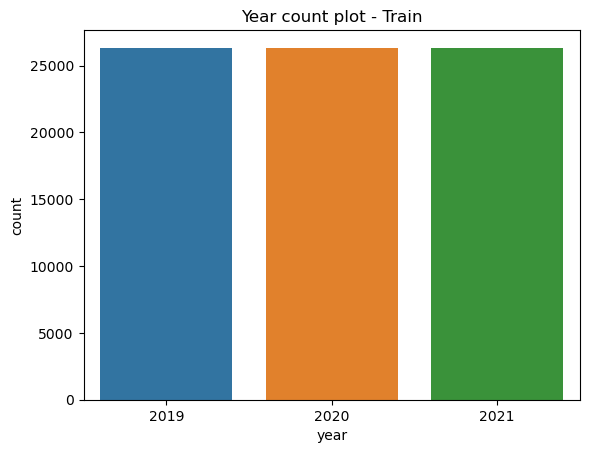

In [24]:
# Year countplot

sns.countplot(x='year', data=df)
plt.title('Year count plot - Train')
plt.show()

In [25]:
##the data were recorded over three years (2019, 2020, 2021)

In [26]:
### let us see the average emission per year as well as the monthly emission  of CO2
yearly_emission = df[['emission', 'year']].groupby(by = 'year').mean()
monthly_emission = df[['emission', 'Month']].groupby(by = 'Month').mean()

In [27]:
yearly_emission

emission
year           
2019  87.255317
2020  75.992122
2021  82.574217

<Axes: xlabel='year'>

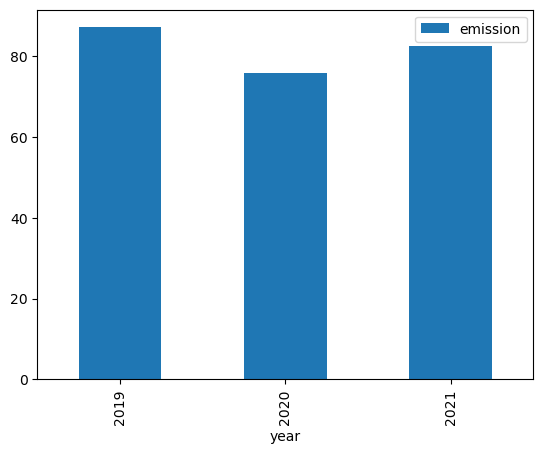

In [28]:
yearly_emission.plot(kind='bar')

In [29]:
#the plots show that the lowest emission was recorded in 2020 this colud be as a result of covid-19
#since during this period there was no proper function of many industies. 
#Also it be seen that in  2021 the emission in increasing.

In [30]:
monthly_emission 

emission
Month            
1       80.848430
2       84.960832
3       77.828870
4       95.427218
5       72.510409
6       72.425800
7       72.402041
8       75.288211
9       79.639707
10     106.452735
11      82.195586
12      79.347426

<Axes: xlabel='Month'>

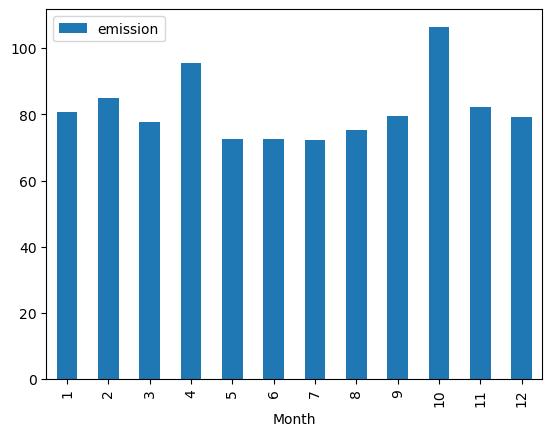

In [31]:
monthly_emission.plot(kind='bar')

In [32]:
#from the monthly emission we can see that highest emission of CO2 were recorded in OCTOBER(106.452735) followed by April(95.427218)


In [33]:
df.emission.describe()

count    79023.000000
mean        81.940552
std        144.299648
min          0.000000
25%          9.797995
50%         45.593445
75%        109.549595
max       3167.768000
Name: emission, dtype: float64

# LET US FIND THE LOCATION BASED ON THE LATITUDE AND LONGITUDE

In [ ]:
##LOCATION FUNCTION DEFINE
import geopandas as gpd
#import missingno
import geopy

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

def location_finder():
    location = (df.latitude.astype('str') + ', ' + df.longitude.astype('str')).drop_duplicates().reset_index()
    geolocator = Nominatim(user_agent = 'Danish' , timeout = 10)
    rgeocode = RateLimiter(geolocator.reverse , min_delay_seconds = 1)
    return location[0].apply(rgeocode)
extraction_result = location_finder()

RateLimiter caught an error, retrying (0/2 tries). Called with (*('-0.925, 29.875',), **{}).
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
TimeoutError: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 386, in _make_request
    self._validate_conn(conn)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\urllib3\conne

In [ ]:
##LOCATION WITH HIGHEST EMISSION OF CO2
loca = df[df['emission']==df['emission'].max()]


get_country = lambda x : x.raw['address']['country']
get_state = lambda x : x.raw['address']['state']
get_full_address = lambda x : x.raw['display_name']

location_high =loca[['latitude','longitude']].reset_index().drop('index' , axis = 1)
location_high['country'] = extraction_result.apply(get_country)
location_high['state'] = extraction_result.apply(get_state)
location_high['full_address'] = extraction_result.apply(get_full_address)
location_high

In [ ]:
##LOCATION WITH EMISSION GREATER OR EQUAL TO 500 DURING 2019
year_2019 =df[ df['year'] == 2019]
location_max_2019 = year_2019[year_2019['emission'] >= 100]
location_max_2019[['latitude', 'longitude']].drop_duplicates()

In [ ]:
get_country = lambda x : x.raw['address']['country']
get_state = lambda x : x.raw['address']['state']
#get_full_address = lambda x : x.raw['display_name']

location =location_max_2019.reset_index().drop('index' , axis = 1)
location['country'] = extraction_result.apply(get_country)
location['state'] = extraction_result.apply(get_state)
#location['full_address'] = extraction_result.apply(get_full_address)
location['country'].value_counts().plot(kind = 'pie', autopct = '%.2f')

In [ ]:
##LOCATION WITH EMISSION GREATER OR EQUAL TO 500 DURING 2020
year_2020 =df[ df['year'] == 2020]
location_max_2020 = year_2020[year_2020['emission'] >= 100]
location_max_2020[['latitude', 'longitude']].drop_duplicates()

In [ ]:
get_country = lambda x : x.raw['address']['country']
get_state = lambda x : x.raw['address']['state']
#get_full_address = lambda x : x.raw['display_name']

location1 =location_max_2020.reset_index().drop('index' , axis = 1)
location1['country'] = extraction_result.apply(get_country)
location1['state'] = extraction_result.apply(get_state)
#location['full_address'] = extraction_result.apply(get_full_address)
location1['country'].value_counts().plot(kind = 'pie', autopct = '%.2f')

In [ ]:
##LOCATION WITH EMISSION GREATER OR EQUAL TO 500 DURING 2021
year_2021 =df[ df['year'] == 2021]
location_max_2021 = year_2021[year_2021['emission'] >= 100]
location_max_2021[['latitude', 'longitude']].drop_duplicates()

In [ ]:
get_country = lambda x : x.raw['address']['country']
get_state = lambda x : x.raw['address']['state']
#get_full_address = lambda x : x.raw['display_name']

location2 =location_max_2021.reset_index().drop('index' , axis = 1)
location2['country'] = extraction_result.apply(get_country)
location2['state'] = extraction_result.apply(get_state)
#location['full_address'] = extraction_result.apply(get_full_address)
location2['country'].value_counts().plot(kind = 'pie', autopct = '%.2f')

In [ ]:
#From the satitical analysis we can see that mean emission of CO2 is around 82
#Also with a mean of 0 emission this seems very abnormal and may be due to error that occur the the data collection
#the diffenece between  the 75 percentille and the maximum value of emission is vry high hence it can be deduce that the the
#target columns is positively skewed.

In [ ]:
plt.figure(figsize=(20,10))
plt.title(f'DISTIBUTION PLOT OF emission of CO2'.upper())
sns.distplot(x = df['emission'])
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.title(f'BOXPLOT OF emission of CO2'.upper())
sns.boxplot(x = df['emission'])
plt.show()

In [ ]:
## Let us address this skewness and the presence of outliers in the target column (emission of CO2)
## We will be using logarthimic approach from Numpy libary

In [ ]:
plt.figure(figsize=(20,10))
plt.title(f'DISTIBUTION PLOT OF emission of CO2'.upper())
sns.distplot(x = np.log(1 + df['emission']))
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.title(f'BOXPLOT OF emission of CO2'.upper())
sns.boxplot(x = np.log (1 + df['emission']))
plt.show()

In [ ]:
##WEEKLY EMISSION OF CO2

plt.figure(figsize = (20 , 10) , dpi = 300)
sns.lineplot(data = df, x = 'week_no' , y ='emission' , hue = 'year' , errorbar = None , palette = 'colorblind')
plt.title('Emission over weeks in year')
plt.show()

In [ ]:
get_country = lambda x : x.raw['address']['country']
get_state = lambda x : x.raw['address']['state']
get_full_address = lambda x : x.raw['display_name']

location = df[['latitude', 'longitude']].drop_duplicates().reset_index().drop('index' , axis = 1)
location['country'] = extraction_result.apply(get_country)
location['state'] = extraction_result.apply(get_state)
location['full_address'] = extraction_result.apply(get_full_address)
location

In [ ]:
fig , ax = plt.subplots(1 , 2 , figsize = (16 , 5))

ax = ax.flatten()

ax[0].pie(
    location['country'].value_counts(),
    shadow = True,
    explode = [.1 for i in range(0,5)],
    autopct = '%1.f%%',
    textprops = {'size':14 , 'color':'white'}
)

sns.countplot(data = location , y = 'country' , ax = ax[1] , order = location['country'].value_counts().index)
ax[1].yaxis.label.set_size(20)
plt.yticks(fontsize = 12)
ax[1].set_xlabel('Count' , fontsize = 20)
ax[1].set_ylabel(None)
plt.xticks(fontsize = 12)
fig.suptitle('Country Proportion ')
plt.tight_layout()

In [ ]:
#config color scales
fig = px.scatter_mapbox(
    df[['latitude','longitude', 'emission', 'year']].groupby(['latitude','longitude', 'year'])['emission'].mean().reset_index(), 
    lat='latitude', lon='longitude', color='emission', range_color=[0,200], animation_frame = 'year', zoom=6)
fig.update_traces(marker_size=10, marker_opacity=0.8)
fig.update_layout(title_text='Location coordinates',mapbox_style = "open-street-map")
fig.show()

* Emission significantly reduced on COVID times (starts on week 10 2020 and restoring until week 53)
* High emission area appears to concentrate on the middle area, meaning that nearby location could impacting the emission value
* Two location identified (Lake Kivu,Nyamasheke) exhibiting significantly higher average emission levels compared to others.
---- Lake Kivu's emission is significantly rising on Jan-Feb
---- Nyamasheke's emission is relatively stable
* Locations can be grouped as 4 types: Lake Kivu, Nyamasheke, has seasonal pattern, and don't have seasonal pattern


In [35]:
#filtering the multicolinearity

#compute correlation with target feature
corr_df = df.loc[:, ~df.columns.isin(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no','Date', 'location'])].corr()
mask = np.zeros_like(corr_df, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_df[mask] = np.nan
emission_corr = abs(corr_df.transpose()['emission']).sort_values(ascending=False)
emission_corr = emission_corr.to_dict()

In [36]:
emission_corr

{'CarbonMonoxide_H2O_column_number_density': 0.04320482857617988,
 'CarbonMonoxide_CO_column_number_density': 0.03914943317617576,
 'NitrogenDioxide_solar_azimuth_angle': 0.02913363413225965,
 'SulphurDioxide_solar_azimuth_angle': 0.028982662896486253,
 'CarbonMonoxide_solar_azimuth_angle': 0.026031203715528396,
 'Ozone_solar_azimuth_angle': 0.024801202248675717,
 'NitrogenDioxide_sensor_altitude': 0.024542738370632568,
 'NitrogenDioxide_cloud_fraction': 0.024034210759790734,
 'NitrogenDioxide_sensor_azimuth_angle': 0.02357440065828163,
 'Ozone_solar_zenith_angle': 0.022436939149608055,
 'SulphurDioxide_sensor_azimuth_angle': 0.021753078701324677,
 'SulphurDioxide_SO2_column_number_density_15km': 0.020981213570609045,
 'SulphurDioxide_SO2_slant_column_number_density': 0.020014546698377916,
 'NitrogenDioxide_absorbing_aerosol_index': 0.01927183276298361,
 'CarbonMonoxide_solar_zenith_angle': 0.018704569730946745,
 'SulphurDioxide_SO2_column_number_density': 0.017861516556441248,
 'Nitro

In [37]:
#compute high correlation pairs
features_corr = pd.DataFrame(corr_df.drop('emission', axis=1).unstack(), columns=['correlation'])
features_corr['pair'] = features_corr.index
features_corr = features_corr.reset_index()
features_corr['correlation'] = abs(features_corr['correlation'])
features_corr = features_corr[features_corr['correlation'].notna()].sort_values('correlation', ascending=False)

features_corr = (features_corr[features_corr['correlation']>0.8])

In [38]:
features_corr

level_0  \
636               CarbonMonoxide_solar_azimuth_angle   
2           SulphurDioxide_SO2_column_number_density   
88    SulphurDioxide_SO2_slant_column_number_density   
8           SulphurDioxide_SO2_column_number_density   
267               SulphurDioxide_solar_azimuth_angle   
255               SulphurDioxide_solar_azimuth_angle   
276               SulphurDioxide_solar_azimuth_angle   
1235              Ozone_O3_column_number_density_amf   
1231              Ozone_O3_column_number_density_amf   
1116             NitrogenDioxide_solar_azimuth_angle   
627               CarbonMonoxide_solar_azimuth_angle   
698        NitrogenDioxide_NO2_column_number_density   
677                CarbonMonoxide_solar_zenith_angle   
308                SulphurDioxide_solar_zenith_angle   

                                                level_1  correlation  \
636                           Ozone_solar_azimuth_angle     0.983572   
2        SulphurDioxide_SO2_slant_column_number_density     0.980689   
88        SulphurDioxide_SO2_column_number_density_15km     0.947812   
8         SulphurDioxide_SO2_column_number_density_15km     0.933259   
267                 NitrogenDioxide_solar_azimuth_angle     0.914763   
255                  CarbonMonoxide_solar_azimuth_angle     0.887291   
276                           Ozone_solar_azimuth_angle     0.886281   
1235                          Ozone_sensor_zenith_angle     0.880813   
1231               Ozone_O3_slant_column_number_density     0.860445   
1116                          Ozone_solar_azimuth_angle     0.859552   
627                 NitrogenDioxide_solar_azimuth_angle     0.858122   
698   NitrogenDioxide_tropospheric_NO2_column_number...     0.846064   
677                            Ozone_solar_zenith_angle     0.817172   
308                  NitrogenDioxide_solar_zenith_angle     0.805917   

                                                   pair  
636   (CarbonMonoxide_solar_azimuth_angle, Ozone_sol...  
2     (SulphurDioxide_SO2_column_number_density, Sul...  
88    (SulphurDioxide_SO2_slant_column_number_densit...  
8     (SulphurDioxide_SO2_column_number_density, Sul...  
267   (SulphurDioxide_solar_azimuth_angle, NitrogenD...  
255   (SulphurDioxide_solar_azimuth_angle, CarbonMon...  
276   (SulphurDioxide_solar_azimuth_angle, Ozone_sol...  
1235  (Ozone_O3_column_number_density_amf, Ozone_sen...  
1231  (Ozone_O3_column_number_density_amf, Ozone_O3_...  
1116  (NitrogenDioxide_solar_azimuth_angle, Ozone_so...  
627   (CarbonMonoxide_solar_azimuth_angle, NitrogenD...  
698   (NitrogenDioxide_NO2_column_number_density, Ni...  
677   (CarbonMonoxide_solar_zenith_angle, Ozone_sola...  
308   (SulphurDioxide_solar_zenith_angle, NitrogenDi...

In [39]:
#instead of having good correlation with the target column (emission),
#these columns are higly correlated with each other leading to heteroscadisity hence we have to drop them.

In [40]:
#select one from high correlation pair with highest correlation with target feature
features_corr['to_drop'] = features_corr.apply(
    lambda x: x['level_0'] if emission_corr[x['level_0']] <= emission_corr[x['level_1']] else x['level_1'],
    axis=1
 )
print(f"total {len(features_corr['to_drop'].unique())} to drop:\n {features_corr['to_drop'].unique()}")

total 10 to drop:
 ['Ozone_solar_azimuth_angle' 'SulphurDioxide_SO2_column_number_density'
 'SulphurDioxide_SO2_slant_column_number_density'
 'SulphurDioxide_solar_azimuth_angle' 'CarbonMonoxide_solar_azimuth_angle'
 'Ozone_sensor_zenith_angle' 'Ozone_O3_slant_column_number_density'
 'NitrogenDioxide_NO2_column_number_density'
 'CarbonMonoxide_solar_zenith_angle' 'SulphurDioxide_solar_zenith_angle']


In [41]:
dataset = df.drop([*features_corr['to_drop'].unique()], axis=1)
numerical = dataset.select_dtypes(include =[np.number])

In [42]:
test = test.drop(columns =  ['SulphurDioxide_solar_azimuth_angle' ,'Ozone_solar_azimuth_angle',
 'CarbonMonoxide_solar_azimuth_angle',
 'SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_solar_zenith_angle' ,'Ozone_sensor_zenith_angle',
 'Ozone_O3_slant_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle' ,'CarbonMonoxide_solar_zenith_angle']
  )

In [43]:
numerical = dataset.select_dtypes(include =[np.number])
numerical.corr()['emission']

latitude                                                   0.017851
longitude                                                  0.102746
year                                                      -0.013244
week_no                                                    0.007086
SulphurDioxide_SO2_column_number_density_amf               0.002552
SulphurDioxide_cloud_fraction                              0.005420
SulphurDioxide_sensor_azimuth_angle                       -0.021753
SulphurDioxide_sensor_zenith_angle                        -0.004845
SulphurDioxide_SO2_column_number_density_15km             -0.020981
CarbonMonoxide_CO_column_number_density                   -0.039149
CarbonMonoxide_H2O_column_number_density                  -0.043205
CarbonMonoxide_cloud_height                               -0.010704
CarbonMonoxide_sensor_altitude                            -0.002002
CarbonMonoxide_sensor_azimuth_angle                       -0.003050
CarbonMonoxide_sensor_zenith_angle              

In [44]:
sulpur_col = [col for col in df.columns if 'Sulphur' in col]
SUL_df = df[sulpur_col]
SUL_df['emission'] = df['emission']
SUL_df.describe().T

count       mean  \
SulphurDioxide_SO2_column_number_density        79023.0   0.000030   
SulphurDioxide_SO2_column_number_density_amf    79023.0   0.825013   
SulphurDioxide_SO2_slant_column_number_density  79023.0   0.000023   
SulphurDioxide_cloud_fraction                   79023.0   0.159307   
SulphurDioxide_sensor_azimuth_angle             79023.0  -8.760356   
SulphurDioxide_sensor_zenith_angle              79023.0  37.673171   
SulphurDioxide_solar_azimuth_angle              79023.0 -83.085484   
SulphurDioxide_solar_zenith_angle               79023.0  27.837114   
SulphurDioxide_SO2_column_number_density_15km   79023.0   0.000009   
emission                                        79023.0  81.940552   

                                                       std         min  \
SulphurDioxide_SO2_column_number_density          0.000172   -0.000339   
SulphurDioxide_SO2_column_number_density_amf      0.152546    0.469307   
SulphurDioxide_SO2_slant_column_number_density    0.000135   -0.000273   
SulphurDioxide_cloud_fraction                     0.063832    0.009092   
SulphurDioxide_sensor_azimuth_angle              58.045305 -150.970460   
SulphurDioxide_sensor_zenith_angle               12.350591   10.663641   
SulphurDioxide_solar_azimuth_angle               34.437541 -157.289337   
SulphurDioxide_solar_zenith_angle                 4.872203   15.809739   
SulphurDioxide_SO2_column_number_density_15km     0.000057   -0.000117   
emission                                        144.299648    0.000000   

                                                       25%        50%  \
SulphurDioxide_SO2_column_number_density         -0.000065   0.000024   
SulphurDioxide_SO2_column_number_density_amf      0.730940   0.809118   
SulphurDioxide_SO2_slant_column_number_density   -0.000053   0.000019   
SulphurDioxide_cloud_fraction                     0.123332   0.161855   
SulphurDioxide_sensor_azimuth_angle             -41.806629 -12.441726   
SulphurDioxide_sensor_zenith_angle               31.209518  37.784299   
SulphurDioxide_solar_azimuth_angle             -114.012321 -79.788767   
SulphurDioxide_solar_zenith_angle                24.962832  28.178639   
SulphurDioxide_SO2_column_number_density_15km    -0.000023   0.000007   
emission                                          9.797995  45.593445   

                                                       75%          max  
SulphurDioxide_SO2_column_number_density          0.000117     0.000391  
SulphurDioxide_SO2_column_number_density_amf      0.905362     1.166994  
SulphurDioxide_SO2_slant_column_number_density    0.000093     0.000313  
SulphurDioxide_cloud_fraction                     0.199492     0.299998  
SulphurDioxide_sensor_azimuth_angle              30.969258   122.095200  
SulphurDioxide_sensor_zenith_angle               44.906770    65.452647  
SulphurDioxide_solar_azimuth_angle              -50.998036   -19.836636  
SulphurDioxide_solar_zenith_angle                31.064894    40.217987  
SulphurDioxide_SO2_column_number_density_15km     0.000039     0.000133  
emission                                        109.549595  3167.768000

<Axes: title={'center': 'THE CORRELATION BETWEEN SULPHUR VARIABLES AND CO2 EMISSION'}>

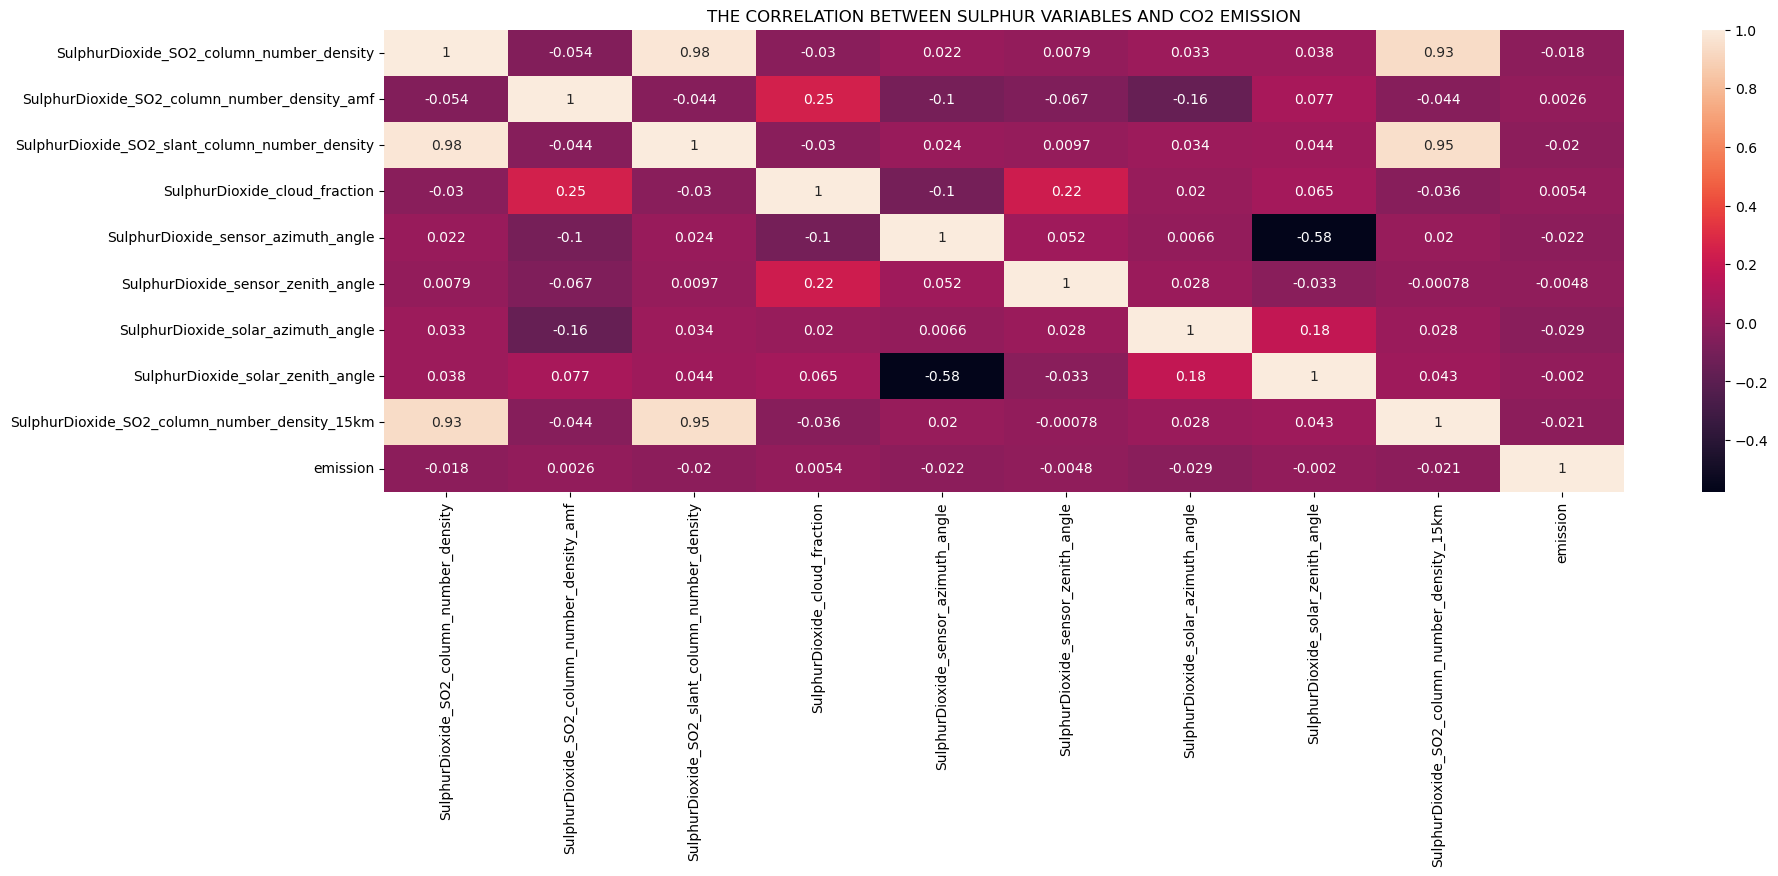

In [45]:
SUL_df.corr()['emission']
plt.figure(figsize=(20, 6))
plt.title('THE CORRELATION BETWEEN SULPHUR VARIABLES AND CO2 EMISSION')
sns.heatmap(SUL_df.corr(), annot = True)

In [46]:
carbon_col = [col for col in df.columns if 'Carbon' in col]
CAR_df = df[carbon_col]
CAR_df['emission'] = df['emission']
CAR_df.describe().T

count           mean         std  \
CarbonMonoxide_CO_column_number_density   79023.0       0.032971    0.005473   
CarbonMonoxide_H2O_column_number_density  79023.0    2092.763380  543.565481   
CarbonMonoxide_cloud_height               79023.0    2824.728578  774.679785   
CarbonMonoxide_sensor_altitude            79023.0  829938.909160  169.299114   
CarbonMonoxide_sensor_azimuth_angle       79023.0      -7.465485   46.263972   
CarbonMonoxide_sensor_zenith_angle        79023.0      37.929864   10.205290   
CarbonMonoxide_solar_azimuth_angle        79023.0     -85.977787   37.383556   
CarbonMonoxide_solar_zenith_angle         79023.0      27.779654    4.840884   
emission                                  79023.0      81.940552  144.299648   

                                                    min            25%  \
CarbonMonoxide_CO_column_number_density        0.019089       0.029163   
CarbonMonoxide_H2O_column_number_density     660.048609    1708.894410   
CarbonMonoxide_cloud_height                  777.533393    2321.669562   
CarbonMonoxide_sensor_altitude            829472.667948  829822.722974   
CarbonMonoxide_sensor_azimuth_angle          -98.300018     -40.446199   
CarbonMonoxide_sensor_zenith_angle            13.094216      31.794883   
CarbonMonoxide_solar_azimuth_angle          -156.620575    -124.063966   
CarbonMonoxide_solar_zenith_angle             13.526485      24.346296   
emission                                       0.000000       9.797995   

                                                    50%            75%  \
CarbonMonoxide_CO_column_number_density        0.032253       0.035880   
CarbonMonoxide_H2O_column_number_density    2035.418030    2408.124944   
CarbonMonoxide_cloud_height                 2852.535556    3351.093674   
CarbonMonoxide_sensor_altitude            829941.610652  830056.092991   
CarbonMonoxide_sensor_azimuth_angle          -12.337376      19.115636   
CarbonMonoxide_sensor_zenith_angle            38.220766      44.261995   
CarbonMonoxide_solar_azimuth_angle           -83.376035     -48.252614   
CarbonMonoxide_solar_zenith_angle             28.171029      31.559504   
emission                                      45.593445     109.549595   

                                                    max  
CarbonMonoxide_CO_column_number_density        0.045954  
CarbonMonoxide_H2O_column_number_density    3456.970746  
CarbonMonoxide_cloud_height                 4895.229843  
CarbonMonoxide_sensor_altitude            830406.148017  
CarbonMonoxide_sensor_azimuth_angle           76.580513  
CarbonMonoxide_sensor_zenith_angle            62.962663  
CarbonMonoxide_solar_azimuth_angle           -21.999680  
CarbonMonoxide_solar_zenith_angle             42.379315  
emission                                    3167.768000

<Axes: title={'center': 'THE CORRELATION BETWEEN CARBON MONOXIDE VARIABLES AND CO2 EMISSION'}>

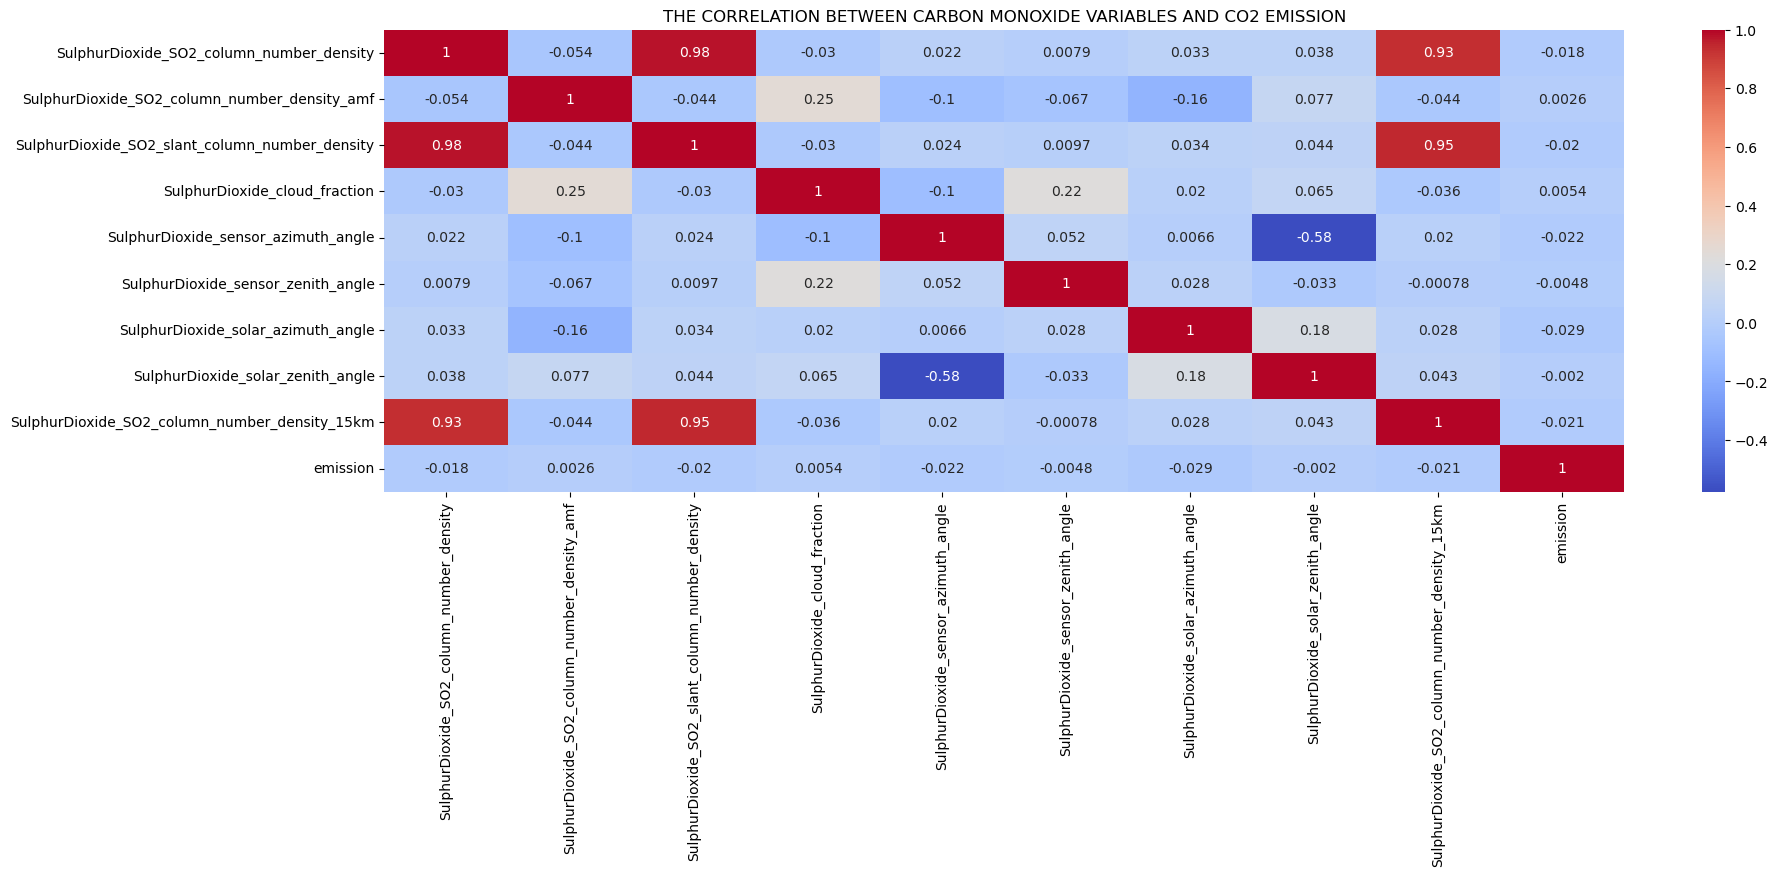

In [47]:
CAR_df.corr()['emission']
plt.figure(figsize=(20, 6))
plt.title('THE CORRELATION BETWEEN CARBON MONOXIDE VARIABLES AND CO2 EMISSION')
sns.heatmap(SUL_df.corr(), annot = True, cmap='coolwarm')

In [48]:
Nitro_col = [col for col in df.columns if 'Nitrogen' in col]
Nitro_df = df[Nitro_col]
Nitro_df['emission'] = df['emission']
Nitro_df.describe().T

count           mean  \
NitrogenDioxide_NO2_column_number_density           79023.0       0.000044   
NitrogenDioxide_tropospheric_NO2_column_number_...  79023.0       0.000012   
NitrogenDioxide_stratospheric_NO2_column_number...  79023.0       0.000032   
NitrogenDioxide_NO2_slant_column_number_density     79023.0       0.000097   
NitrogenDioxide_tropopause_pressure                 79023.0    8827.829497   
NitrogenDioxide_absorbing_aerosol_index             79023.0      -1.842078   
NitrogenDioxide_cloud_fraction                      79023.0       0.092682   
NitrogenDioxide_sensor_altitude                     79023.0  830000.047508   
NitrogenDioxide_sensor_azimuth_angle                79023.0     -15.261443   
NitrogenDioxide_sensor_zenith_angle                 79023.0      37.067995   
NitrogenDioxide_solar_azimuth_angle                 79023.0     -83.649890   
NitrogenDioxide_solar_zenith_angle                  79023.0      28.496396   
emission                                            79023.0      81.940552   

                                                           std           min  \
NitrogenDioxide_NO2_column_number_density             0.000007  2.812264e-05   
NitrogenDioxide_tropospheric_NO2_column_number_...    0.000006 -3.891948e-07   
NitrogenDioxide_stratospheric_NO2_column_number...    0.000003  2.493169e-05   
NitrogenDioxide_NO2_slant_column_number_density       0.000015  6.368706e-05   
NitrogenDioxide_tropopause_pressure                 634.872165  7.647508e+03   
NitrogenDioxide_absorbing_aerosol_index               0.525050 -2.959206e+00   
NitrogenDioxide_cloud_fraction                        0.039975  4.423001e-03   
NitrogenDioxide_sensor_altitude                     182.935826  8.295979e+05   
NitrogenDioxide_sensor_azimuth_angle                 59.625891 -1.686026e+02   
NitrogenDioxide_sensor_zenith_angle                  12.758807  1.049131e+01   
NitrogenDioxide_solar_azimuth_angle                  32.715029 -1.588833e+02   
NitrogenDioxide_solar_zenith_angle                    4.652295  1.800843e+01   
emission                                            144.299648  0.000000e+00   

                                                              25%  \
NitrogenDioxide_NO2_column_number_density                0.000040   
NitrogenDioxide_tropospheric_NO2_column_number_...       0.000009   
NitrogenDioxide_stratospheric_NO2_column_number...       0.000030   
NitrogenDioxide_NO2_slant_column_number_density          0.000088   
NitrogenDioxide_tropopause_pressure                   8613.484911   
NitrogenDioxide_absorbing_aerosol_index                 -2.130482   
NitrogenDioxide_cloud_fraction                           0.069729   
NitrogenDioxide_sensor_altitude                     829902.689472   
NitrogenDioxide_sensor_azimuth_angle                   -57.323655   
NitrogenDioxide_sensor_zenith_angle                     30.744727   
NitrogenDioxide_solar_azimuth_angle                   -110.561009   
NitrogenDioxide_solar_zenith_angle                      25.960655   
emission                                                 9.797995   

                                                              50%  \
NitrogenDioxide_NO2_column_number_density                0.000044   
NitrogenDioxide_tropospheric_NO2_column_number_...       0.000012   
NitrogenDioxide_stratospheric_NO2_column_number...       0.000031   
NitrogenDioxide_NO2_slant_column_number_density          0.000096   
NitrogenDioxide_tropopause_pressure                   8613.720662   
NitrogenDioxide_absorbing_aerosol_index                 -1.868650   
NitrogenDioxide_cloud_fraction                           0.090985   
NitrogenDioxide_sensor_altitude                     830007.833333   
NitrogenDioxide_sensor_azimuth_angle                   -13.021288   
NitrogenDioxide_sensor_zenith_angle                     36.952294   
NitrogenDioxide_solar_azimuth_angle                    -81.628029   
NitrogenDioxide_solar_zenith_angle           

<Axes: title={'center': 'THE CORRELATION BETWEEN NiTROGEN DIOXIDE VARIABLES AND CO2 EMISSION'}>

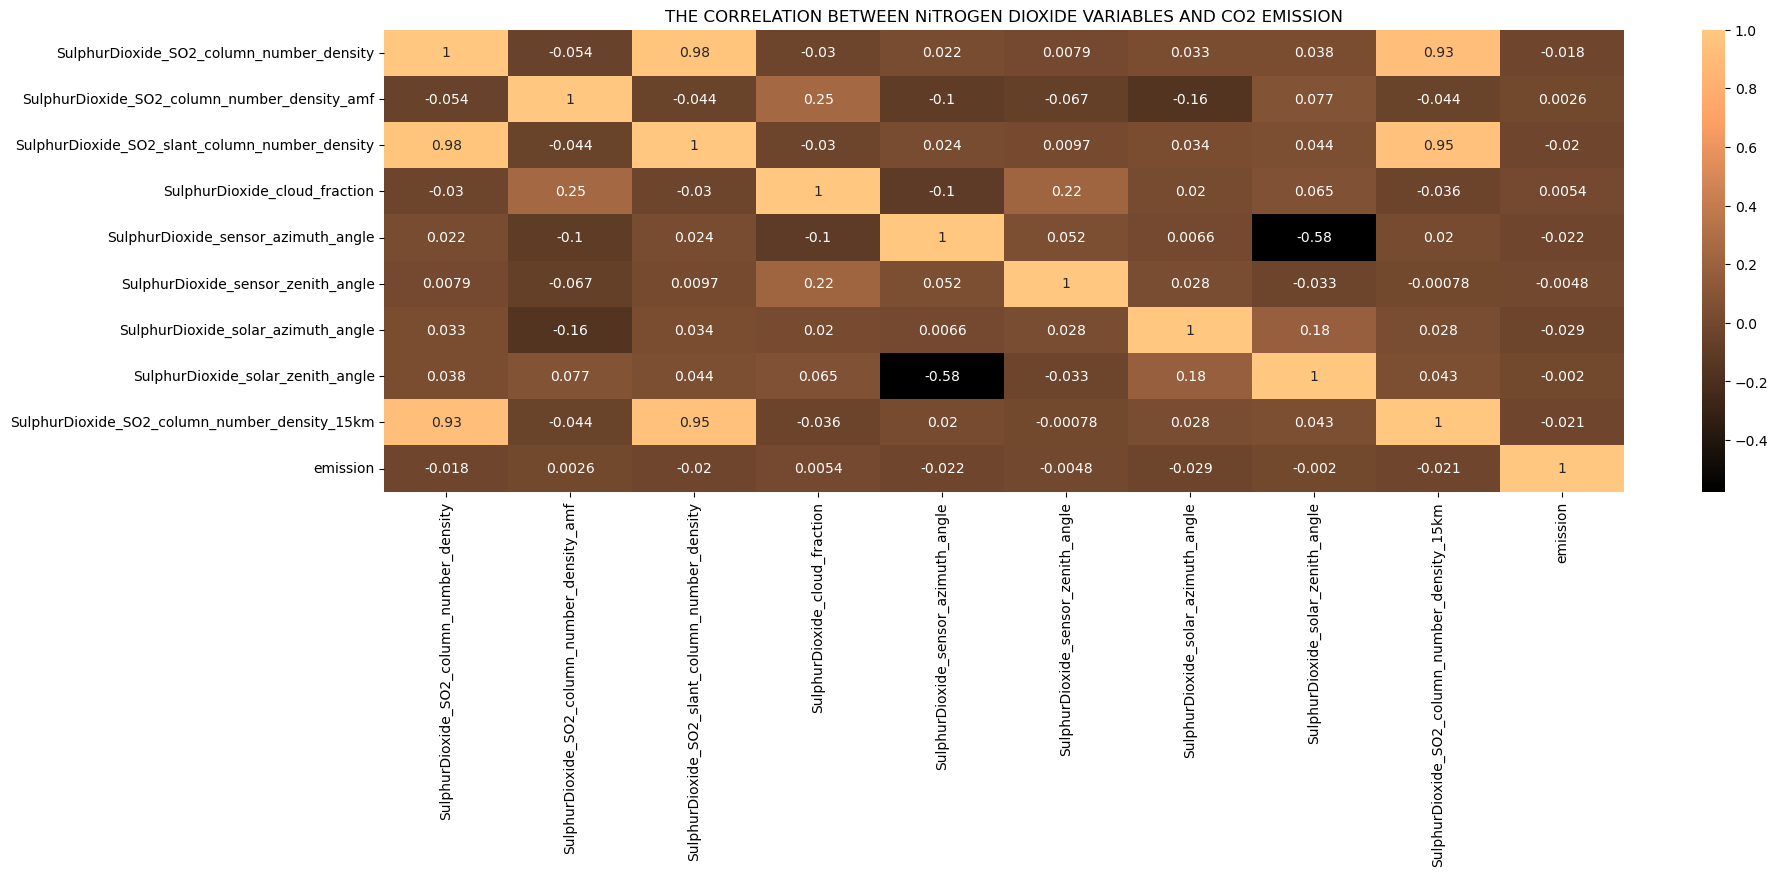

In [49]:
Nitro_df.corr()['emission']
plt.figure(figsize=(20, 6))
plt.title('THE CORRELATION BETWEEN NiTROGEN DIOXIDE VARIABLES AND CO2 EMISSION')
sns.heatmap(SUL_df.corr(), annot = True, cmap='copper')

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [51]:
#SPLITTING THE DATA INTP TRAIN AND TET SET
#X = df.drop(columns=["emission"])
X = df.drop(columns=["emission",'location' ,'Date'])
Y = np.log (1 + df["emission"])

In [52]:
##scalling the features and Splitting the dataset into 75% training and 25%testing( this is to avoid overfitting)

scaler = MinMaxScaler()
test = test.drop(columns=['location' ,'Date'])
X =scaler.fit_transform(X)
test =scaler.fit_transform(test)


#X = pd.DataFrame(X, columns=df.drop(columns=['emission']).columns)
X = pd.DataFrame(X, columns=df.drop(columns=['emission','location', 'Date']).columns)


x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=2024)

In [53]:
###BULDING LINEAR REGRESSION MODEL
lr = LinearRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)
linear_mse = mean_squared_error(y_test, y_predict)
Linear_r2 = r2_score(y_test, y_predict)
linear_mse ,Linear_r2

(2.383100424337391, 0.14823528984739998)

In [54]:
#### Random Forest Regressor Model
rdf = RandomForestRegressor()
rdf.fit(x_train, y_train)
y_predict_rdf = rdf.predict(x_test)
rdf_mse = mean_squared_error(y_test, y_predict_rdf)
rdf_r2  = r2_score(y_test, y_predict_rdf)
rdf_mse,rdf_r2  

(0.01956726681443063, 0.9930062924850067)

In [55]:
#### K Nearest nEIGHBOR Regressor Model
knn= KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)
y_predict_knn = knn.predict(x_test)
knn_mse = mean_squared_error(y_test, y_predict_knn)
knn_r2  = r2_score(y_test, y_predict_knn)
knn_mse, knn_r2

AttributeError: 'NoneType' object has no attribute 'split'

In [56]:
#### SUPPORT VECTOR MACHINE Regressor Model
svm= SVR()
svm.fit(x_train, y_train)
y_predict_svm = svm.predict(x_test)
svm_mse = mean_squared_error(y_test, y_predict_svm)
svm_r2 = r2_score(y_test, y_predict_svm)
svm_mse, svm_r2

(1.6992200234550083, 0.3926669493309022)

In [57]:
### Decision Tree Regressor Model 
dtr = DecisionTreeRegressor()

dtr.fit(x_train, y_train)
y_predict_dtr = dtr.predict(x_test)
dtr_mse = mean_squared_error(y_test, y_predict_dtr)
dtr_r2  = r2_score(y_test, y_predict_dtr)
dtr_mse, dtr_r2 

(0.03369584981373909, 0.9879564723933423)

In [58]:
### XGB Regressor Model 
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_predict_xgb = xgb.predict(x_test)
xgb_mse = mean_squared_error(y_test, y_predict_xgb)
xgb_r2  = r2_score(y_test, y_predict_xgb)
xgb_mse,xgb_r2

(0.03293301675141916, 0.9882291232122445)

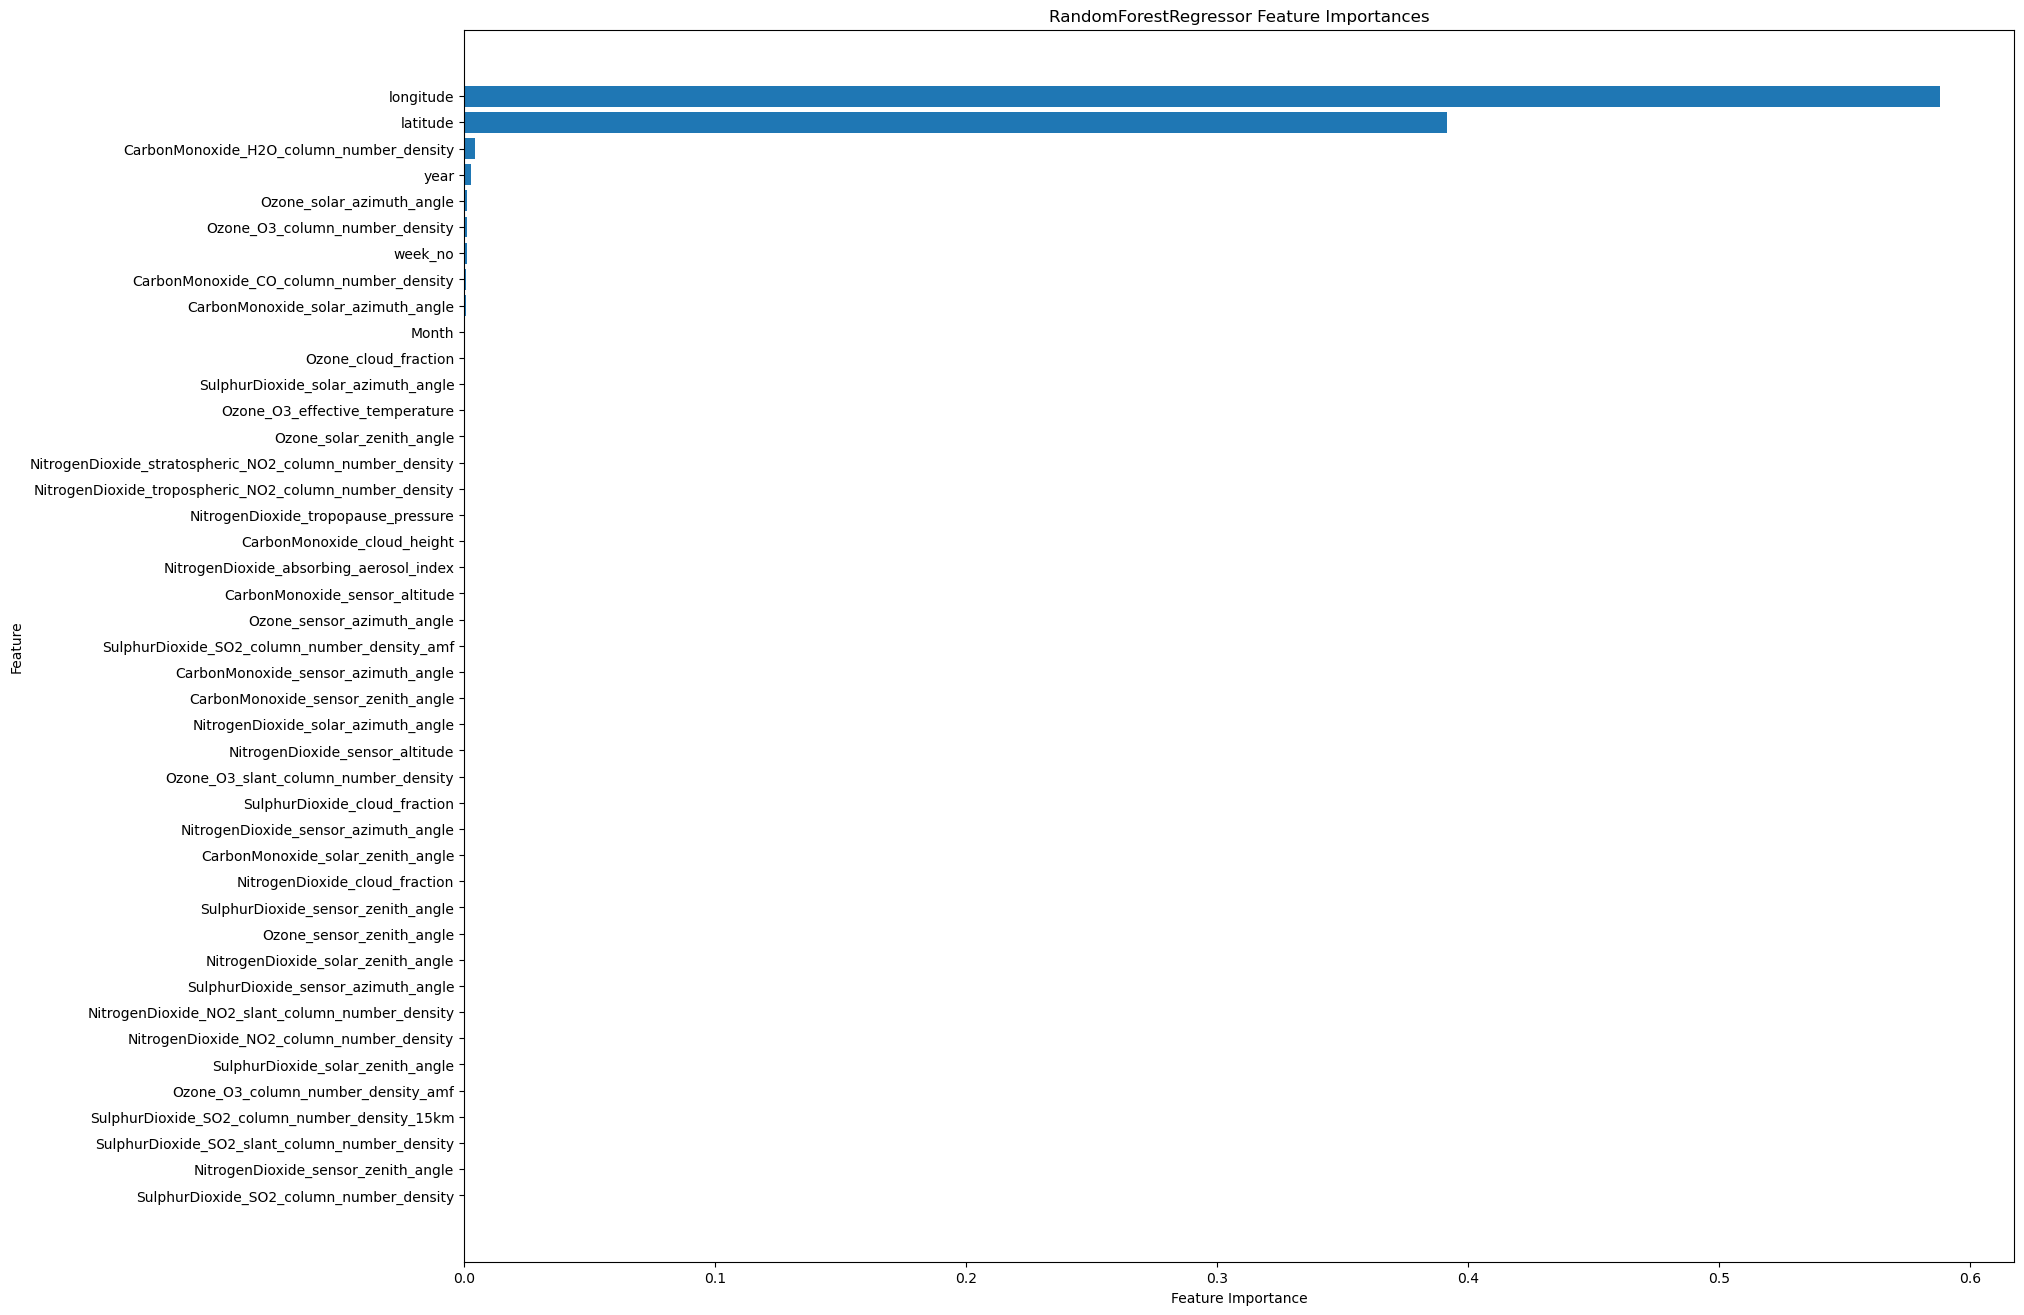

In [59]:
feature_importances = rdf.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)

plt.figure(figsize=(20, 16))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices])
plt.yticks(range(len(sorted_indices)), np.array(feature_names)[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('RandomForestRegressor Feature Importances')
plt.show()

In [60]:
# pickling the model 
import pickle 
import streamlit as st

pickle_out = open("xgb_regression.pkl", "wb") 
pickle.dump(xgb, pickle_out) 
pickle_out.close()

In [75]:
# save the model to disk
import joblib

joblib.dump(lr, "linear_model.sav")

['linear_model.sav']